# Conservative Hybrid Fund – Exploratory Data Analysis  
### **Group 26 – Final Project**

---

##  **Team Members**
- **Chaitri Vadaviya** – 202301243  
- **Parthiv Bhesania** – 202303037  
- **Utsav Tala** – 202303018  

---

##  **Subject**: Exploratory Data Analysis  
##  **Project Topic**: Conservative Hybrid Fund Analysis  
##  **Tools Used**: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
##  **Platform**: Google Colab  

---

## **GitHub Repository Link**  
[Conservatice-Hybrid-Funds-Analysis](https://github.com/Chaitreee/Conservative-Hybrid-Funds-Analysis)

---

##  **Problem Statement**
Evaluating the performance, risk, and stability of Conservative Hybrid Funds becomes challenging due to fluctuating NAV movements, dynamic portfolio allocation, and overall market volatility.  
This project applies Exploratory Data Analysis (EDA) techniques to uncover meaningful insights into returns, volatility patterns, and the structural composition of these funds.

---

##  **Project Goal**
To analyze Conservative Hybrid Funds using multiple datasets and derive insights into their performance, risk characteristics, and portfolio stability to determine whether they align with the expectations of a low-risk investment category.

---



How to Run :

Step 1: Create a Virtual Environment
python -m venv venv

Step 2: Activate the Virtual Environment
Windows: venv\Scripts\activate
macOS / Linux: source venv/bin/activate

Step 3: Install Required Libraries
pip install -r requirements.txt

Step 4: Open Jupyter Notebook
jupyter notebook

Step 5: Run Notebook Cells in Order

Load Libraries

Import Raw Dataset

Clean & Rename Columns

Handle Missing Values

Convert Data Types

Generate Final Clean Summary DataFrame

Proceed to EDA (Univariate, Bivariate, NAV Analysis, Returns, Risk Matrix, etc.)


# requirements

- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- scipy


#Import libraries :

In [ ]:
# Core libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.gridspec as gridspec
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    f1_score,
    confusion_matrix
)
from scipy.stats import spearmanr


# display settings
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 100)


print('libraries loaded')


libraries loaded


# Data Collection:  



## Data Used and MetaData :

- **NAV Data – MFAPI**  
  Daily NAV values for all Conservative Hybrid Funds were downloaded from MFAPI and saved as `nav_values.csv`.  
  **URL:** https://www.mfapi.in/

- **Analytics Data – Value Research**  
  Returns, risk ratios, AUM, fund manager details, and NAV statistics were manually collected (as direct download is restricted) and merged into `analytics.csv`.  
  **URL:** https://www.valueresearchonline.com/

- **Portfolio Holdings – Moneycontrol**  
  Extracted asset allocation details (equity/debt/cash), credit ratings, and turnover ratios for each scheme from Moneycontrol pages. Stored as `portfolio_assets.csv`.  
  **URL:** https://www.moneycontrol.com/

- **Cross-Verification – AMFI**  
  Verified scheme names, NAV dates, and categories using AMFI data.  
  **URL:** https://www.amfiindia.com/


## Data Loading

In this step, we load all the datasets required for our Exploratory Data Analysis.  
The project uses three main CSV files:

- **analytics.csv** – Contains scheme-level return metrics, risk indicators, and performance parameters  
- **nav_values.csv** – Contains historical NAV values for each Conservative Hybrid Fund  
- **portfolio_assets.csv** – Contains portfolio allocation details (Equity, Debt, Cash, Holdings, etc.)  

These datasets serve as the foundation for further preprocessing, cleaning, and detailed analysis.


In [ ]:
# Loading datasets

# analytics.csv
summary_raw = pd.read_csv("analytics.csv")

# nav_values.csv (loaded as string initially to avoid parsing issues)
nav_values = pd.read_csv("nav_values.csv", dtype=str)

# portfolio_assets.csv
p_assests = pd.read_csv("portfolio_assests.csv", dtype=str)

print("All datasets loaded successfully.")


All datasets loaded successfully.


## Data Inspection :

In [ ]:
# Basic shapes
print("Shapes:")
print(f"summary_raw shape      : {summary_raw.shape}")
print(f"nav_values shape       : {nav_values.shape}")
print(f"p_assests shape        : {p_assests.shape}")
print("\n" + "-"*60 + "\n")

# Column lists (first view)
print("Columns - summary_raw:")
print(summary_raw.columns.tolist())
print("\nColumns - nav_values:")
print(nav_values.columns.tolist())
print("\nColumns - p_assests:")
print(p_assests.columns.tolist())
print("\n" + "-"*60 + "\n")

# Info() equivalents (non-destructive): show dtypes and non-null counts
print("Data types and non-null counts (summary_raw):")
display(summary_raw.info())   # If running in Colab/Jupyter this prints compact info
print("\nData types and non-null counts (nav_values):")
display(nav_values.info())
print("\nData types and non-null counts (p_assests):")
display(p_assests.info())
print("\n" + "-"*60 + "\n")

# Descriptive statistics (both numeric and object overview)
print("Descriptive summary (summary_raw):")
display(summary_raw.describe(include='all').T)
print("\nDescriptive summary (nav_values):")
display(nav_values.describe(include='all').T)
print("\nDescriptive summary (p_assests):")
display(p_assests.describe(include='all').T)
print("\n" + "-"*60 + "\n")

# Missing values per column
print("Missing values (count) — summary_raw:")
print(summary_raw.isnull().sum().sort_values(ascending=False).head(20))
print("\nMissing values (count) — nav_values:")
print(nav_values.isnull().sum().sort_values(ascending=False).head(20))
print("\nMissing values (count) — p_assests:")
print(p_assests.isnull().sum().sort_values(ascending=False).head(20))
print("\n" + "-"*60 + "\n")

# A few sample rows from each dataframe (random sample for quick glance)
print("Sample rows — summary_raw:")
display(summary_raw.sample(n=5, random_state=42))
print("\nSample rows — nav_values:")
display(nav_values.sample(n=5, random_state=42))
print("\nSample rows — p_assests:")
display(p_assests.sample(n=5, random_state=42))
print("\n" + "-"*60 + "\n")

# Quick checks for common columns (if present)
# These checks do not modify data; they only print information.
common_checks = {
    "Date-like column in nav_values": ["date", "Date", "NAV Date", "nav_date"],
    "NAV-like column in nav_values": ["nav", "NAV", "Net Asset Value"],
    "Scheme/Name columns": ["scheme", "Scheme", "Fund", "fund_name"]
}

for label, candidates in common_checks.items():
    found = [c for c in nav_values.columns if c in candidates]
    print(f"{label}: {found if found else 'None found'}")

# 8) Number of unique schemes / funds (if any column looks like scheme)
possible_scheme_cols = [c for c in summary_raw.columns if 'scheme' in c.lower() or 'fund' in c.lower() or 'name' in c.lower()]
if possible_scheme_cols:
    col = possible_scheme_cols[0]
    print(f"\nUnique count in detected scheme column ({col}): {summary_raw[col].nunique()}")
else:
    print("\nNo obvious scheme/fund-name column detected in summary_raw for unique-count check.")

# End of inspection cell
print("\nData inspection completed. Proceed to cleaning/preprocessing based on above outputs.")


Shapes:
summary_raw shape      : (66, 93)
nav_values shape       : (65, 1096)
p_assests shape        : (35, 12)

------------------------------------------------------------

Columns - summary_raw:
['Unnamed: 0', 'Unnamed: 1', 'Snapshots', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Short term returns', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Long term Returns', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'SIP returns', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Annual returns', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Quarternary returns', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Monthly Returns', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Un

None


Data types and non-null counts (nav_values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Columns: 1096 entries, Scheme Name to 11/11/25
dtypes: object(1096)
memory usage: 556.7+ KB


None


Data types and non-null counts (p_assests):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Scheme Name                35 non-null     object
 1   Plan                       35 non-null     object
 2   Category Name              35 non-null     object
 3   Crisil Rating              35 non-null     object
 4   Turnover ratio             35 non-null     object
 5   % Equity Holding           35 non-null     object
 6   No of stocks in portfolio  35 non-null     object
 7   % Debt Holding             35 non-null     object
 8   No of debt holdings        35 non-null     object
 9   % MF Holding               35 non-null     object
 10  % Cash Holding             35 non-null     object
 11  % Other Holding            35 non-null     object
dtypes: object(12)
memory usage: 3.4+ KB


None


------------------------------------------------------------

Descriptive summary (summary_raw):


count unique                                        top  \
Unnamed: 0             66     66                                      Funds   
Unnamed: 1             66      3                                    Regular   
Snapshots              65      7                                          3   
Unnamed: 3             65     61                                         --   
Unnamed: 4             65      5                            Moderately High   
Unnamed: 5             65      2                                      HY-CH   
Unnamed: 6             65     54                                       2.15   
Unnamed: 7             65     35                                   01/01/13   
Unnamed: 8             65     32                                        175   
Short term returns     66     42                                         --   
Unnamed: 10            66     55                                         --   
Unnamed: 11            66     56                                         --   
Unnamed: 12            66     59                                         --   
Unnamed: 13            66     61                                         --   
Long term Returns      66     56                                         --   
Unnamed: 15            66     53                                         --   
Unnamed: 16            66     44                                         --   
Unnamed: 17            66     21                                         --   
Unnamed: 18            66     15                                         --   
SIP returns            66     57                                         --   
Unnamed: 20            66     54                                         --   
Unnamed: 21            66     44                                         --   
Unnamed: 22            66     22                                         --   
Unnamed: 23            66     15                                         --   
Annual returns         66     41                                         --   
Unnamed: 25            66     45                                         --   
Unnamed: 26            66     49                                         --   
Unnamed: 27            66     48                                         --   
Unnamed: 28            66     48                                         --   
Unnamed: 29            66     53                                         --   
Unnamed: 30            66     52                                         --   
Unnamed: 31            66     60                                         --   
Unnamed: 32            66     60                                         --   
Unnamed: 33            66     58                                         --   
Quarternary returns    66     56                                         --   
Unnamed: 35            66     55                                         --   
Unnamed: 36            66     59                                         --   
Unnamed: 37            66     56                                         --   
Unnamed: 38            66     53                                         --   
Unnamed: 39            66     58                                         --   
Unnamed: 40            66     51                                         --   
Unnamed: 41            66     57                                         --   
Unnamed: 42            66     57                                         --   
Unnamed: 43            66     53                                         --   
Unnamed: 44            66     57                                         --   
Unnamed: 45            66     54                                         --   
Monthly Returns        66     48                                         --   
Unnamed: 47            66     49                                         --   
Unnamed: 48            66     54                                         --   
Unnamed: 49            66     50                                      


Descriptive summary (nav_values):


count unique                                                top  \
Scheme Name    65     65  Aditya Birla Sun Life Conservative Hybrid Acti...   
13/11/22        0      0                                                NaN   
14/11/22       49     38                                             11.905   
15/11/22       49     38                                            11.9107   
16/11/22       49     38                                            11.9043   
...           ...    ...                                                ...   
07/11/25       47     36                                                  0   
08/11/25        0      0                                                NaN   
09/11/25        0      0                                                NaN   
10/11/25       47     36                                                  0   
11/11/25       47     36                                                  0   

            freq  
Scheme Name    1  
13/11/22     NaN  
14/11/22       3  
15/11/22       3  
16/11/22       3  
...          ...  
07/11/25       3  
08/11/25     NaN  
09/11/25     NaN  
10/11/25       3  
11/11/25       3  

[1096 rows x 4 columns]


Descriptive summary (p_assests):


count unique  \
Scheme Name                  35     35   
Plan                         35      2   
Category Name                35      1   
Crisil Rating                35      5   
Turnover ratio               35      5   
% Equity Holding             35      8   
No of stocks in portfolio    35     16   
% Debt Holding               35     12   
No of debt holdings          35     16   
% MF Holding                 35      4   
% Cash Holding               35     10   
% Other Holding              35      6   

                                                                         top  \
Scheme Name                Aditya Birla Sun Life Regular Savings Fund- Di...   
Plan                                                             Direct Plan   
Category Name                                       Conservative Hybrid Fund   
Crisil Rating                                                              3   
Turnover ratio                                                             -   
% Equity Holding                                                         24%   
No of stocks in portfolio                                                 48   
% Debt Holding                                                           72%   
No of debt holdings                                                       14   
% MF Holding                                                               -   
% Cash Holding                                                            4%   
% Other Holding                                                            -   

                          freq  
Scheme Name                  1  
Plan                        18  
Category Name               35  
Crisil Rating               13  
Turnover ratio              28  
% Equity Holding             8  
No of stocks in portfolio    4  
% Debt Holding               9  
No of debt holdings          6  
% MF Holding                29  
% Cash Holding              10  
% Other Holding             20


------------------------------------------------------------

Missing values (count) — summary_raw:
Snapshots             1
Unnamed: 4            1
Unnamed: 3            1
Unnamed: 6            1
Unnamed: 5            1
Unnamed: 7            1
Unnamed: 8            1
Unnamed: 1            0
Unnamed: 0            0
Short term returns    0
Unnamed: 10           0
Unnamed: 11           0
Unnamed: 12           0
Unnamed: 13           0
Long term Returns     0
Unnamed: 15           0
Unnamed: 16           0
Unnamed: 17           0
Unnamed: 18           0
SIP returns           0
dtype: int64

Missing values (count) — nav_values:
19/11/22    65
20/11/22    65
01/11/25    65
02/11/25    65
05/11/25    65
08/11/25    65
09/11/25    65
27/09/25    65
28/09/25    65
10/12/22    65
11/12/22    65
17/12/22    65
18/12/22    65
11/10/25    65
12/10/25    65
29/09/25    65
02/10/25    65
04/10/25    65
05/10/25    65
31/12/22    65
dtype: int64

Missing values (count) — p_assests:
Scheme Name       

Unnamed: 0 Unnamed: 1 Snapshots  \
54  Nippon India Conservative Hybrid Fund - Segreg...     Direct        --   
62    Sundaram Conservative Hybrid Fund - Direct Plan     Direct         2   
0                                               Funds  Plan Type    Rating   
45  Franklin India Conservative Hybrid Fund - Dire...     Direct         3   
5   Axis Retirement Fund - Conservative Plan - Reg...    Regular         1   

      Unnamed: 3       Unnamed: 4 Unnamed: 5         Unnamed: 6 Unnamed: 7  \
54            --        Very High      HY-CH               1.09         --   
62          4.57  Moderately High      HY-CH               0.86   08/01/13   
0   1 Yr Ret (%)       Riskometer   Category  Expense Ratio (%)     Launch   
45          7.17  Moderately High      HY-CH               0.75   01/01/13   
5           3.58             High      HY-CH               2.15   20/12/19   

   Unnamed: 8 Short term returns    Unnamed: 10    Unnamed: 11    Unnamed: 12  \
54         34                 --             --             --             --   
62         21               0.08           0.53           1.46           1.22   
0     AUM(Cr)       1 Wk Ret (%)  1 Mth Ret (%)  3 Mth Ret (%)  6 Mth Ret (%)   
45        205              -0.25           0.13           1.73           3.89   
5          55               0.01           0.83           2.56           2.53   

     Unnamed: 13 Long term Returns   Unnamed: 15    Unnamed: 16  \
54            --                --            --             --   
62          4.57              8.14          8.93           7.73   
0   1 Yr Ret (%)      3 Yr Ret (%)  5 Yr Ret (%)  10 Yr Ret (%)   
45          7.17             10.29          9.35           8.39   
5           3.58              9.56          8.31             --   

      Unnamed: 17    Unnamed: 18       SIP returns       Unnamed: 20  \
54             --             --                --                --   
62             --             --              7.27              7.86   
0   15 Yr Ret (%)  20 Yr Ret (%)  3 Yr SIP Ret (%)  5 Yr SIP Ret (%)   
45             --             --              9.67              9.35   
5              --             --               8.6              7.82   

          Unnamed: 21        Unnamed: 22        Unnamed: 23 Annual returns  \
54                 --                 --                 --             --   
62               7.71                 --                 --           8.91   
0   10 Yr SIP Ret (%)  15 Yr SIP Ret (%)  20 Yr SIP Ret (%)           2015   
45               8.67                 --                 --           6.76   
5                  --                 --                 --             --   

   Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30  \
54          --          --          --          --          --          --   
62       10.56        13.1        0.41         1.7        8.32       15.39   
0         2016        2017        2018        2019        2020        2021   
45       10.49        9.95        2.81        9.21        8.02        8.85   
5           --          --          --          --       13.74       12.03   

   Unnamed: 31 Unnamed: 32 Unnamed: 33 Quarternary returns Unnamed: 35  \
54          --          --          --                  --          --   
62        3.75       10.14        9.07                2.88        0.34   
0         2022        2023        2024              Dec-22      Mar-23   
45        4.82       12.26       11.37                2.54        0.37   
5        -4.25       13.71       11.47                0.17       -1.06   

   Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41  \
54          --          --          --          --          --          --   
62        3.99        1.63        3.86        2.58        3.09        3.88   
0       Jun-23      Sep-23      Dec-23      Mar-24      Jun-24      Sep-24   
45        4.01        3.07        4.34        2.73        4.32        3.78   
5        


Sample rows — nav_values:


Scheme Name 13/11/22 14/11/22  \
53  Nippon India Conservative Hybrid Fund - Segreg...      NaN      NaN   
60  SBI Retirement Benefit Fund - Conservative Pla...      NaN  12.0629   
0   Aditya Birla Sun Life Conservative Hybrid Acti...      NaN  24.8861   
45                HDFC Hybrid Debt Fund - Direct Plan      NaN  18.5991   
5   Bandhan Asset Allocation Fund - Conservative P...      NaN  15.8927   

   15/11/22 16/11/22 17/11/22 18/11/22 19/11/22 20/11/22 21/11/22 22/11/22  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60  12.0688  12.0625  12.0754  12.0576      NaN      NaN  12.0386  12.0511   
0   24.9295  24.9264  24.9083  24.8944      NaN      NaN  24.8448  24.8705   
45  18.6331  18.6525  18.6543  18.6425      NaN      NaN  18.6327  18.6548   
5   15.9157  15.9131  15.8998  15.8879      NaN      NaN   15.862  15.8795   

   23/11/22 24/11/22 25/11/22 26/11/22 27/11/22 28/11/22 29/11/22 30/11/22  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60  12.0692  12.1267   12.123      NaN      NaN  12.1435  12.1305  12.1694   
0   24.8899  24.9655  24.9828      NaN      NaN  25.0208  25.0364  25.0789   
45  18.6557  18.7209  18.7254      NaN      NaN  18.7696  18.7707  18.7942   
5   15.8906  15.9397  15.9409      NaN      NaN  15.9616  15.9615  15.9785   

   01/12/22 02/12/22 03/12/22 04/12/22 05/12/22 06/12/22 07/12/22 08/12/22  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60   12.233  12.2183      NaN      NaN  12.2279  12.2076  12.1973  12.2196   
0    25.134  25.1387      NaN      NaN  25.1587  25.1157  25.0873   25.135   
45  18.8451  18.8359      NaN      NaN  18.8378  18.8227  18.8078  18.8383   
5   16.0109  15.9963      NaN      NaN   15.998  15.9739  15.9575   15.969   

   09/12/22 10/12/22 11/12/22 12/12/22 13/12/22 14/12/22 15/12/22 16/12/22  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60   12.181      NaN      NaN  12.1897  12.2185  12.2573  12.1913  12.1502   
0   25.0902      NaN      NaN  25.0967  25.1392  25.1992   25.093  25.0286   
45   18.793      NaN      NaN  18.8148  18.8399  18.8793  18.8209   18.763   
5   15.9506      NaN      NaN  15.9492  15.9707  15.9915   15.936  15.8944   

   17/12/22 18/12/22 19/12/22 20/12/22 21/12/22 22/12/22 23/12/22 24/12/22  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60      NaN      NaN  12.1716  12.1537  12.1016  12.0642  11.9526      NaN   
0       NaN      NaN    25.08   25.088  24.9976  24.9822  24.8039      NaN   
45      NaN      NaN  18.7993  18.7851  18.7377  18.7017   18.611      NaN   
5       NaN      NaN  15.9237  15.9174  15.8689  15.8493   15.764      NaN   

   25/12/22 26/12/22 27/12/22 28/12/22 29/12/22 30/12/22 31/12/22 01/01/23  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60      NaN  12.0229  12.0596  12.0654  12.0777  12.0614      NaN      NaN   
0       NaN  24.9357  25.0002  24.9752  25.0149  25.0113      NaN      NaN   
45      NaN  18.6964  18.7307  18.7295  18.7462  18.7378      NaN      NaN   
5       NaN  15.8324  15.8638  15.8718  15.8907  15.6754      NaN      NaN   

   02/01/23 03/01/23 04/01/23 05/01/23 06/01/23 07/01/23 08/01/23 09/01/23  \
53      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
60  12.0915  12.1087  12.0819  12.0722  12.0305      NaN      NaN  12.0806   
0   25.0717  25.1019  25.0754  25.0666  25.0354      NaN      NaN  25.1209   
45  18.7658  18.7911  18.7556  18.7569  18.7422      NaN      NaN  18.8076   
5   15.7012  15.7076  15.6694  15.6652  15.6286      NaN      NaN  15.6899   

   10/01/23  ... 13/09/25 14/09/25 15/09/25 16/09/25 17/09/25 18/09/25  \
53      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
60  12.0572  ...      NaN      NaN  15.9038  15.9561   16.069  16.0771   
0   25.0653  ...      NaN      NaN  34.1838  34.2492  34.3123  34.3393   
45   18.768 


Sample rows — p_assests:


Scheme Name         Plan  \
26     Nippon India Conservative Hybrid Fund - Growth      Regular   
13   DSP Regular Savings Fund - Regular Plan - Growth      Regular   
24           LIC MF Conservative Hybrid Fund - Growth      Regular   
21      Kotak Debt Hybrid Fund - Direct Plan - Growth  Direct Plan   
15  Franklin India Conservative Hybrid Fund  - Growth      Regular   

               Category Name Crisil Rating Turnover ratio % Equity Holding  \
26  Conservative Hybrid Fund             4              -              13%   
13  Conservative Hybrid Fund             5              -              19%   
24  Conservative Hybrid Fund             3              -              19%   
21  Conservative Hybrid Fund             4              -              23%   
15  Conservative Hybrid Fund             2              -              23%   

   No of stocks in portfolio % Debt Holding No of debt holdings % MF Holding  \
26                        48            74%                  42            -   
13                        31            75%                  14            -   
24                         9            80%                   9            -   
21                        42            70%                  76            -   
15                        48            68%                  13            -   

   % Cash Holding % Other Holding  
26             8%              4%  
13             6%              1%  
24             1%               -  
21             7%              0%  
15             9%               -


------------------------------------------------------------

Date-like column in nav_values: None found
NAV-like column in nav_values: None found
Scheme/Name columns: None found

Unique count in detected scheme column (Unnamed: 0): 66

Data inspection completed. Proceed to cleaning/preprocessing based on above outputs.


#Data Preprocessing :

## Column handling :    



*   Renameing columns - according to standardize names
*   Remove unnecessary columns



### For file : analytics.csv

In [ ]:
# Row 0 has labels
row0 = summary_raw.iloc[0]
cols = list(summary_raw.columns)

new_cols = []

for col in cols:
    label = str(row0[col])

    # 1) Annual returns block
    if col == 'Annual returns':
        # keep the block label column itself as is or a helper name if you prefer
        new_cols.append(f'ret_of_{label}')
        continue

    # If this column is one of the year columns under 'Annual returns'
    if col.startswith('Unnamed') and label.isdigit():
        new_cols.append(f'ret_of_{label}')
        continue

    # 2) Quarternary returns block
    # if col == 'Quarternary returns':
    #     new_cols.append(f'quat_ret_{label}')
    #     continue

    if col == 'Quarternary returns' or col.startswith('Unnamed') and row0['Quarternary returns'] != label and label in [
        'Mar-23','Jun-23','Sep-23','Dec-23','Mar-24','Jun-24','Sep-24','Dec-24','Mar-25','Jun-25','Sep-25'
    ]:
        # general rule: prefix quat_ret_
        new_cols.append(f'quat_ret_{label}')
        continue

    # 3) Monthly Returns block
    if col == 'Monthly Returns':
        new_cols.append(f'month_ret_{label}')
        continue

    if col.startswith('Unnamed') and label in [
        'Dec-24','Jan-25','Feb-25','Mar-25','Apr-25','May-25','Jun-25',
        'Jul-25','Aug-25','Sep-25','Oct-25'
    ]:
        new_cols.append(f'month_ret_{label}')
        continue

    # 4) Weekly returns block
    if col == 'Weekly returns':
        new_cols.append(f'week_ret_{label}')
        continue

    if col.startswith('Unnamed') and label in [
        '29-Aug','05-Sep','12-Sep','19-Sep','26-Sep',
        '03-Oct','10-Oct','17-Oct','24-Oct','31-Oct','07-Nov'
    ]:
        new_cols.append(f'week_ret_{label}')
        continue

    # 5) For all other columns: keep the row-0 label as the column name
    new_cols.append(label)

# Apply new column names
summary_renamed = summary_raw.copy()
summary_renamed.columns = new_cols

# Drop row 0 (the label row), keep actual data rows
summary_renamed = summary_renamed.iloc[1:].reset_index(drop=True)

# If the first column is the fund name, rename it to scheme_name
first_col = summary_renamed.columns[0]
summary = summary_renamed.rename(columns={first_col: 'scheme_name'})
summary['scheme_name'] = summary['scheme_name'].astype(str).str.strip()

# Rename important columns if they exist (adapt if your names are slightly different)
rename_map = {
    'Expense Ratio (%)': 'expense_ratio',
    'Category': 'category',
    'Riskometer': 'riskometer',
    'Latest NAV': 'latest_nav',
    'Previous NAV': 'previous_nav',
    '52-Week High NAV': 'nav_52w_high',
    '52-Week Low NAV': 'nav_52w_low',
    "Analysts' View": 'analyst_view',
    '1 Yr Ret (%)': 'ret_1y',
    '3 Yr Ret (%)': 'ret_3y',
    '5 Yr Ret (%)': 'ret_5y',
    '10 Yr Ret (%)': 'ret_10y'
}
summary = summary.rename(columns={k: v for k, v in rename_map.items() if k in summary.columns})

# Helper to convert strings with commas to numeric
def to_num(s):
    return pd.to_numeric(str(s).replace(',', ''), errors='coerce')

num_cols_like = [
    'expense_ratio',
    'latest_nav',
    'previous_nav',
    'nav_52w_high',
    'nav_52w_low',
    'ret_1y',
    'ret_3y',
    'ret_5y',
    'ret_10y'
]

for c in num_cols_like:
    if c in summary.columns:
        summary[c] = summary[c].map(to_num)

# Replace '--' with NaN across all columns in the summary DataFrame
for column in summary.columns:
    summary[column] = summary[column].replace('--', np.nan)

# Display the first few rows to verify the changes
display(summary.head())

scheme_name Plan Type Rating  ret_1y  \
0  Aditya Birla Sun Life Conservative Hybrid Acti...   Regular    NaN    7.11   
1  Aditya Birla Sun Life Regular Savings Fund - R...   Regular      4    7.46   
2  Aditya Birla Sun Life Retirement Fund - The 50...   Regular      2    5.93   
3       Axis Conservative Hybrid Fund - Regular Plan   Regular      2    5.82   
4  Axis Retirement Fund - Conservative Plan - Reg...   Regular      1    3.58   

        riskometer category  expense_ratio    Launch AUM(Cr) 1 Wk Ret (%)  \
0             High    HY-CH           0.97  09/05/11      16        -0.08   
1  Moderately High    HY-CH           1.83  22/05/04   1,547        -0.21   
2  Moderately High    HY-CH           1.93  11/03/19      27        -0.15   
3  Moderately High    HY-CH           2.20  16/07/10     273          0.2   
4             High    HY-CH           2.15  20/12/19      55         0.01   

  1 Mth Ret (%) 3 Mth Ret (%) 6 Mth Ret (%)  ret_1y  ret_3y  ret_5y  ret_10y  \
0          0.38          2.27          3.92    7.11   11.84   10.77     9.14   
1          0.55          2.26           4.8    7.46    9.28   10.38     8.77   
2          0.73          2.49          4.48    5.93    8.57    5.72      NaN   
3          0.83          1.94           2.8    5.82    7.42    7.35     6.91   
4          0.83          2.56          2.53    3.58    9.56    8.31      NaN   

  15 Yr Ret (%) 20 Yr Ret (%) 3 Yr SIP Ret (%) 5 Yr SIP Ret (%)  \
0           NaN           NaN             10.6            10.43   
1          9.27          9.21             9.44                9   
2           NaN           NaN             8.27             7.32   
3           7.4           NaN             7.47              6.9   
4           NaN           NaN              8.6             7.82   

  10 Yr SIP Ret (%) 15 Yr SIP Ret (%) 20 Yr SIP Ret (%) ret_of_2015  \
0              9.79               NaN               NaN        4.62   
1              8.66              9.32              9.32         5.4   
2               NaN               NaN               NaN         NaN   
3              7.05              7.44               NaN        6.27   
4               NaN               NaN               NaN         NaN   

  ret_of_2016 ret_of_2017 ret_of_2018 ret_of_2019 ret_of_2020 ret_of_2021  \
0        8.11          11        3.09        5.89       14.14       10.59   
1       13.12       15.52       -2.15        5.83        9.23       13.36   
2         NaN         NaN         NaN         NaN        7.86        1.92   
3        4.19        12.1        3.18        1.93       13.81       10.59   
4         NaN         NaN         NaN         NaN       13.74       12.03   

  ret_of_2022 ret_of_2023 ret_of_2024 quat_ret_Dec-22 quat_ret_Mar-23  \
0        4.16       15.85       11.74            2.61            0.94   
1        5.33        9.64       10.45            1.94            -0.1   
2        1.47        9.98        9.16            2.32            -0.3   
3        0.48        8.45         7.4            1.06           -0.39   
4       -4.25       13.71       11.47            0.17           -1.06   

  quat_ret_Jun-23 quat_ret_Sep-23 quat_ret_Dec-23 quat_ret_Mar-24  \
0            4.74            3.95            5.42             2.7   
1            4.32            1.87            3.26            1.77   
2            3.94            2.87            3.17            1.75   
3            4.34             1.3            3.02            1.57   
4            6.45            2.35            5.48            5.26   

  quat_ret_Jun-24 quat_ret_Sep-24 quat_ret_Dec-24 quat_ret_Mar-25  \
0            6.04            4.91            -2.1            0.94   
1            4.08            4.06            0.21             0.9   
2            3.71            4.11           -0.64               0   
3            3.37            4.06           -1.64            1.99   
4            3.16             5.7            -2.8           -0.41   

  quat_ret_Jun-25 quat_ret_Sep-25 month_ret_Nov-

### For file : nav_values.csv

In [ ]:
nav_values = nav_values.replace('-', np.nan)             # convert dash to NaN everywhere

def try_parse_date_token(tok):
    """Try several common formats and fall back to pandas auto-parse."""
    tok = tok.strip()
    if not tok:
        return pd.NaT
    # quick check for pure digits of length 8 -> try YYYYMMDD or DDMMYYYY
    if re.fullmatch(r'\d{8}', tok):
        for fmt in ("%Y%m%d", "%d%m%Y"):
            try:
                return pd.to_datetime(tok, format=fmt, errors='coerce')
            except Exception:
                pass
    # try pandas generic parse (handles many forms)
    try:
        return pd.to_datetime(tok, dayfirst=False, errors='coerce')
    except Exception:
        return pd.NaT


# 1) detect date-like headers from nav_values
date_cols_parsed = {}
for col in nav_values.columns:
    # try header itself
    parsed = try_parse_date_token(col)
    if not pd.isna(parsed):
        date_cols_parsed[col] = parsed
        continue

    # split header into tokens and try each token
    tokens = re.split(r'[_\s\-\(\)\[\].]+', col)
    parsed_token = pd.NaT
    for t in tokens:
        p = try_parse_date_token(t)
        if not pd.isna(p):
            parsed_token = p
            break

    if not pd.isna(parsed_token):
        date_cols_parsed[col] = parsed_token


# 2) filter date columns to range EARLIEST_DATE .. TODAY
EARLIEST_DATE = pd.to_datetime("2022-01-01")   # keep dates from this date onward
TODAY = pd.to_datetime("today").normalize()    # today's date
date_cols_in_range = {
    c: d for c, d in date_cols_parsed.items()
    if (d >= EARLIEST_DATE) and (d <= TODAY)
}

if not date_cols_in_range:
    raise ValueError(
        "No date-like columns detected in the range 2022-01-01 .. today. Check nav_values headers."
    )


# 3) drop date columns where all values are missing (holidays)
cols_to_keep = []
dropped_holidays = []

for col, parsed_date in date_cols_in_range.items():
    series = nav_values[col].replace(r'^\s*$', np.nan, regex=True)  # treat whitespace-only as NaN
    if series.isna().all():
        dropped_holidays.append(col)
    else:
        cols_to_keep.append(col)


# 4) sort kept date columns newest → oldest
cols_to_keep_sorted = sorted(
    cols_to_keep,
    key=lambda c: date_cols_in_range[c],
    reverse=True
)


# 5) keep non-date columns in original order (metadata), append sorted date columns
non_date_cols = [c for c in nav_values.columns if c not in date_cols_in_range]
final_cols = non_date_cols + cols_to_keep_sorted

nav_values_cleaned = nav_values.loc[:, final_cols].copy()

#cleaned csv :

display(nav_values_cleaned.head(2))

nav_values_cleaned.to_csv("nav_values_preprocessed.csv", index=False)

Scheme Name 12/01/25 12/02/25  \
0  Aditya Birla Sun Life Conservative Hybrid Acti...      NaN  32.1123   
1  Aditya Birla Sun Life Regular Savings Fund - R...      NaN      NaN   

  12/03/25 12/04/25 12/05/25 12/06/25 12/07/25 12/08/25 12/09/25 12/10/25  \
0  31.9704      NaN      NaN  33.9738      NaN  33.8562  34.1676      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  11/11/25 11/09/25 11/08/25 11/07/25 11/06/25 11/04/25 11/03/25 11/02/25  \
0  34.7096   34.122  33.9196   34.175  34.0749  32.8393  31.9729  32.1451   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  31/10/25 30/10/25 29/10/25 28/10/25 27/10/25 24/10/25 23/10/25 20/10/25  \
0  34.6525  34.6949  34.7643  34.7284  34.7305  34.6647  34.6999   34.722   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  17/10/25 16/10/25 15/10/25 14/10/25 13/10/25 10/11/25 10/10/25 10/09/25  \
0  34.6472  34.6505  34.5964  34.5058  34.5457  34.6582  34.5254  34.1225   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  10/07/25 10/06/25 10/03/25 10/02/25 10/01/25 30/09/25 26/09/25 25/09/25  \
0  34.2126  34.0965  31.9203  32.3695  32.2142  34.1497  34.1333  34.2225   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  24/09/25 23/09/25 22/09/25 19/09/25 18/09/25 17/09/25 16/09/25 15/09/25  \
0  34.2614  34.3003  34.2941  34.3352  34.3393  34.3123  34.2492  34.1838   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  09/10/25 09/09/25 09/07/25 09/06/25 09/05/25 09/04/25 09/01/25 31/08/25  \
0  34.4698  34.0837  34.2655  34.1212  33.3511  32.5238  32.3458      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  29/08/25  ... 02/08/23 02/06/23 02/05/23 02/03/23 02/02/23 02/01/23  \
0  33.7821  ...  26.9043  26.1617  25.7314  25.0207  25.1208  25.0717   
1      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   

  31/01/23 30/01/23 27/01/23 25/01/23 24/01/23 23/01/23 20/01/23 19/01/23  \
0  25.0436  25.0088  25.0027   25.075  25.1641  25.1619  25.1416  25.1588   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  18/01/23 17/01/23 16/01/23 13/01/23 01/12/23 01/11/23 01/09/23 01/08/23  \
0  25.1703  25.1399  25.0987  25.1197   28.215  27.3084  27.3544  27.0248   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  01/06/23 01/03/23 01/02/23 30/12/22 29/12/22 28/12/22 27/12/22 26/12/22  \
0  26.1007  25.0424  25.0688  25.0113  25.0149  24.9752  25.0002  24.9357   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  23/12/22 22/12/22 21/12/22 20/12/22 19/12/22 16/12/22 15/12/22 14/12/22  \
0  24.8039  24.9822  24.9976   25.088    25.08  25.0286   25.093  25.1992   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  13/12/22 12/12/22 30/11/22 29/11/22 28/11/22 25/11/22 24/11/22 23/11/22  \
0  25.1392  25.0967  25.0789  25.0364  25.0208  24.9828  24.9655  24.8899   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  22/11/22 21/11/22 18/11/22 17/11/22 16/11/22 15/11/22 14/11/22 09/12/22  \
0  24.8705  24.8448  24.8944  24.9083  24.9264  24.9295  24.8861  25.0902   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  08/12/22 07/12/22 06/12/22 05/12/22 02/12/22 01/12/22  
0   25.135  25.0873  25.1157  25.1587  25.1387   25.134  
1      NaN      NaN      NaN      NaN      NaN      NaN  

[2 rows x 748 columns]

### For file : portfolio_assets.csv

In [ ]:
# 2) normalize missing markers: treat both '--' and '-' and pure-whitespace as NaN
p_assests = p_assests.replace('--', np.nan)
p_assests = p_assests.replace('-', np.nan)
p_assests = p_assests.replace(r'^\s*$', np.nan, regex=True)

# 3) strip leading/trailing whitespace in every string cell
p_assests = p_assests.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 4) build new column names: remove % and some punctuation, replace spaces with underscore, make lowercase
def clean_colname(col):
    # remove percent sign and parentheses and periods
    s = re.sub(r'[%\(\)\.\,]', '', col)
    # replace any sequence of non-alphanumeric characters (including spaces) with single underscore
    s = re.sub(r'[^0-9a-zA-Z]+', '_', s)
    # remove leading/trailing underscores and lowercase
    s = s.strip('_').lower()
    return s

old_cols = p_assests.columns.tolist()
new_cols = [clean_colname(c) for c in old_cols]

# If any duplicates created by cleaning, make them unique by appending index
seen = {}
unique_new_cols = []
for i, nc in enumerate(new_cols):
    base = nc if nc else f"col_{i}"
    if base in seen:
        seen[base] += 1
        unique = f"{base}_{seen[base]}"
    else:
        seen[base] = 0
        unique = base
    unique_new_cols.append(unique)

# apply the rename
rename_map = dict(zip(old_cols, unique_new_cols))
p_assests.rename(columns=rename_map, inplace=True)

# 5) show mapping (old -> new) for your review
print("Renamed columns (old -> new):")
for o, n in rename_map.items():
    print(f"  {o!r}  ->  {n!r}")

# 6) final preprocessed file
p_assests.head()




Renamed columns (old -> new):
  'Scheme Name'  ->  'scheme_name'
  'Plan'  ->  'plan'
  'Category Name'  ->  'category_name'
  'Crisil Rating'  ->  'crisil_rating'
  'Turnover ratio'  ->  'turnover_ratio'
  '% Equity Holding'  ->  'equity_holding'
  'No of stocks in portfolio'  ->  'no_of_stocks_in_portfolio'
  '% Debt Holding'  ->  'debt_holding'
  'No of debt holdings'  ->  'no_of_debt_holdings'
  '% MF Holding'  ->  'mf_holding'
  '% Cash Holding'  ->  'cash_holding'
  '% Other Holding'  ->  'other_holding'


scheme_name         plan  \
0  Aditya Birla Sun Life Regular Savings Fund- Di...  Direct Plan   
1  Aditya Birla Sun Life Regular Savings Fund- Re...      Regular   
2  Axis Conservative Hybrid Fund - Direct Plan - ...  Direct Plan   
3             Axis Conservative Hybrid Fund - Growth      Regular   
4  Bandhan Conservative Hybrid Fund - Direct Plan...  Direct Plan   

              category_name crisil_rating turnover_ratio equity_holding  \
0  Conservative Hybrid Fund             3           128%            21%   
1  Conservative Hybrid Fund             3           128%            21%   
2  Conservative Hybrid Fund             2            NaN            20%   
3  Conservative Hybrid Fund             2            NaN            20%   
4  Conservative Hybrid Fund             3            NaN            12%   

  no_of_stocks_in_portfolio debt_holding no_of_debt_holdings mf_holding  \
0                        44          74%                  96        NaN   
1                        44          74%                  96        NaN   
2                        33          72%                  20        NaN   
3                        33          72%                  20        NaN   
4                        10          72%                  14        12%   

  cash_holding other_holding  
0           4%            2%  
1           4%            2%  
2           9%            0%  
3           9%            0%  
4           4%           NaN

##Missing Value Hendaling :

In [ ]:
def clean_missing_values(df, protect_col="Luanch", drop_all_zero_numeric=False):
    """
    Clean missing values in a DataFrame using the following rules:
    - Drop columns with >50% missing values (except protect_col).
    - Drop rows with >50% missing values.
    - Numeric columns: fill NaN with median.
    - Categorical columns: fill NaN with mode.
    - Optionally drop rows where all numeric values are 0.
    - Column protect_col is never imputed or dropped.
    """
    # --- 1. Drop columns with >50% missing ---
    missing_pct = df.isna().mean() * 100
    cols_to_drop = missing_pct[missing_pct > 50].index.tolist()

    if protect_col in cols_to_drop:
        cols_to_drop.remove(protect_col)

    df_clean = df.drop(columns=cols_to_drop)
    print(f"  Dropped columns (>50% missing): {len(cols_to_drop)}")

    # --- 2. Drop rows with >50% missing ---
    row_missing_pct = df_clean.isna().mean(axis=1) * 100
    df_clean = df_clean.loc[row_missing_pct <= 50].copy()
    print(f"  Remaining rows after dropping >50% missing: {df_clean.shape[0]}")

    # --- 3. Identify numeric & categorical ---
    num_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = df_clean.select_dtypes(exclude=["number"]).columns.tolist()

    if protect_col in num_cols:
        num_cols.remove(protect_col)
    if protect_col in cat_cols:
        cat_cols.remove(protect_col)

    print(f"  Numeric columns (imputed): {len(num_cols)}")
    print(f"  Categorical columns (imputed): {len(cat_cols)}")

    # --- 4. Impute numeric with median ---
    for col in num_cols:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

    # --- 5. Impute categorical with mode ---
    for col in cat_cols:
        mode_series = df_clean[col].mode()
        if not mode_series.empty:
            df_clean[col] = df_clean[col].fillna(mode_series.iloc[0])

    # --- 6. Optionally drop rows with all numeric values = 0 ---
    if drop_all_zero_numeric and len(num_cols) > 0:
        all_zero_numeric = (df_clean[num_cols] == 0).all(axis=1)
        before = df_clean.shape[0]
        df_clean = df_clean.loc[~all_zero_numeric].copy()
        after = df_clean.shape[0]
        print(f"  Dropped rows with all numeric values = 0: {before - after}")

    # Note: protect_col (e.g. "Luanch") is not touched by imputation logic.
    return df_clean

### For file : analytics.csv

In [ ]:
# Clean analytics.csv

analytics1 = summary.copy()

print("=== Cleaning final_data.csv ===")
print("Original shape:", analytics1.shape)

analytics1_clean = clean_missing_values(analytics1, protect_col="Luanch", drop_all_zero_numeric=False)

print("Final shape after cleaning:", analytics1_clean.shape)

analytics1_clean.to_csv("analytics_cleaned.csv", index=False)

print("Saved cleaned file as: analytics_cleaned.csv", )


=== Cleaning final_data.csv ===
Original shape: (65, 93)
  Dropped columns (>50% missing): 5
  Remaining rows after dropping >50% missing: 59
  Numeric columns (imputed): 10
  Categorical columns (imputed): 78
Final shape after cleaning: (59, 88)
Saved cleaned file as: analytics_cleaned.csv


### For file : Nav_data.csv

In [ ]:
# Clean nav_complete_preprocessing.csv

analytics3 = pd.read_csv("nav_values_preprocessed.csv")

print("\n=== Cleaning nav_complete_preprocessing.csv ===")
print("Original shape:", analytics3.shape)

analytics3_clean = clean_missing_values(analytics3, protect_col="Luanch", drop_all_zero_numeric=True)

print("Final shape after cleaning:", analytics3_clean.shape)

analytics3_clean.to_csv("nav_values_cleaned.csv", index=False)

print("Saved cleaned file as: nav_values_cleaned.csv")


=== Cleaning nav_complete_preprocessing.csv ===
Original shape: (65, 748)
  Dropped columns (>50% missing): 22
  Remaining rows after dropping >50% missing: 49
  Numeric columns (imputed): 725
  Categorical columns (imputed): 1
  Dropped rows with all numeric values = 0: 3
Final shape after cleaning: (46, 726)
Saved cleaned file as: nav_values_cleaned.csv


### For file : portfolio_assets.csv

In [ ]:
# Clean portfolio_assests_preprocessed.csv

analytics2 = p_assests.copy()

print("\n=== Cleaning portfolio_assests_preprocessed.csv ===")
print("Original shape:", analytics2.shape)

analytics2_clean = clean_missing_values(analytics2, protect_col="Luanch", drop_all_zero_numeric=False)

print("Final shape after cleaning:", analytics2_clean.shape)

analytics2_clean.to_csv("p_assests_cleaned.csv", index=False)

print("Saved cleaned file as: p_assests_cleaned.csv")


=== Cleaning portfolio_assests_preprocessed.csv ===
Original shape: (35, 12)
  Dropped columns (>50% missing): 3
  Remaining rows after dropping >50% missing: 35
  Numeric columns (imputed): 0
  Categorical columns (imputed): 9
Final shape after cleaning: (35, 9)
Saved cleaned file as: p_assests_cleaned.csv


## Outlier detection

Outlier detection across numeric columns in the dataset.

- It groups columns into: Returns, Risk metrics, NAVs, Expense ratios, Yield & Maturity.
- For each group: short explanation (why outliers appear), detection method + rationale, and recommended handling.
- The code **only flags** outliers and shows plots/tables for review. **No new files are created**.


In [ ]:
INPUT_CSV = "analytics_cleaned.csv"

import os
if not os.path.exists(INPUT_CSV):
    alt = "analytics_cleaned.csv"
    if os.path.exists(alt):
        INPUT_CSV = alt
    else:
        raise FileNotFoundError(f"Neither primary nor alternative CSV found. Checked: {INPUT_CSV}, {alt}")

# Load
df = pd.read_csv(INPUT_CSV)
print("Loaded:", INPUT_CSV)
print("Shape:", df.shape)

# Identify numeric columns (after coercion we will refine)
numeric_initial = df.select_dtypes(include=[np.number]).columns.tolist()
print("Initially numeric columns (pandas detected):", numeric_initial[:40])

Loaded: analytics_cleaned.csv
Shape: (59, 88)
Initially numeric columns (pandas detected): ['Rating', 'ret_1y', 'expense_ratio', '1 Wk Ret (%)', '1 Mth Ret (%)', '3 Mth Ret (%)', '6 Mth Ret (%)', 'ret_1y.1', 'ret_3y', 'ret_5y', 'ret_10y', '3 Yr SIP Ret (%)', '5 Yr SIP Ret (%)', '10 Yr SIP Ret (%)', 'ret_of_2015', 'ret_of_2016', 'ret_of_2017', 'ret_of_2018', 'ret_of_2019', 'ret_of_2020', 'ret_of_2021', 'ret_of_2022', 'ret_of_2023', 'ret_of_2024', 'quat_ret_Dec-22', 'quat_ret_Mar-23', 'quat_ret_Jun-23', 'quat_ret_Sep-23', 'quat_ret_Dec-23', 'quat_ret_Mar-24', 'quat_ret_Jun-24', 'quat_ret_Sep-24', 'quat_ret_Dec-24', 'quat_ret_Mar-25', 'quat_ret_Jun-25', 'quat_ret_Sep-25', 'month_ret_Nov-24', 'quat_ret_Dec-24.1', 'month_ret_Jan-25', 'month_ret_Feb-25']


### clean numeric-like strings

- Convert columns that look numeric but are strings (like `'1,234'` or `'12.3%'`) into numeric values.
- For percent-like strings we remove `%` and convert to numeric (we keep them as percentages, not decimal fractions).
- Replace common missing tokens (`'--'`, `'-'`, `'NA'`) with `NaN`.

This step ensures robust outlier detection.


In [ ]:
# Cell: Preprocess numeric-like columns in-place
def clean_numeric(col):
    # Handles strings like '12.5%', '1,234', '--', '-'
    if col.dtype == object or pd.api.types.is_string_dtype(col):
        s = col.astype(str).str.strip()
        s = s.replace({'--': np.nan, '-': np.nan, 'NA': np.nan, 'N/A': np.nan, 'None': np.nan, '': np.nan})
        # remove commas
        s = s.str.replace(',', '', regex=False)
        # remove % but keep an indicator to know it was percent (we will keep percent as numeric percent, not fraction)
        pct_mask = s.str.endswith('%', na=False)
        out = pd.to_numeric(s.str.replace('%','', regex=False), errors='coerce')
        # If it was percent leave as percent number (e.g., '12.3%' -> 12.3)
        return out
    else:
        return pd.to_numeric(col, errors='coerce')

# Apply to all columns: create a safe numeric copy for detection named df_num
df_num = df.copy()
for c in df_num.columns:
    try:
        df_num[c] = clean_numeric(df_num[c])
    except Exception:
        # skip problematic columns
        pass

# Recompute numeric columns
numeric_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns available for outlier analysis:", len(numeric_cols))


Numeric columns available for outlier analysis: 88


### Group 1 — Returns (why & method)

**Why outliers occur (returns):**
- Market-driven extremes (crash / rebound / sector-specific rally).
- Data/formatting errors (wrong units, percent vs decimal).
- Very small funds or funds with partial-year histories causing large percent changes.

**Method chosen:**
- **IQR (boxplot fences)** as primary method — robust to skew (financial returns are often skewed).
- **Z-score (|z| > 3)** as secondary check — catches extreme magnitude errors not always outside IQR fences.

**Reasoning:** IQR is robust and interpretable for reports; Z-score finds extreme magnitude deviations.


The code below will automatically detect outliers for every return-like column found by pattern matching.


Detected return-like columns: 7


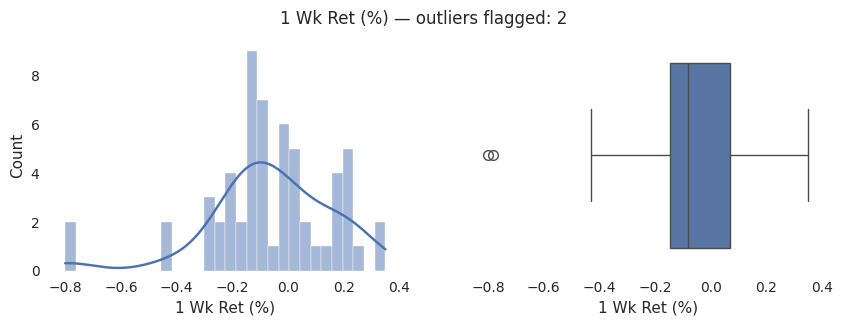

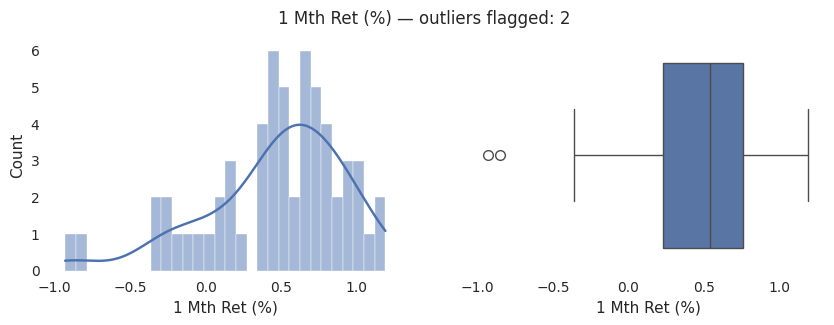

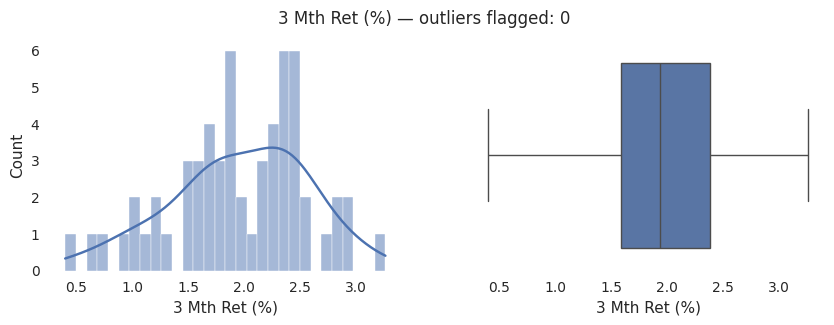

In [ ]:
# define return-like column patterns (common names in your dataset)
return_patterns = [
    r'\bret\b',           # ret, ret_1y, ret_3y
    r'\bRet\b',           # 1 Wk Ret (%), 1 Mth Ret (%)
    r'\bSIP Ret\b',       # SIP returns
    r'\byear\b',          # ret_of_2015 etc.
    r'\bweek_ret\b',      # weekly columns
]
# compile one regex
pat = re.compile('|'.join(return_patterns), flags=re.IGNORECASE)

return_cols = [c for c in numeric_cols if pat.search(c)]
print("Detected return-like columns:", len(return_cols))

# Function to flag IQR and Zscore for one column, and show quick counts
def flag_iqr_z(df_in, col):
    s = df_in[col].dropna()
    if len(s) < 3:
        return None
    Q1 = s.quantile(0.25); Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR; upper = Q3 + 1.5 * IQR
    meanv = s.mean(); stdv = s.std(ddof=0)
    # create flags on df_in (works on df_num which is numeric)
    df_num[f'{col}_is_missing'] = df_num[col].isna()
    df_num[f'{col}_outlier_iqr'] = (~df_num[f'{col}_is_missing']) & ((df_num[col] < lower) | (df_num[col] > upper))
    df_num[f'{col}_zscore'] = (df_num[col] - meanv) / stdv
    df_num[f'{col}_outlier_z'] = (~df_num[f'{col}_is_missing']) & (df_num[f'{col}_zscore'].abs() > 3)
    # Combined
    df_num[f'{col}_outlier_combined'] = df_num[f'{col}_outlier_iqr'] | df_num[f'{col}_outlier_z']
    return {
        'col': col,
        'n_nonmissing': len(s),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'iqr_count': int(df_num[f'{col}_outlier_iqr'].sum()),
        'z_count': int(df_num[f'{col}_outlier_z'].sum()),
        'combined': int(df_num[f'{col}_outlier_combined'].sum())
    }

return_summary = []
for col in return_cols:
    res = flag_iqr_z(df_num, col)
    if res:
        return_summary.append(res)

# Display summary table
return_summary_df = pd.DataFrame(return_summary).sort_values('combined', ascending=False)


# Plot example: histogram+boxplot for top 3 columns with most combined outliers
top_cols = return_summary_df['col'].tolist()[:3]
for c in top_cols:
    plt.figure(figsize=(10,3))
    plt.suptitle(f'{c} — outliers flagged: {df_num[c+"_outlier_combined"].sum()}')
    plt.subplot(1,2,1)
    sns.histplot(df_num[c].dropna(), bins=30, kde=True)
    plt.xlabel(c)
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[c].dropna(), orient='h')
    plt.xlabel(c)
    plt.show()



### Group 2 — Risk & Volatility metrics (why & method)

In [ ]:
# Cell: Risk metrics detection (boxplot + IsolationForest)
risk_cols_candidates = [
    'Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio', 'Beta', 'Alpha',
    'Information Ratio', 'R-Squared'
]
# select only existing numeric ones
risk_cols = [c for c in risk_cols_candidates if c in numeric_cols]
print("Risk metric columns found:", risk_cols)

# Apply IQR flagging for each risk column
risk_summary = []
for col in risk_cols:
    res = flag_iqr_z(df_num, col)
    if res:
        risk_summary.append(res)
risk_summary_df = pd.DataFrame(risk_summary).sort_values('combined', ascending=False)
display(risk_summary_df)

# Multivariate IsolationForest: use only rows without NaNs across chosen risk columns
if len(risk_cols) >= 2:
    X = df_num[risk_cols].copy()
    mask = X.notnull().all(axis=1)
    X_valid = X.loc[mask]
    if len(X_valid) >= 10:
        iso = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
        iso.fit(X_valid)
        pred = iso.predict(X_valid)  # -1 anomaly, 1 normal
        # create column indicating multivariate anomaly
        df_num['_risk_multivar_anomaly'] = False
        df_num.loc[mask, '_risk_multivar_anomaly'] = (pred == -1)
        print("IsolationForest applied; multivariate anomalies:", int(df_num['_risk_multivar_anomaly'].sum()))
        # show example anomalies
        display(df_num.loc[df_num['_risk_multivar_anomaly'], risk_cols + ['_risk_multivar_anomaly']].head(10))
    else:
        print("Not enough complete rows across risk metrics for IsolationForest.")
else:
    print("Not enough risk columns found for multivariate analysis.")

Risk metric columns found: ['Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio', 'Beta', 'Alpha', 'Information Ratio', 'R-Squared']


col  n_nonmissing  iqr_lower  iqr_upper  iqr_count  z_count  \
3                Beta            59     0.6400     1.2000          8        0   
6           R-Squared            59     0.6825     0.9825          6        0   
0  Standard Deviation            59     1.9250     5.7650          3        0   
2       Sortino Ratio            59    -0.4200     3.0600          0        0   
1        Sharpe Ratio            59    -0.1075     1.7525          0        0   
4               Alpha            59    -3.7325     3.8875          0        0   
5   Information Ratio            59    -2.3150     2.0050          0        0   

   combined  
3         8  
6         6  
0         3  
2         0  
1         0  
4         0  
5         0

IsolationForest applied; multivariate anomalies: 3


Standard Deviation  Sharpe Ratio  Sortino Ratio  Beta  Alpha  \
22                3.08          1.60           2.59  0.61   2.95   
49                1.93          1.71           2.93  0.46   1.80   
51                3.09          1.70           2.74  0.61   3.25   

    Information Ratio  R-Squared  _risk_multivar_anomaly  
22               0.65       0.52                    True  
49               0.02       0.76                    True  
51               0.77       0.52                    True


### Group 3 — NAV-based columns (why & method)

NAV columns found: ['latest_nav', 'previous_nav', 'nav_52w_high', 'nav_52w_low']


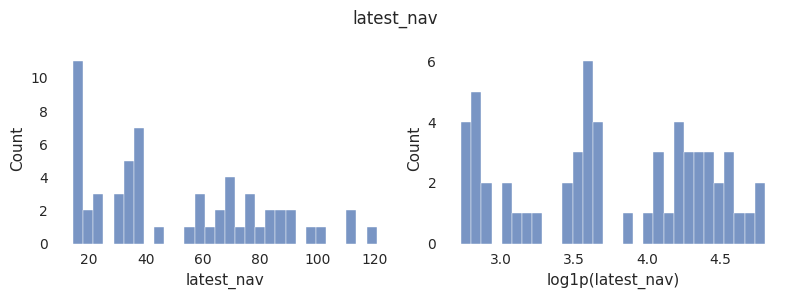

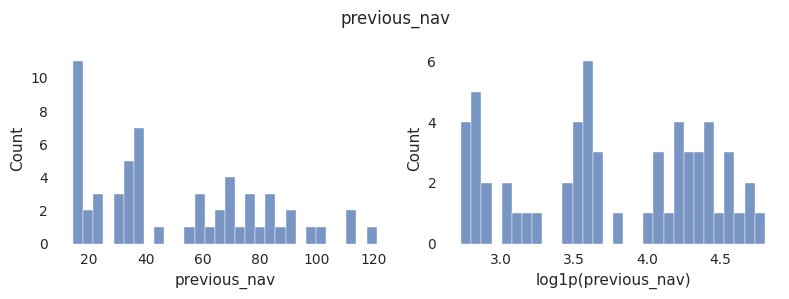

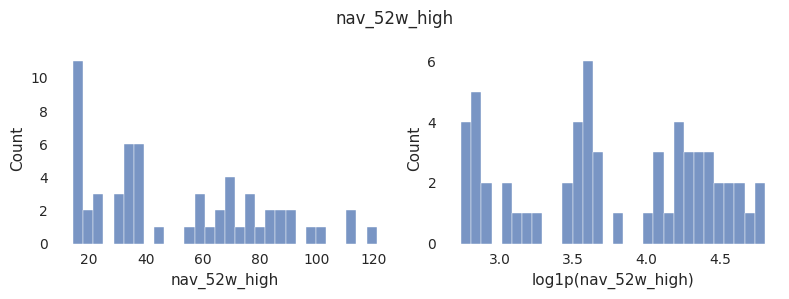

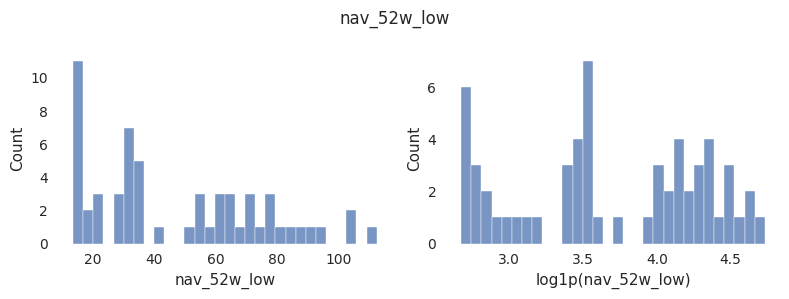

In [ ]:
# Cell: NAV columns detection & IQR flags
nav_candidates = ['latest_nav', 'previous_nav', 'nav_52w_high', 'nav_52w_low']
nav_cols = [c for c in nav_candidates if c in numeric_cols]
print("NAV columns found:", nav_cols)

nav_summary = []
for col in nav_cols:
    res = flag_iqr_z(df_num, col)
    if res:
        nav_summary.append(res)

# Example: show NAV histograms (log scale is often useful)
for col in nav_cols:
    plt.figure(figsize=(8,3))
    plt.suptitle(col)
    plt.subplot(1,2,1)
    sns.histplot(df_num[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.histplot(np.log1p(df_num[col].dropna()), bins=30)
    plt.xlabel('log1p(' + col + ')')
    plt.tight_layout()
    plt.show()


### Group 4 — Expense ratios (why & method)

Expense columns found: ['expense_ratio']


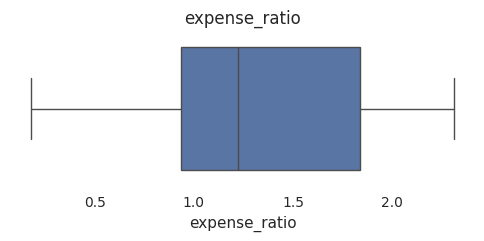

In [ ]:
#  Expense ratio columns
expense_candidates = ['expense_ratio', 'Expense Ratio (%).1', 'Expense Ratio', 'Expense Ratio (%)']
expense_cols = [c for c in expense_candidates if c in numeric_cols]
print("Expense columns found:", expense_cols)

expense_summary = []
for col in expense_cols:
    res = flag_iqr_z(df_num, col)
    if res:
        expense_summary.append(res)

# quick boxplots
for col in expense_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df_num[col].dropna(), orient='h')
    plt.title(col)
    plt.show()


#Univariate Analysis :

Our univariate analysis is performed on the entire Conservative Hybrid Fund category, not scheme-wise. We study the distribution of each return variable (1 week, 1 month, etc.) across all schemes to understand the typical behavior, variance, and skewness within the category.

###DIstribution of short term returns :

Short-term returns help us understand recent performance and short-horizon volatility of **Conservative Hybrid Funds**.

In [ ]:
# Load your final dataset
df = pd.read_csv("analytics_cleaned.csv")

# Select short term return columns
short_term_cols = [
    "1 Wk Ret (%)",
    "1 Mth Ret (%)",
    "3 Mth Ret (%)",
    "6 Mth Ret (%)",
    "ret_1y"
]

short_df = df[short_term_cols].copy()

# Convert to numeric
for col in short_term_cols:
    short_df[col] = pd.to_numeric(short_df[col], errors='coerce')

short_df.head()

1 Wk Ret (%)  1 Mth Ret (%)  3 Mth Ret (%)  6 Mth Ret (%)  ret_1y
0         -0.08           0.38           2.27           3.92    7.11
1         -0.21           0.55           2.26           4.80    7.46
2         -0.15           0.73           2.49           4.48    5.93
3          0.20           0.83           1.94           2.80    5.82
4          0.01           0.83           2.56           2.53    3.58

#### Short-Term Returns: Summary Statistics


In [ ]:
summary_short = short_df.describe().T
summary_short["skewness"] = short_df.skew()
summary_short


count      mean       std   min    25%   50%    75%    max  \
1 Wk Ret (%)    59.0 -0.061695  0.222433 -0.80 -0.145 -0.08  0.070   0.35   
1 Mth Ret (%)   59.0  0.461525  0.456938 -0.93  0.230  0.54  0.760   1.19   
3 Mth Ret (%)   59.0  1.957119  0.611400  0.40  1.590  1.94  2.385   3.26   
6 Mth Ret (%)   59.0  3.671864  1.229883  0.71  2.950  3.52  4.510   6.84   
ret_1y          59.0  6.007119  1.582020  3.41  4.865  5.93  7.235  10.00   

               skewness  
1 Wk Ret (%)  -0.954315  
1 Mth Ret (%) -1.034659  
3 Mth Ret (%) -0.383236  
6 Mth Ret (%) -0.005506  
ret_1y         0.351819

#### Distribution Plots (Histogram + KDE)



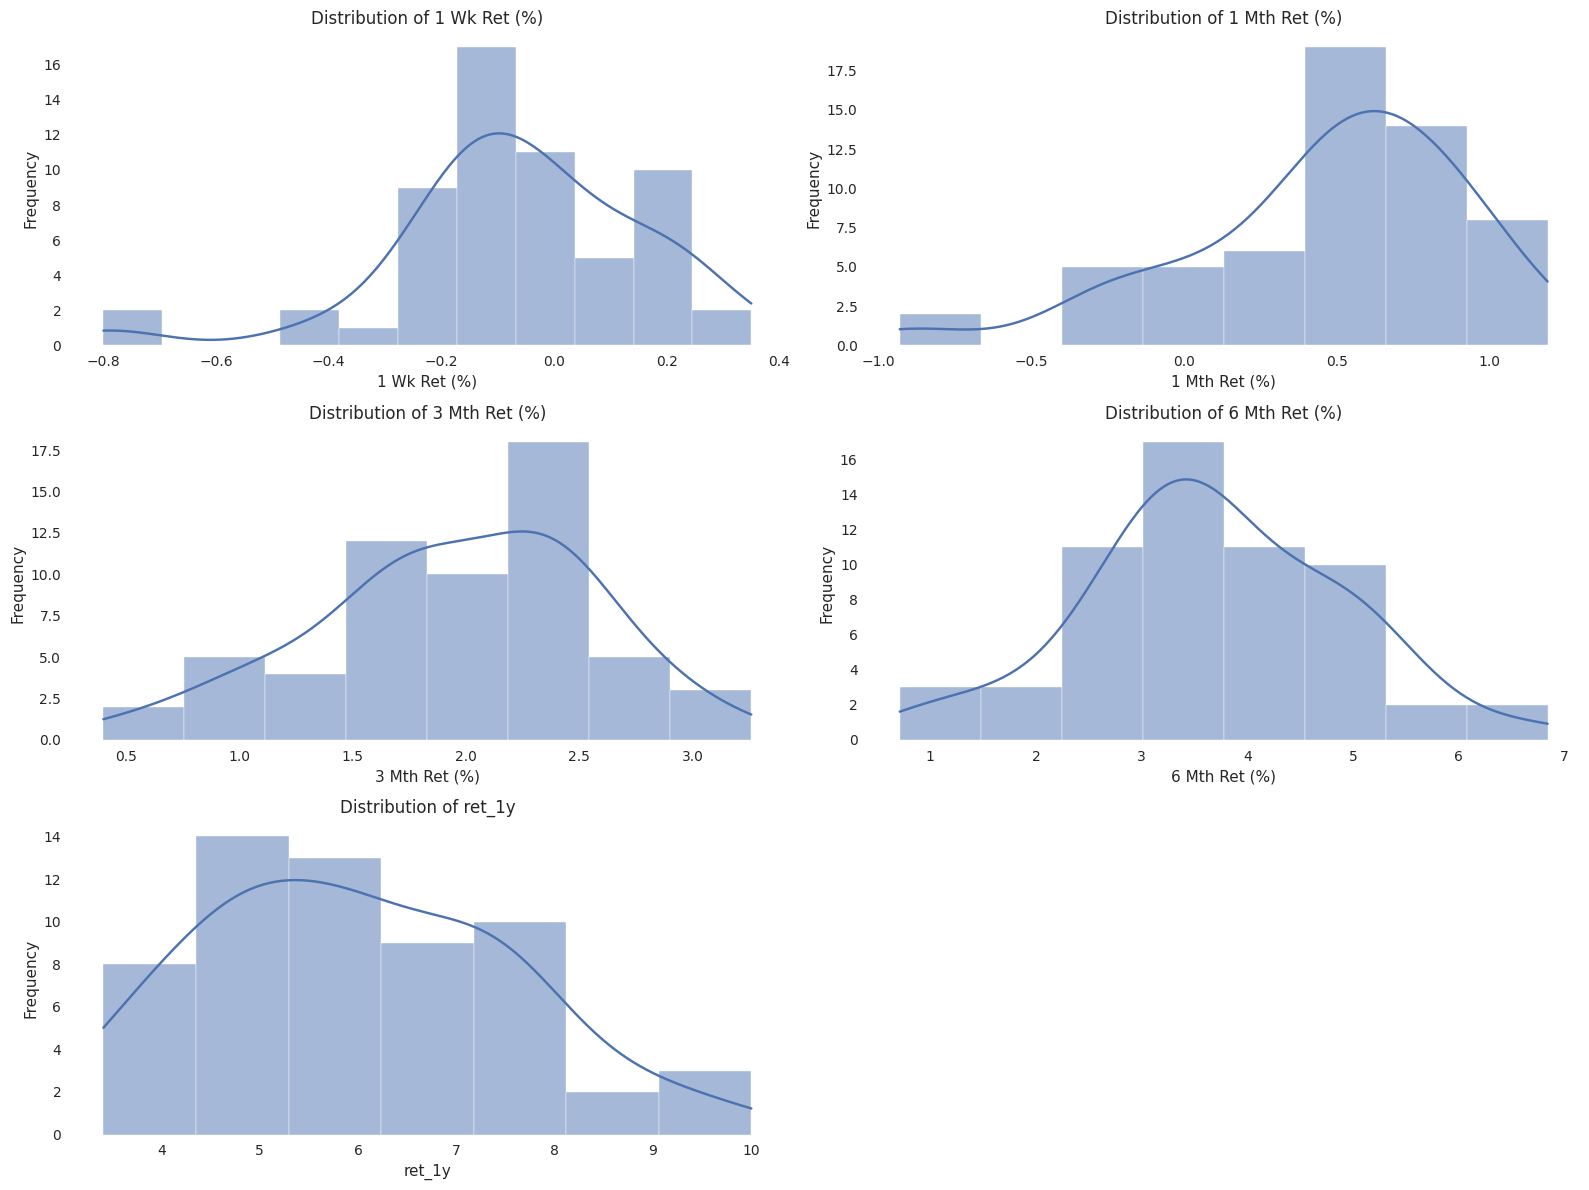

In [ ]:
# Ensure short_term_cols reflects the actual column names in short_df
short_term_cols = [
    "1 Wk Ret (%)",
    "1 Mth Ret (%)",
    "3 Mth Ret (%)",
    "6 Mth Ret (%)",
    "ret_1y"
]

plt.figure(figsize=(16, 12))

for i, col in enumerate(short_term_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(short_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Boxplot Analysis



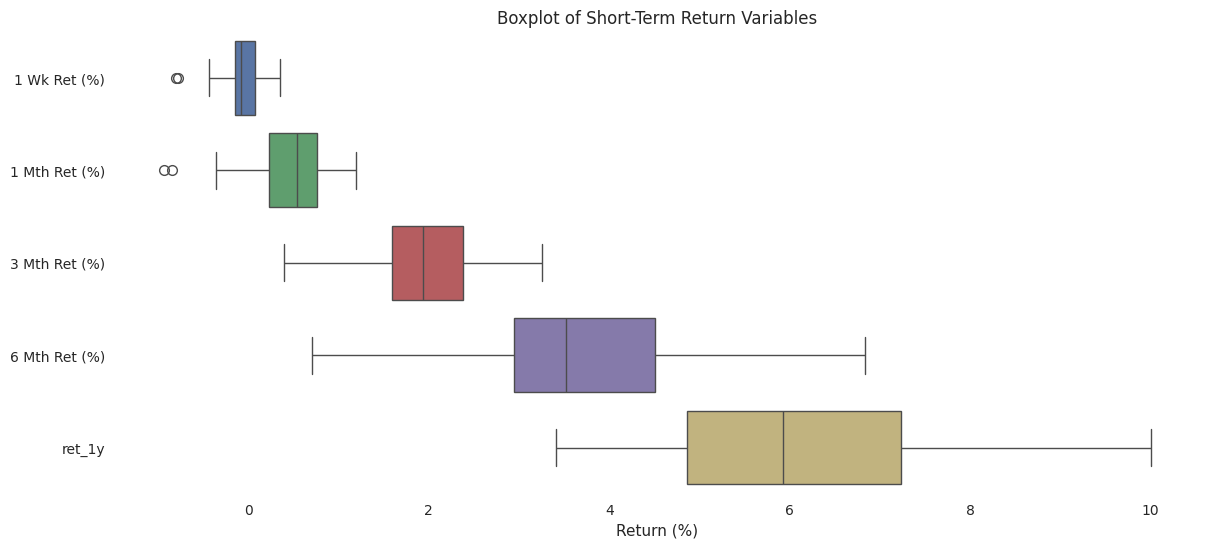

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=short_df, orient='h')
plt.title("Boxplot of Short-Term Return Variables")
plt.xlabel("Return (%)")
plt.show()


## Long-Term Returns

We analyze longer investment horizons to understand **consistency** and **stability** of Conservative Hybrid Funds.



In [ ]:
long_term_cols = [
    "ret_3y",
    "ret_5y",
    "ret_10y"
]

long_df = df[long_term_cols].copy()

for col in long_term_cols:
    long_df[col] = pd.to_numeric(long_df[col], errors='coerce')

long_df.head()

ret_3y  ret_5y  ret_10y
0   11.84   10.77     9.14
1    9.28   10.38     8.77
2    8.57    5.72     8.31
3    7.42    7.35     6.91
4    9.56    8.31     8.31

In [ ]:
summary_long = long_df.describe().T
summary_long["skewness"] = long_df.skew()
summary_long


count      mean       std   min    25%   50%    75%    max  skewness
ret_3y    59.0  9.748136  1.424001  6.70  8.655  9.80  10.58  12.98  0.125219
ret_5y    59.0  9.285085  1.631671  5.72  8.335  9.32  10.45  13.60  0.200783
ret_10y   59.0  8.405424  1.164519  5.76  7.710  8.31   9.04  12.25  0.793640

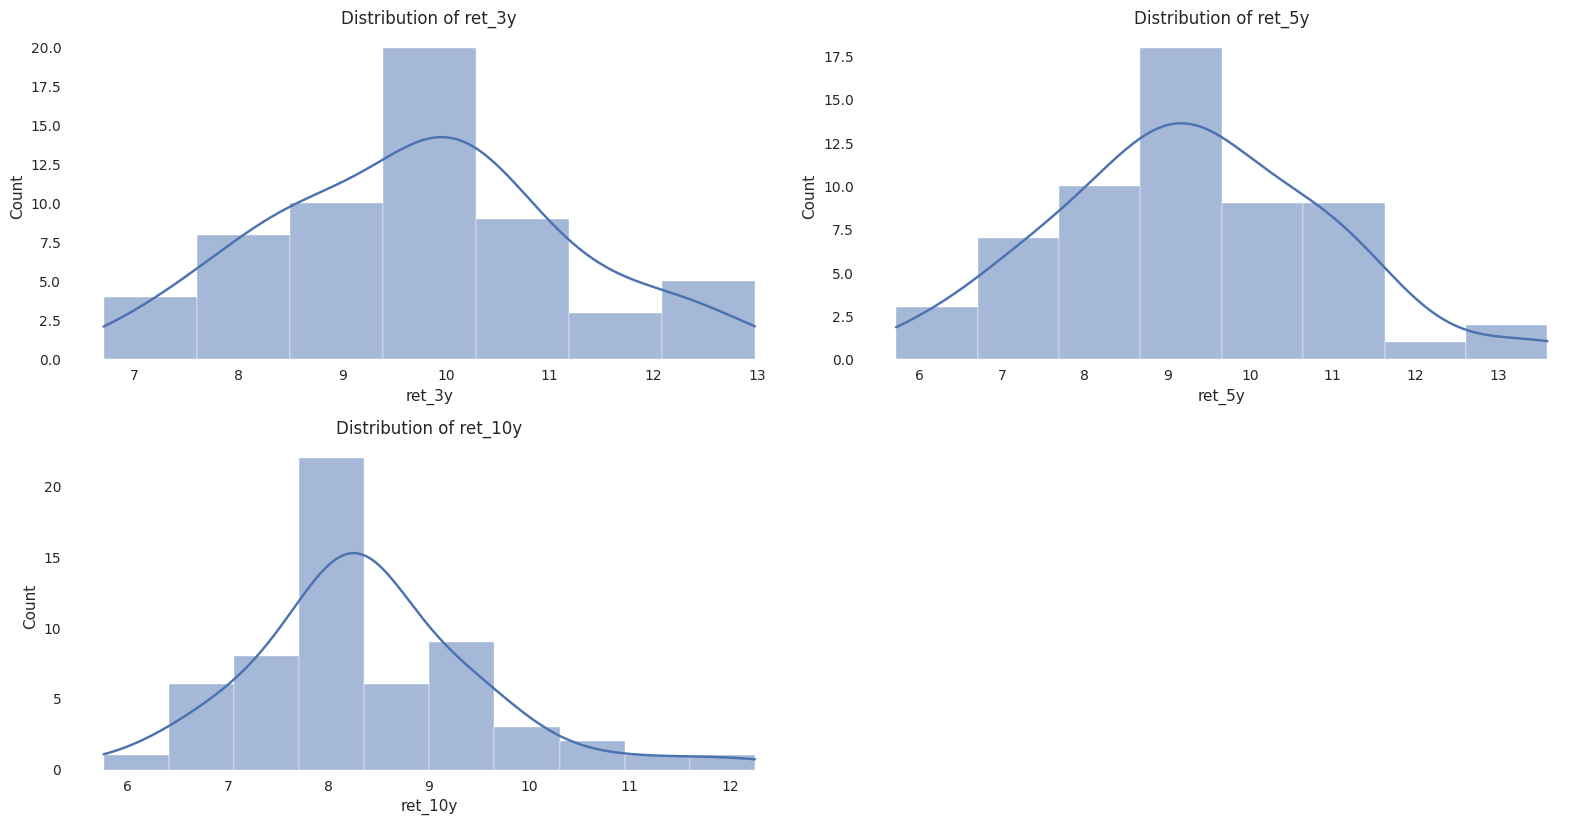

In [ ]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(long_term_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(long_df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


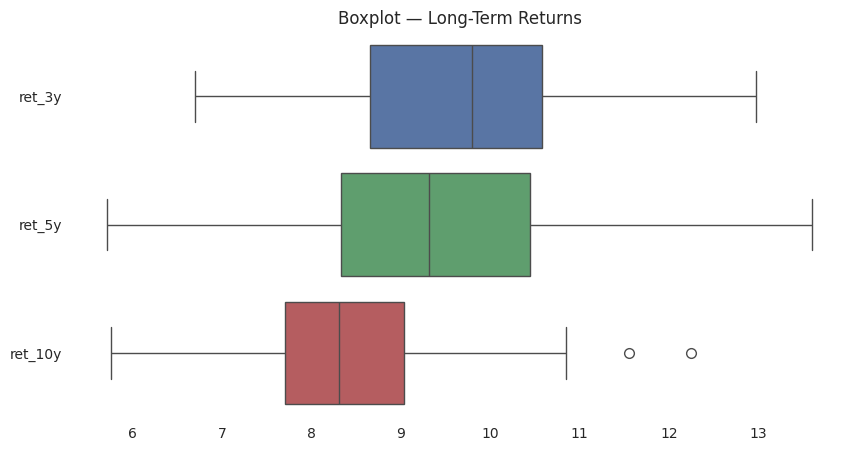

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=long_df, orient="h")
plt.title("Boxplot — Long-Term Returns")
plt.show()


## Risk Metrics — Univariate Analysis
We analyze key risk indicators to understand volatility and risk-adjusted performance of Conservative Hybrid Funds.
Metrics included: **Standard Deviation, Beta, Sharpe Ratio, Sortino Ratio, Alpha, Information Ratio**.


In [ ]:
risk_cols = [
    "Standard Deviation",
    "Beta",
    "Sharpe Ratio",
    "Sortino Ratio",
    "Alpha",
    "Information Ratio"
]

risk_df = df[risk_cols].apply(pd.to_numeric, errors='coerce')
risk_df.head()


Standard Deviation  Beta  Sharpe Ratio  Sortino Ratio  Alpha  \
0                4.54  1.15          1.14           1.71   1.40   
1                3.03  0.76          0.90           1.64   0.24   
2                3.43  0.87          0.59           0.93  -0.80   
3                3.61  0.93          0.24           0.43  -2.17   
4                5.97  1.50          0.48           0.79  -2.00   

   Information Ratio  
0               1.11  
1              -0.37  
2              -0.91  
3              -2.12  
4              -0.13

In [ ]:
display(risk_df.describe().T.assign(skewness=risk_df.skew()))


count      mean       std   min    25%   50%    75%   max  \
Standard Deviation   59.0  3.780508  0.768800  1.92  3.365  3.59  4.325  5.98   
Beta                 59.0  0.924407  0.193749  0.46  0.850  0.89  0.990  1.50   
Sharpe Ratio         59.0  0.856949  0.371243  0.05  0.590  0.85  1.055  1.71   
Sortino Ratio        59.0  1.352034  0.626382  0.08  0.885  1.29  1.755  2.93   
Alpha                59.0  0.146102  1.379260 -2.58 -0.875  0.24  1.030  3.25   
Information Ratio    59.0 -0.158475  0.801393 -2.15 -0.695  0.02  0.385  1.35   

                    skewness  
Standard Deviation  0.612825  
Beta                0.706383  
Sharpe Ratio        0.188187  
Sortino Ratio       0.414237  
Alpha               0.187675  
Information Ratio  -0.627275

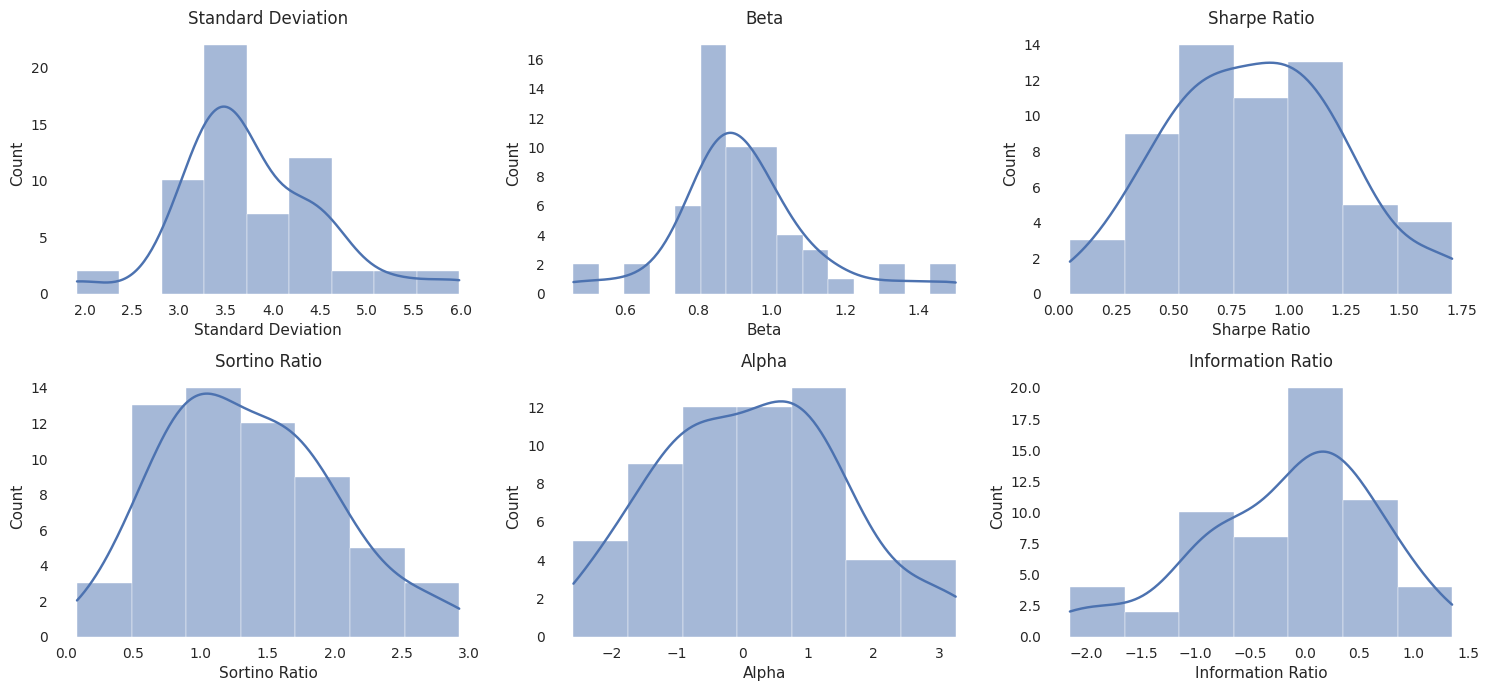

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(risk_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(risk_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


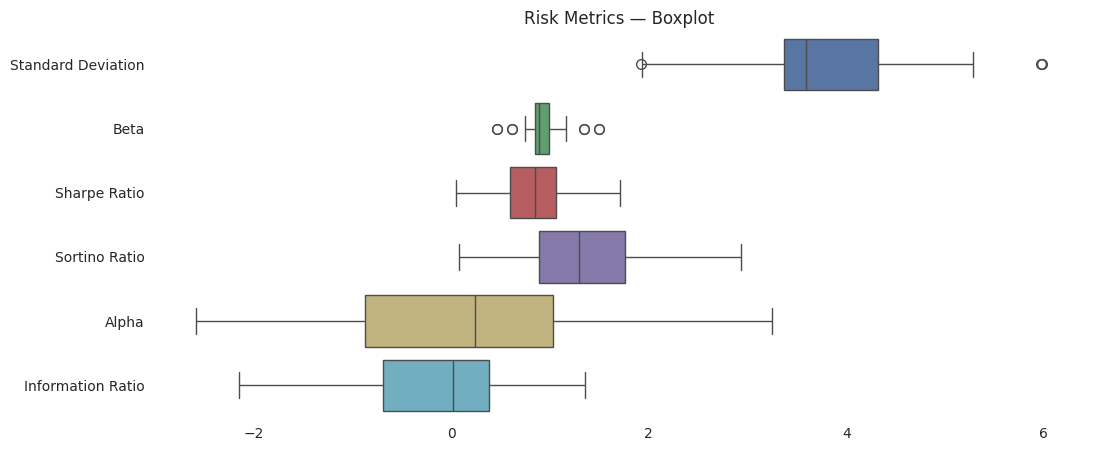

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=risk_df, orient="h")
plt.title("Risk Metrics — Boxplot")
plt.show()


#  NAV Trend Analysis And Time Series Analysis

Below we visualize the NAV over time for each fund scheme.
This helps understand:

- Long-term growth
- Volatility
- Trend stability
- Market corrections impact


In [ ]:
plt.style.use("seaborn-v0_8")

nav = pd.read_csv("nav_values_cleaned.csv")

# Identify date columns (except scheme columns)
id_cols = ["Scheme Name"]
date_cols = [col for col in nav.columns if col not in id_cols]

# Melt wide → long
nav_long = nav.melt(id_vars=id_cols, var_name="Date", value_name="NAV")

nav_long.head()

Scheme Name      Date      NAV
0  Aditya Birla Sun Life Conservative Hybrid Acti...  12/02/25  32.1123
1       Axis Conservative Hybrid Fund - Regular Plan  12/02/25  13.9041
2  Axis Retirement Fund - Conservative Plan - Reg...  12/02/25  15.2584
3  Bandhan Asset Allocation Fund - Conservative P...  12/02/25  16.8818
4    Bandhan Conservative Hybrid Fund - Regular Plan  12/02/25  13.8302

In [ ]:
# Convert date column to datetime format
nav_long["Date"] = pd.to_datetime(nav_long["Date"], errors="coerce")

# Convert NAV to numeric
nav_long["NAV"] = pd.to_numeric(nav_long["NAV"], errors="coerce")

# Drop rows where date is missing (invalid columns)
nav_long = nav_long.dropna(subset=["Date"])

# Sort properly
nav_long = nav_long.sort_values(["Scheme Name", "Date"])

nav_long.head()

#  Converted `Date` into a proper **datetime** format.
#  Converted NAV into numeric values.
#  Sorted values by Scheme → Date for correct time-series order.

Scheme Name       Date      NAV
33326  Aditya Birla Sun Life Conservative Hybrid Acti... 2022-01-12  26.4420
33280  Aditya Birla Sun Life Conservative Hybrid Acti... 2022-02-12  26.4472
33234  Aditya Birla Sun Life Conservative Hybrid Acti... 2022-05-12  26.4690
33188  Aditya Birla Sun Life Conservative Hybrid Acti... 2022-06-12  26.4240
33142  Aditya Birla Sun Life Conservative Hybrid Acti... 2022-07-12  26.3944

In [ ]:
# Set Date as Time Index for Each Scheme
nav_ts = nav_long.set_index("Date")

# Install plotly if not already available (usually pre-installed in Colab)
import plotly.express as px

# Create an interactive line chart
fig = px.line(nav_long,
              x="Date",
              y="NAV",
              color="Scheme Name",
              title="NAV Trend for Conservative Hybrid Mutual Funds",
              template="plotly_white")

# Move legend to the side and make the graph taller
fig.update_layout(height=700, legend=dict(yanchor="top", y=0.99, xanchor="left", x=1.02))

fig.show()


While absolute NAV prices vary widely (from ₹15 to ₹120), the **growth direction** is uniform. To compare actual *performance* rather than just price, a **rebased chart (starting all at 100)** would be the next logical step.

## Performance Comparison: Growth of ₹100
Since raw NAVs differ significantly (e.g., ₹15 vs ₹120), comparing them directly on a single chart is difficult.

To solve this, we **rebase** all funds to start at **100**.
* This simulates investing **₹100 in every fund** on the start date.
* The resulting chart shows pure **percentage growth**, allowing for a fair comparison of returns.

In [ ]:
# 1. Sort data to ensure correct calculation
nav_long = nav_long.sort_values(by=['Scheme Name', 'Date'])

# 2. Create a new column 'Normalized_NAV'
# Formula: (Current NAV / Initial NAV) * 100
nav_long['Normalized_NAV'] = nav_long.groupby('Scheme Name')['NAV'].transform(lambda x: x / x.iloc[0] * 100)

# 3. Plot the rebased data
fig = px.line(nav_long,
              x="Date",
              y="Normalized_NAV",
              color="Scheme Name",
              title="Growth of ₹100 Investment (Rebased)",
              labels={"Normalized_NAV": "Value of Investment (₹)"},
              template="plotly_white")

# Adjust layout for readability
fig.update_layout(height=600,
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=1.02),
                  hovermode="x unified") # Shows all values for a specific date on hover

fig.show()

##  Rolling Average (Moving Average)

A rolling average smooths the NAV time series by taking the **average of the last N days**.
It reduces daily noise and highlights the long-term trend.

We use:
- **7-day rolling average** → short-term trend
- **30-day rolling average** → long-term trend


In [ ]:
# 1. First, make sure we calculate the rolling averages (Run this part!)
nav_long = nav_long.sort_values(["Scheme Name", "Date"])

nav_long["NAV_7D_Roll"] = nav_long.groupby("Scheme Name")["NAV"].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

nav_long["NAV_30D_Roll"] = nav_long.groupby("Scheme Name")["NAV"].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

# 2. Now define the plotting function
def plot_rolling_analysis(scheme):
    # Filter data for the selected scheme
    temp = nav_long[nav_long["Scheme Name"] == scheme]

    plt.figure(figsize=(14, 6))

    # Plot Actual NAV (Blue)
    plt.plot(temp["Date"], temp["NAV"],
             label="Actual NAV", color='black', alpha=0.5, linewidth=1.5)

    # Plot 7-Day Rolling Average (Orange)
    plt.plot(temp["Date"], temp["NAV_7D_Roll"],
             label="7-Day Trend", color='red', linewidth=1.5, linestyle='--')

    # Plot 30-Day Rolling Average (Green)
    plt.plot(temp["Date"], temp["NAV_30D_Roll"],
             label="30-Day Trend", color='green', linewidth=2)

    plt.title(f"Trend Analysis: {scheme}")
    plt.xlabel("Date")
    plt.ylabel("NAV")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 3. Create the Dropdown Widget
schemes = nav_long["Scheme Name"].unique()
widgets.interact(plot_rolling_analysis, scheme=list(schemes));

interactive(children=(Dropdown(description='scheme', options=('Aditya Birla Sun Life Conservative Hybrid Activ…

## Volatility & Correlation Analysis

We will:
1. Compute daily returns per scheme.
2. Compute volatility (daily and annualized) for:
   - Last 3 years
   - Last 1 year
3. Plot volatility bars and a correlation heatmap of returns.
4. Report the most risky and most stable schemes for each period and draw a short conclusion.


In [ ]:
# compute daily returns per scheme
nav_long = nav_long.sort_values(["Scheme Name","Date"])
nav_long["Return"] = nav_long.groupby("Scheme Name")["NAV"].transform(lambda x: x.pct_change())

# determine last date in dataset and cutoff dates for 3y and 1y
last_date = nav_long["Date"].max()
cutoff_3y = last_date - pd.DateOffset(years=3)
cutoff_1y = last_date - pd.DateOffset(years=1)

print("Last date in data:", last_date.date())
print("Cutoff 3 years from last date:", cutoff_3y.date())
print("Cutoff 1 year from last date:", cutoff_1y.date())

# quick check counts
nav_long.groupby("Scheme Name")["Date"].agg(["min","max","count"]).head()

Last date in data: 2025-12-09
Cutoff 3 years from last date: 2022-12-09
Cutoff 1 year from last date: 2024-12-09


min        max  \
Scheme Name                                                                
Aditya Birla Sun Life Conservative Hybrid Activ... 2022-01-12 2025-12-09   
Aditya Birla Sun Life Conservative Hybrid Activ... 2022-01-12 2025-12-09   
Aditya Birla Sun Life Regular Savings Fund - Di... 2022-01-12 2025-12-09   
Axis Conservative Hybrid Fund - Direct Plan        2022-01-12 2025-12-09   
Axis Conservative Hybrid Fund - Regular Plan       2022-01-12 2025-12-09   

                                                    count  
Scheme Name                                                
Aditya Birla Sun Life Conservative Hybrid Activ...    725  
Aditya Birla Sun Life Conservative Hybrid Activ...    725  
Aditya Birla Sun Life Regular Savings Fund - Di...    725  
Axis Conservative Hybrid Fund - Direct Plan           725  
Axis Conservative Hybrid Fund - Regular Plan          725

In [ ]:
def compute_volatility(df, start_date=None):
    """
    df: nav_long dataframe
    start_date: include data from start_date onward (datetime or None)
    returns: dataframe with volatility metrics per scheme
    """
    if start_date is not None:
        df = df[df["Date"] >= start_date].copy()
    # drop NaN returns
    df = df.dropna(subset=["Return"])
    # compute daily std of returns, then annualize by sqrt(252)
    vol = df.groupby("Scheme Name")["Return"].agg(daily_std = lambda x: x.std(ddof=0),
                                                  mean_return = "mean",
                                                  obs = "count").reset_index()
    vol["ann_std"] = vol["daily_std"] * np.sqrt(252)  # annualized volatility
    # keep reasonable results only (enough observations)
    vol = vol.sort_values("ann_std", ascending=False).reset_index(drop=True)
    return vol

# compute for two periods
vol_3y = compute_volatility(nav_long, start_date=cutoff_3y)
vol_1y = compute_volatility(nav_long, start_date=cutoff_1y)

# display top rows
vol_3y.head()


Scheme Name  daily_std  mean_return  \
0  Aditya Birla Sun Life Conservative Hybrid Acti...   0.051126     0.001549   
1  Aditya Birla Sun Life Conservative Hybrid Acti...   0.047168     0.001399   
2                  Sundaram Conservative Hybrid Fund   0.041762     0.001156   
3    Sundaram Conservative Hybrid Fund - Direct Plan   0.039750     0.001068   
4  SBI Magnum Children's Benefit Fund - Savings P...   0.026365     0.000857   

   obs   ann_std  
0  705  0.811593  
1  705  0.748772  
2  705  0.662950  
3  705  0.631015  
4  705  0.418528

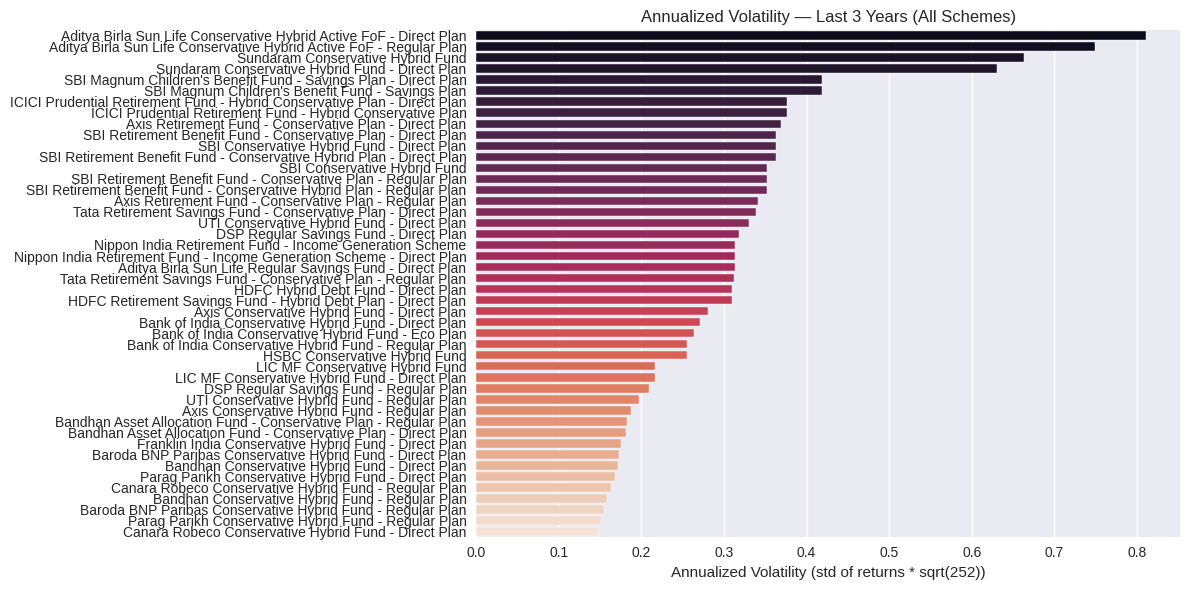

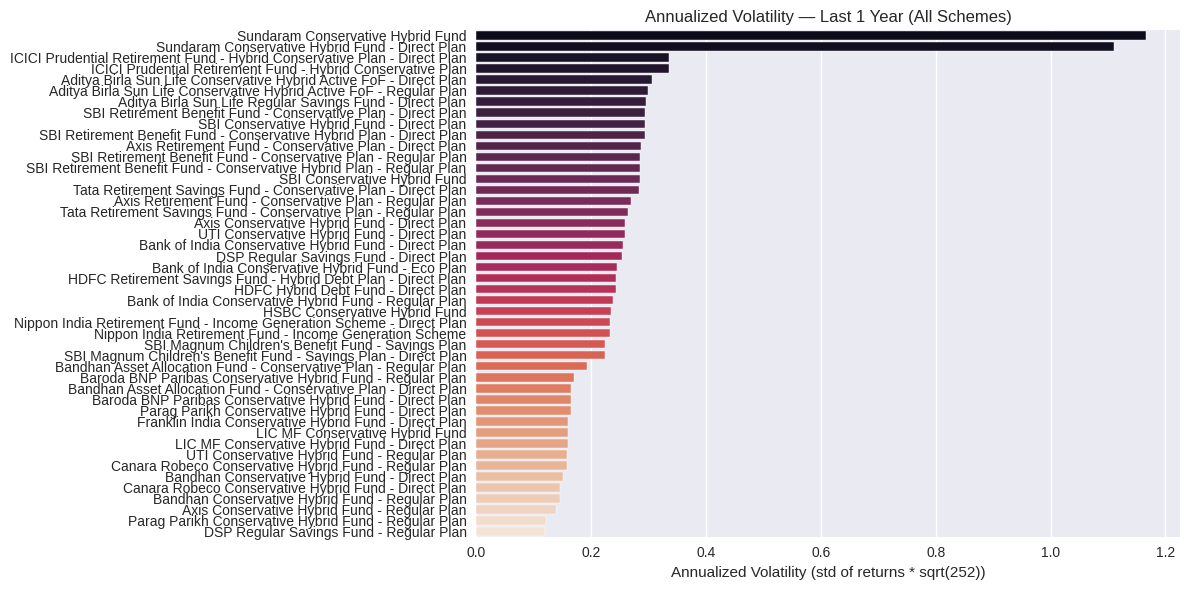

In [ ]:
# plotting helper
def plot_volatility_bar(vol_df, title, top_n=None):
    df = vol_df.copy()
    if top_n:
        df = df.head(top_n)
    plt.figure(figsize=(12,6))
    sns.barplot(x="ann_std", y="Scheme Name", data=df, palette="rocket")
    plt.xlabel("Annualized Volatility (std of returns * sqrt(252))")
    plt.ylabel("")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Full plots
plot_volatility_bar(vol_3y, "Annualized Volatility — Last 3 Years (All Schemes)")
plot_volatility_bar(vol_1y, "Annualized Volatility — Last 1 Year (All Schemes)")

In [ ]:
def top_and_bottom(vol_df, top_k=3):
    risky = vol_df.head(top_k)[["Scheme Name","ann_std","daily_std","mean_return","obs"]]
    stable = vol_df.tail(top_k)[["Scheme Name","ann_std","daily_std","mean_return","obs"]].iloc[::-1]
    return risky, stable

risky_3y, stable_3y = top_and_bottom(vol_3y, top_k=3)
risky_1y, stable_1y = top_and_bottom(vol_1y, top_k=3)

print("=== Last 3 Years: Most Risky (top 3) ===")
display(risky_3y)
print("\n=== Last 3 Years: Most Stable (bottom 3) ===")
display(stable_3y)

print("\n=== Last 1 Year: Most Risky (top 3) ===")
display(risky_1y)
print("\n=== Last 1 Year: Most Stable (bottom 3) ===")
display(stable_1y)


=== Last 3 Years: Most Risky (top 3) ===


Scheme Name   ann_std  daily_std  \
0  Aditya Birla Sun Life Conservative Hybrid Acti...  0.811593   0.051126   
1  Aditya Birla Sun Life Conservative Hybrid Acti...  0.748772   0.047168   
2                  Sundaram Conservative Hybrid Fund  0.662950   0.041762   

   mean_return  obs  
0     0.001549  705  
1     0.001399  705  
2     0.001156  705


=== Last 3 Years: Most Stable (bottom 3) ===


Scheme Name   ann_std  daily_std  \
45  Canara Robeco Conservative Hybrid Fund - Direc...  0.147379   0.009284   
44  Parag Parikh Conservative Hybrid Fund - Regula...  0.151371   0.009535   
43  Baroda BNP Paribas Conservative Hybrid Fund - ...  0.154979   0.009763   

    mean_return  obs  
45     0.000121  705  
44     0.000133  705  
43     0.000074  705


=== Last 1 Year: Most Risky (top 3) ===


Scheme Name   ann_std  daily_std  \
0                  Sundaram Conservative Hybrid Fund  1.166926   0.073509   
1    Sundaram Conservative Hybrid Fund - Direct Plan  1.110003   0.069924   
2  ICICI Prudential Retirement Fund - Hybrid Cons...  0.335297   0.021122   

   mean_return  obs  
0     0.003637  223  
1     0.003357  223  
2     0.000636  223


=== Last 1 Year: Most Stable (bottom 3) ===


Scheme Name   ann_std  daily_std  \
45            DSP Regular Savings Fund - Regular Plan  0.118919   0.007491   
44  Parag Parikh Conservative Hybrid Fund - Regula...  0.121317   0.007642   
43       Axis Conservative Hybrid Fund - Regular Plan  0.139748   0.008803   

    mean_return  obs  
45     0.000040  223  
44    -0.000105  223  
43     0.000135  223

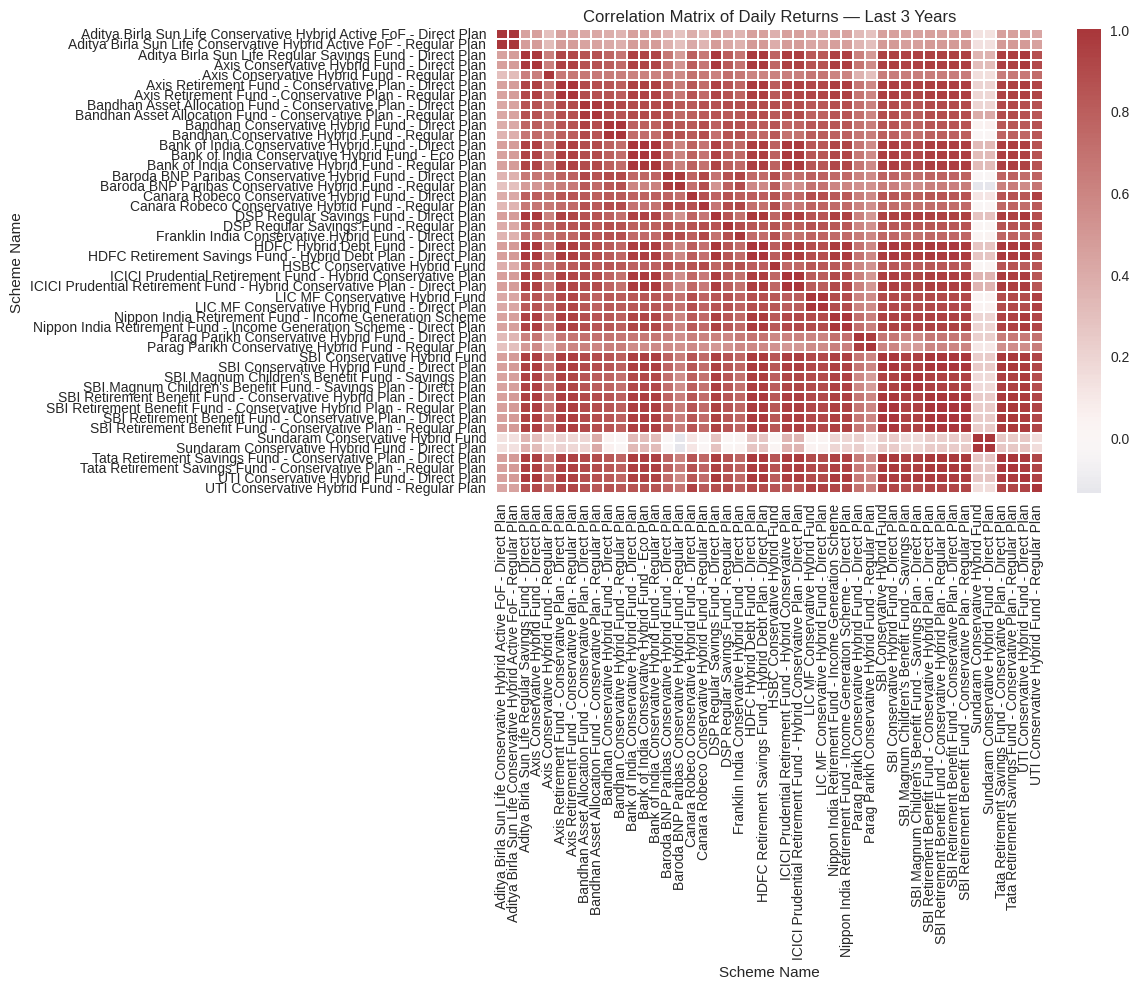

In [ ]:
# prepare pivot table of daily returns, with dates as index and schemes as columns
def returns_pivot(df, start_date=None):
    if start_date is not None:
        df = df[df["Date"] >= start_date].copy()
    ret_pivot = df.pivot_table(index="Date", columns="Scheme Name", values="Return")
    return ret_pivot

ret_3y = returns_pivot(nav_long, start_date=cutoff_3y)
corr_3y = ret_3y.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_3y, cmap="vlag", center=0, annot=False, linewidths=0.2)
plt.title("Correlation Matrix of Daily Returns — Last 3 Years")
plt.tight_layout()
plt.show()


In [ ]:
def correlation_summary(corr):
    corr_vals = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack()
    if corr_vals.empty:
        return None
    max_pair = corr_vals.idxmax(), corr_vals.max()
    min_pair = corr_vals.idxmin(), corr_vals.min()
    return {"most positive corelated pair": max_pair,"most negative corelated pair": min_pair}

corr_summary_3y = correlation_summary(corr_3y)
display(corr_summary_3y)


{'most positive corelated pair': (('HDFC Hybrid Debt Fund - Direct Plan',
   'HDFC Retirement Savings Fund - Hybrid Debt Plan - Direct Plan'),
  1.0),
 'most negative corelated pair': (('Baroda BNP Paribas Conservative Hybrid Fund - Regular Plan',
   'Sundaram Conservative Hybrid Fund'),
  -0.13729623744583044)}

#Bivariate Analysis :

In this section, we study relationships between two variables to understand how risk, returns, and portfolio structure interact in Conservative Hybrid Funds. The goal is to check whether these funds follow the expected low-risk, stable-return behavior.

## Standard Deviation vs 1-Year Return


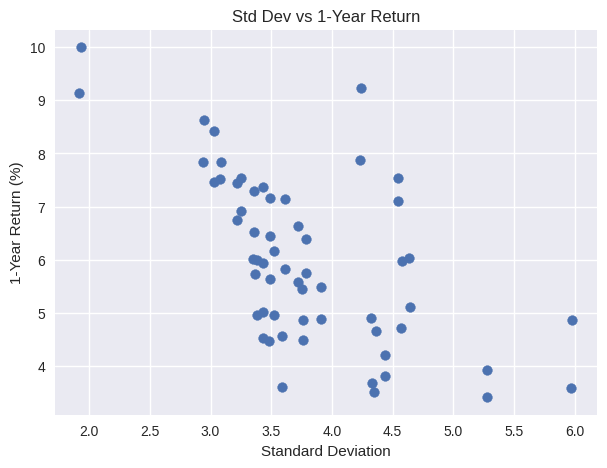

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["Standard Deviation"], df["ret_1y"])
plt.xlabel("Standard Deviation")
plt.ylabel("1-Year Return (%)")
plt.title("Std Dev vs 1-Year Return")
plt.grid(True)
plt.show()

## Sharpe Ratio vs 3-Year Return

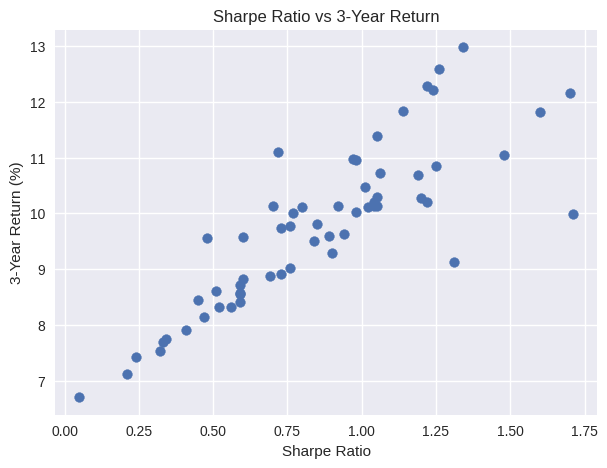

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["Sharpe Ratio"], df["ret_3y"])
plt.xlabel("Sharpe Ratio")
plt.ylabel("3-Year Return (%)")
plt.title("Sharpe Ratio vs 3-Year Return")
plt.grid(True)
plt.show()

## Beta vs 5-Year Return

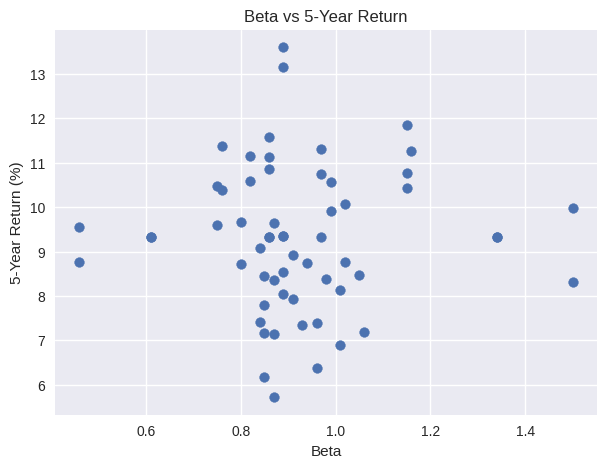

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["Beta"], df["ret_5y"])
plt.xlabel("Beta")
plt.ylabel("5-Year Return (%)")
plt.title("Beta vs 5-Year Return")
plt.grid(True)
plt.show()

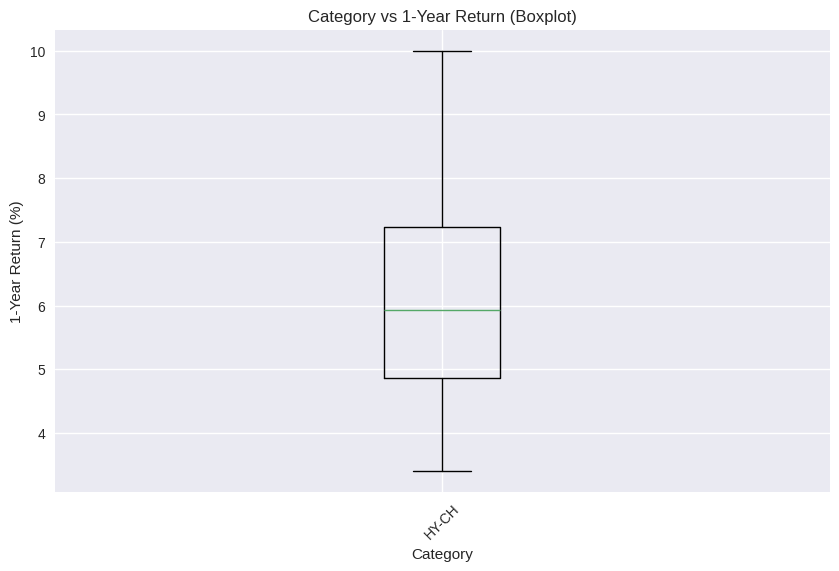

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([df[df['category'] == c]['ret_1y'] for c in df['category'].unique()],
            labels=df['category'].unique(),
            vert=True)

plt.xlabel("Category")
plt.ylabel("1-Year Return (%)")
plt.title("Category vs 1-Year Return (Boxplot)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Expense Ratio vs. Returns

These graphs show how fund fees (expense ratio) relate to returns.

* **Observation:** The scatter points indicate that **higher expense ratios do NOT lead to higher returns**.
* **Trend:** In many cases, returns are similar or even lower for high-expense funds.

> **Key Takeaway:** This means investors paying more fees are **not getting better performance** in Conservative Hybrid Funds.

 ### Expense Ratio vs 1-Year Return

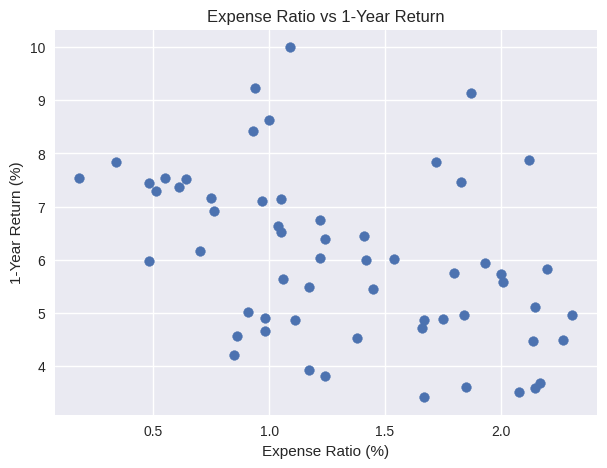

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["expense_ratio"], df["ret_1y"])
plt.xlabel("Expense Ratio (%)")
plt.ylabel("1-Year Return (%)")
plt.title("Expense Ratio vs 1-Year Return")
plt.grid(True)
plt.show()


### Expense Ratio vs 3-Year Return

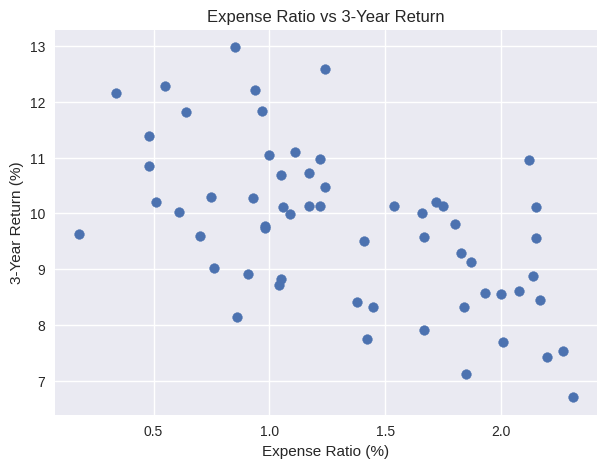

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["expense_ratio"], df["ret_3y"])
plt.xlabel("Expense Ratio (%)")
plt.ylabel("3-Year Return (%)")
plt.title("Expense Ratio vs 3-Year Return")
plt.grid(True)
plt.show()

### Expense Ratio vs 5-Year Return

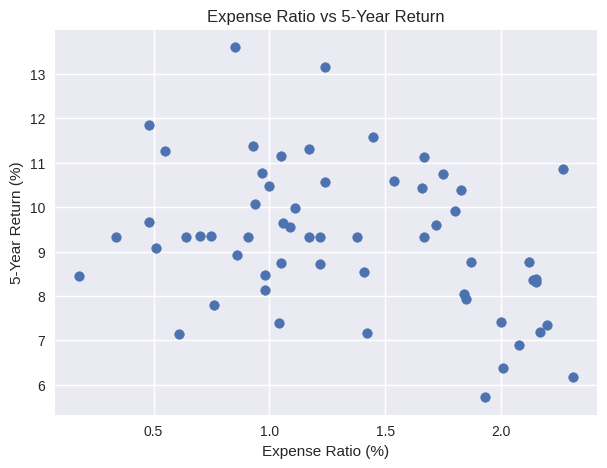

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["expense_ratio"], df["ret_5y"])
plt.xlabel("Expense Ratio (%)")
plt.ylabel("5-Year Return (%)")
plt.title("Expense Ratio vs 5-Year Return")
plt.grid(True)
plt.show()

## Riskometer Level vs. NAV Volatility

This graph shows whether **higher riskometer levels** are associated with **higher NAV volatility**.

* **High Sensitivity:** If high-risk funds show larger volatility boxes, it means they are **more unstable**.
* **Low Sensitivity:** If volatility is similar across levels, the riskometer labels may **not fully reflect** NAV behavior.

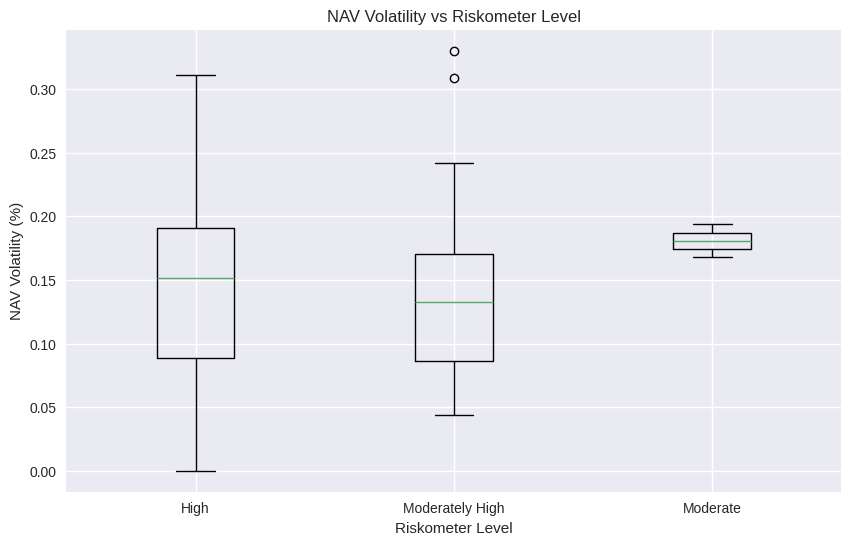

In [ ]:
# ---- Calculate NAV Volatility ----
df["nav_volatility"] = abs(df["latest_nav"] - df["previous_nav"]) / df["previous_nav"] * 100

# ---- Prepare data grouped by riskometer ----
risk_levels = df["riskometer"].unique()
volatility_data = [df[df["riskometer"] == r]["nav_volatility"] for r in risk_levels]

# ---- Boxplot: NAV Volatility vs Riskometer ----
plt.figure(figsize=(10,6))
plt.boxplot(volatility_data, labels=risk_levels)
plt.xlabel("Riskometer Level")
plt.ylabel("NAV Volatility (%)")
plt.title("NAV Volatility vs Riskometer Level")
plt.grid(True)
plt.show()


## Market Cap vs. 1-Year Return

This graph analyzes whether exposure to different market segments (Large, Mid, Small-cap) impacts short-term performance.

* **Observation:** The points are widely spread with **no clear trend**. Funds with both large-cap and small-cap exposure show mixed results.
* **Conclusion:** Short-term returns are largely independent of market-cap exposure, consistent with the stable nature of conservative funds.

> **Key Insight:** Market Cap exposure does not significantly influence 1-year returns in Conservative Hybrid Funds.

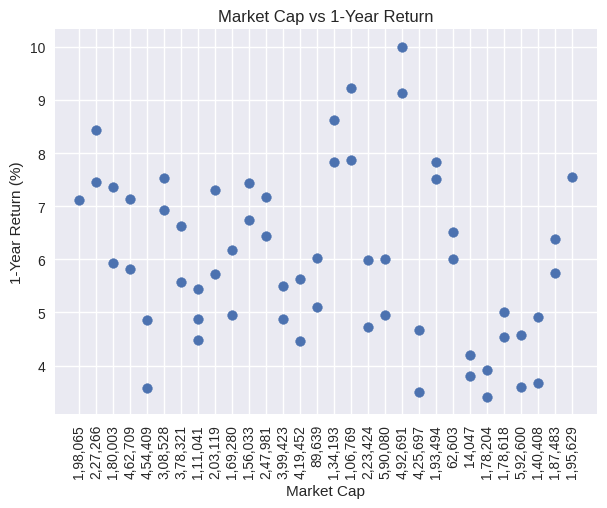

In [ ]:
# Scatter: Market Cap vs 1-Year Return
plt.figure(figsize=(7,5))
plt.scatter(df["Market Cap"], df["ret_1y"])
plt.xlabel("Market Cap")
plt.ylabel("1-Year Return (%)")
plt.title("Market Cap vs 1-Year Return")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Multivariate Analysis
In this section, we extend our analysis to multiple dimensions simultaneously to uncover hidden structures within Conservative Hybrid Funds.

By integrating risk, return, and portfolio metrics together, we aim to classify funds into distinct groups and identify underlying factors driving performance.



In [ ]:
#  LOAD DATA
df = pd.read_csv("analytics_cleaned.csv")
df.replace(['-', ''], np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
# RETURN COLUMNS (ONLY the ones you want)
return_cols = [
    "1 Wk Ret (%)",
    "1 Mth Ret (%)",
    "3 Mth Ret (%)",
    "6 Mth Ret (%)",
    "ret_1y.1",
    "ret_3y",
    "ret_5y",
    "ret_10y",
    "3 Yr SIP Ret (%)",
    "5 Yr SIP Ret (%)",
    "10 Yr SIP Ret (%)"
]

# Keep only columns that actually exist in dataset
return_cols = [col for col in return_cols if col in df.columns]

# RISK METRICS
risk_cols = [
    "Standard Deviation",
    "Sharpe Ratio",
    "Sortino Ratio",
    "Beta",
    "Alpha",
    "Information Ratio",
    "R-Squared"
]

risk_cols = [col for col in risk_cols if col in df.columns]


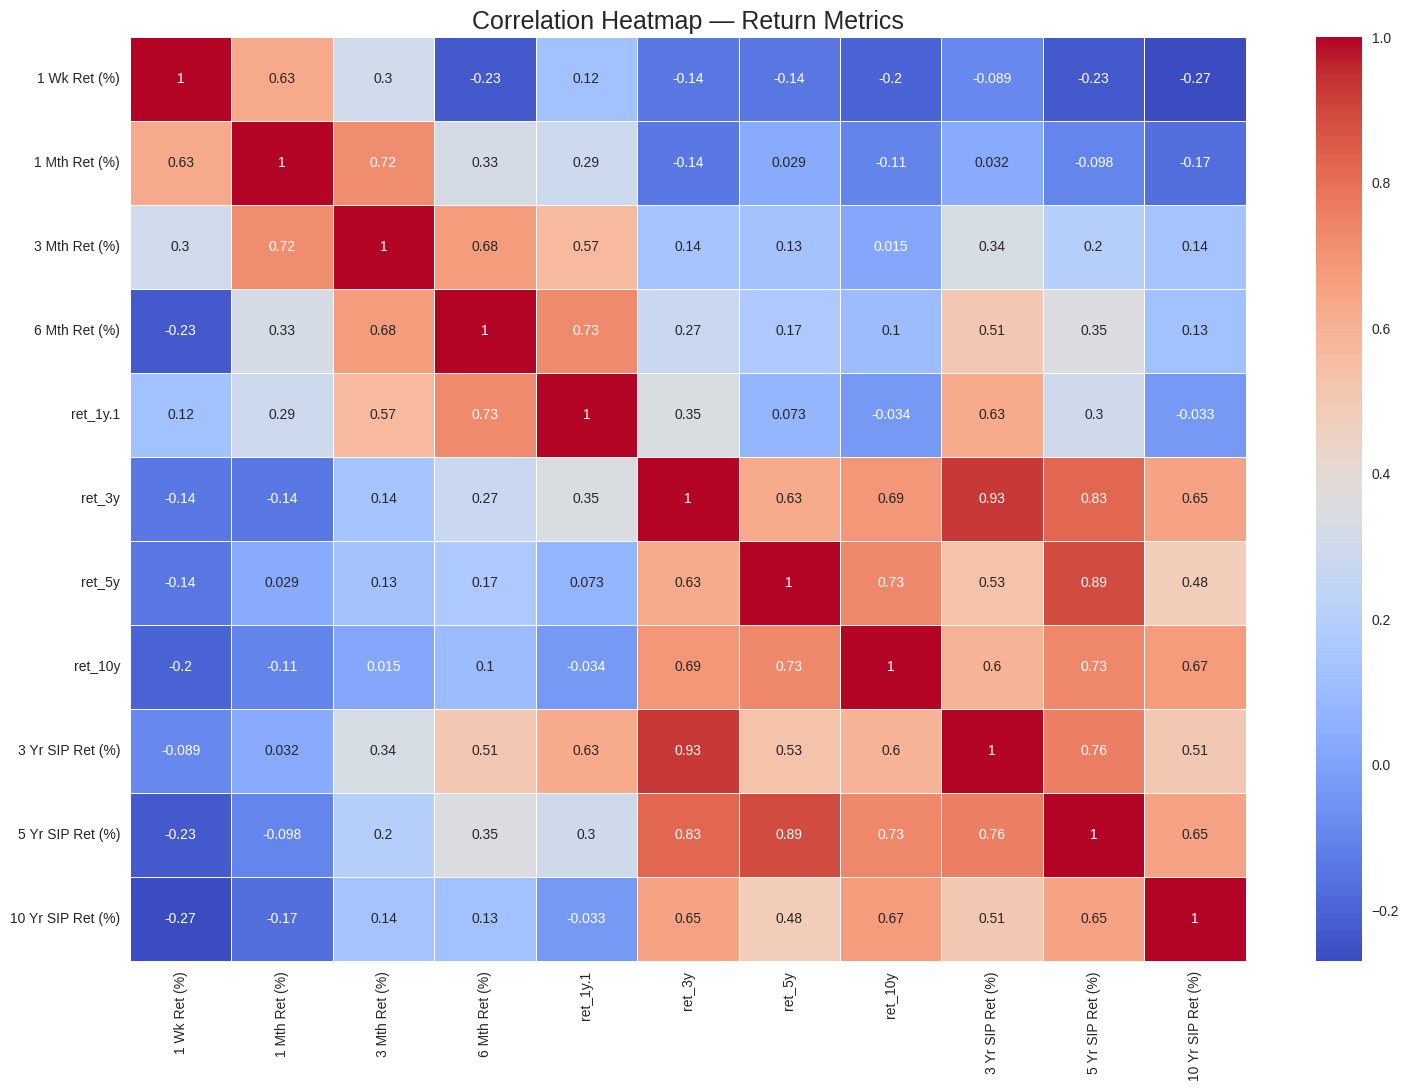

In [ ]:
#  HEATMAP FUNCTION
def plot_heatmap(data, title, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    sns.heatmap(
        data.corr(),
        cmap="coolwarm",
        annot=True,
        linewidths=0.5
    )
    plt.title(title, fontsize=18)
    plt.show()

#  HEATMAP 1 — RETURNS ONLY
if return_cols:
    return_df = df[return_cols].apply(pd.to_numeric, errors='coerce')
    plot_heatmap(return_df, "Correlation Heatmap — Return Metrics")



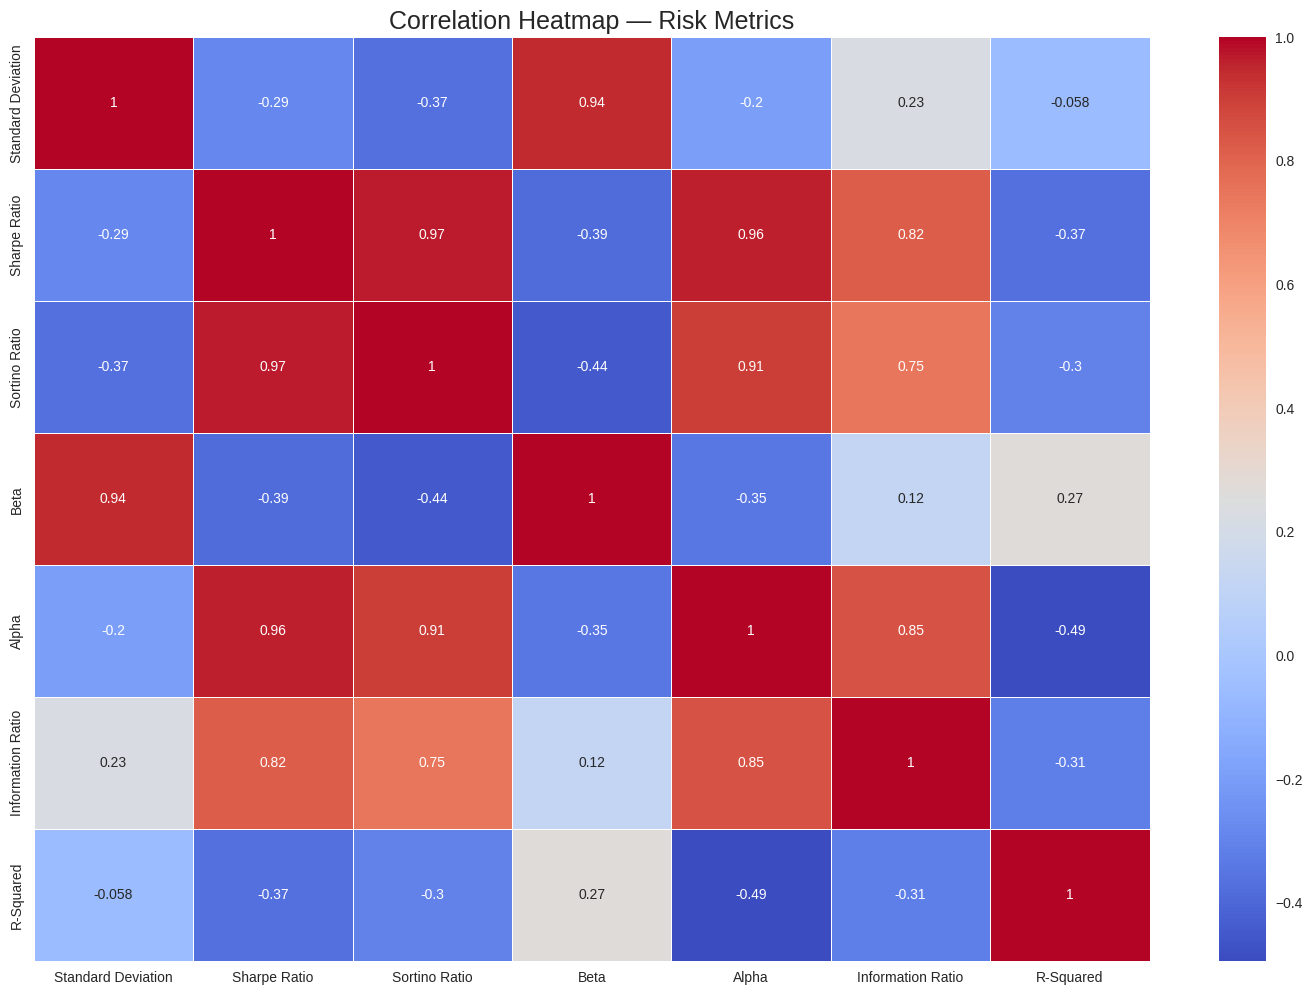

In [ ]:
#  HEATMAP 2 — RISK METRICS ONLY
if risk_cols:
    risk_df = df[risk_cols].apply(pd.to_numeric, errors='coerce')
    plot_heatmap(risk_df, "Correlation Heatmap — Risk Metrics")



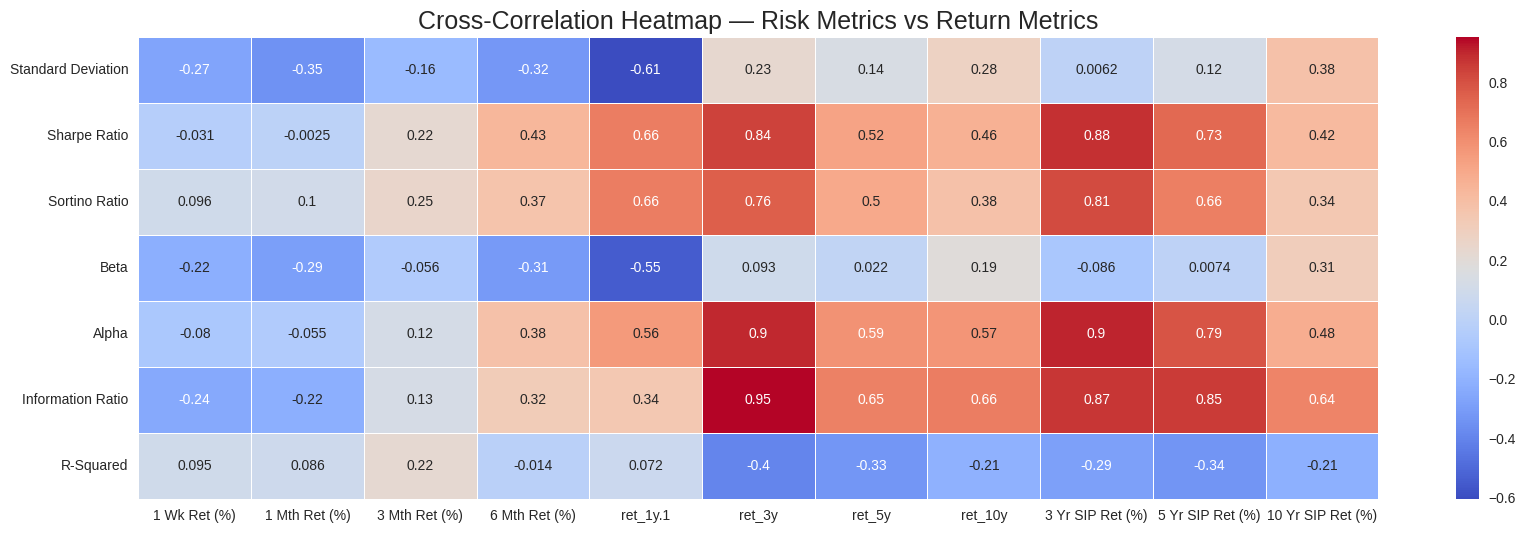

In [ ]:
#  HEATMAP 3 — Risk vs Returns (Cross-Correlation)
if return_cols and risk_cols:
    cross_df = df[return_cols + risk_cols].apply(pd.to_numeric, errors='coerce')

    # Extract only cross section (risk rows × return columns)
    cross_matrix = cross_df.corr().loc[risk_cols, return_cols]

    plt.figure(figsize=(20, 6))
    sns.heatmap(
        cross_matrix,
        cmap="coolwarm",
        annot=True,
        linewidths=0.5
    )
    plt.title("Cross-Correlation Heatmap — Risk Metrics vs Return Metrics", fontsize=18)
    plt.show()

## 5-yr return Vs Standerd Deviation (Bubble Plot)

1. Riskometer as Color
2. Fund Manager Tenure as Color
3. Plan Type (Direct / Regular) as Color


In [ ]:
# CLEAN AUM
if "AUM(Cr)" in df.columns:
    df["AUM_clean"] = pd.to_numeric(df["AUM(Cr)"], errors="coerce")
else:
    raise ValueError("AUM(Cr) column not found. Check dataset.")

# FUNCTION TO EXTRACT MAX TENURE
def extract_max_tenure(entry):
    if pd.isna(entry):
        return np.nan

    numbers = re.findall(r"\(([\d\.]+)\)", str(entry))
    if not numbers:
        return np.nan
    numbers = [float(x) for x in numbers]
    return max(numbers)

# Apply
if "Fund Manager (Tenure)" in df.columns:
    df["max_tenure"] = df["Fund Manager (Tenure)"].apply(extract_max_tenure)

# CHECK REQUIRED COLUMNS
required_cols = ["Standard Deviation", "ret_5y", "AUM_clean"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Required column missing: {col}")

In [ ]:
# BUBBLE PLOT FUNCTION
def bubble_plot(x, y, size, color, title):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=color,
        size=size,
        sizes=(40, 800),
        alpha=0.7,
        palette="viridis"
    )
    plt.title(title, fontsize=18)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()




###  Riskometer as Color

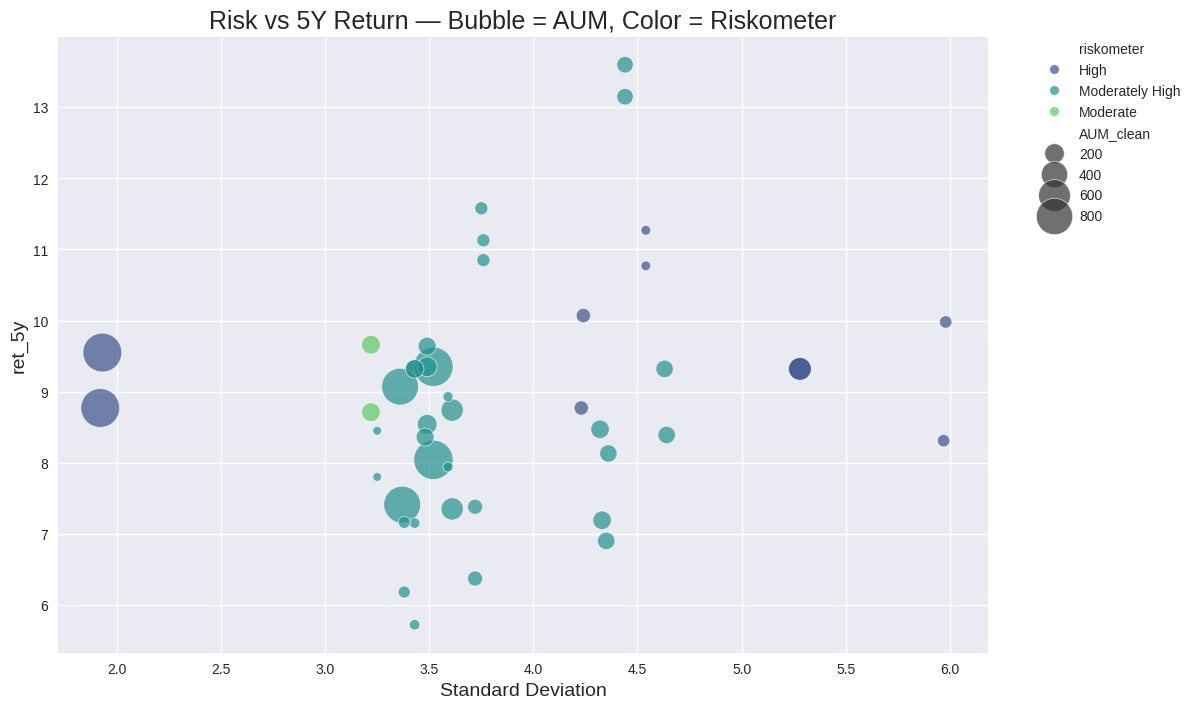

In [ ]:
#  A — Riskometer as Color
if "riskometer" in df.columns:
    bubble_plot(
        x="Standard Deviation",
        y="ret_5y",
        size="AUM_clean",
        color="riskometer",
        title="Risk vs 5Y Return — Bubble = AUM, Color = Riskometer"
    )
else:
    print("Riskometer column not available.")

###  Fund Manager Tenure as Color

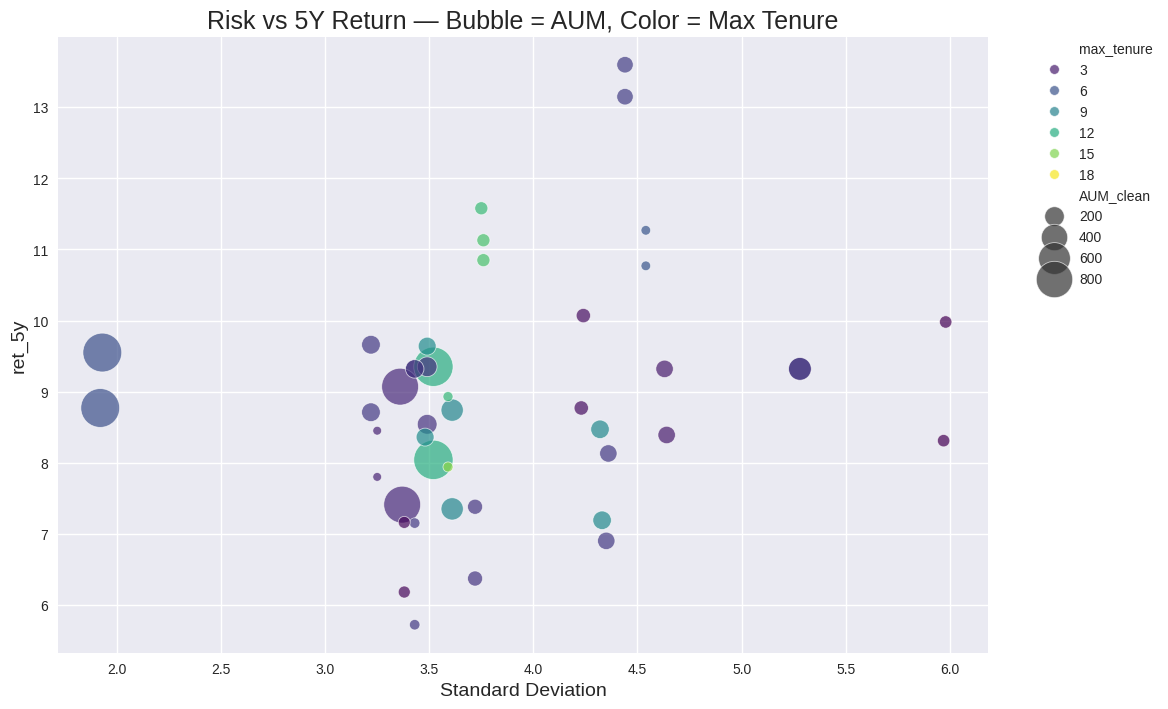

In [ ]:
if "max_tenure" in df.columns:
    bubble_plot(
        x="Standard Deviation",
        y="ret_5y",
        size="AUM_clean",
        color="max_tenure",
        title="Risk vs 5Y Return — Bubble = AUM, Color = Max Tenure"
    )
else:
    print("Fund Manager Tenure column not available.")

### Plan Type (Direct / Regular) as **Color**

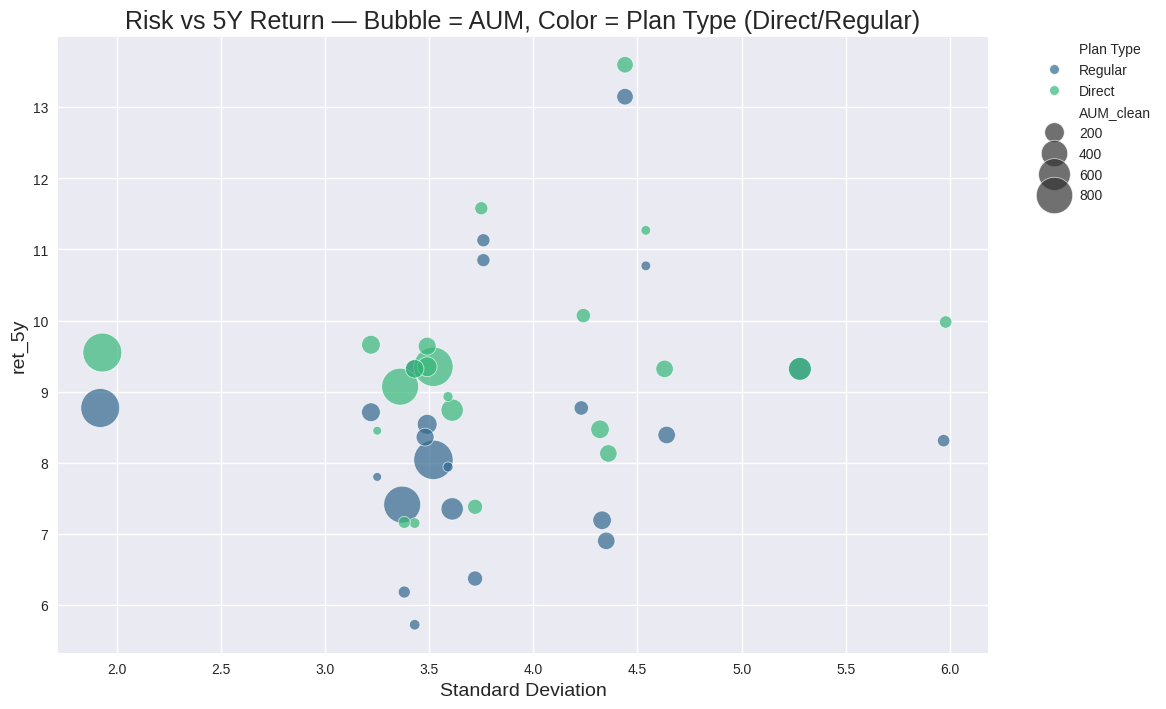

In [ ]:
if "Plan Type" in df.columns:
    bubble_plot(
        x="Standard Deviation",
        y="ret_5y",
        size="AUM_clean",
        color="Plan Type",
        title="Risk vs 5Y Return — Bubble = AUM, Color = Plan Type (Direct/Regular)"
    )
else:
    print("Plan Type column not available.")

## PCA on Return Metrics (with Scree Plot + PCA Scatter Plot)


In [ ]:
# SELECT RETURN COLUMNS
return_cols = [
    "1 Wk Ret (%)",
    "1 Mth Ret (%)",
    "3 Mth Ret (%)",
    "6 Mth Ret (%)",
    "ret_1y.1",
    "ret_3y",
    "ret_5y",
    "ret_10y",
    "3 Yr SIP Ret (%)",
    "5 Yr SIP Ret (%)",
    "10 Yr SIP Ret (%)"
]

return_cols = [c for c in return_cols if c in df.columns]

returns_df = df[return_cols].apply(pd.to_numeric, errors='coerce').dropna()


In [ ]:
# STANDARDIZE
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns_df)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_returns)
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])

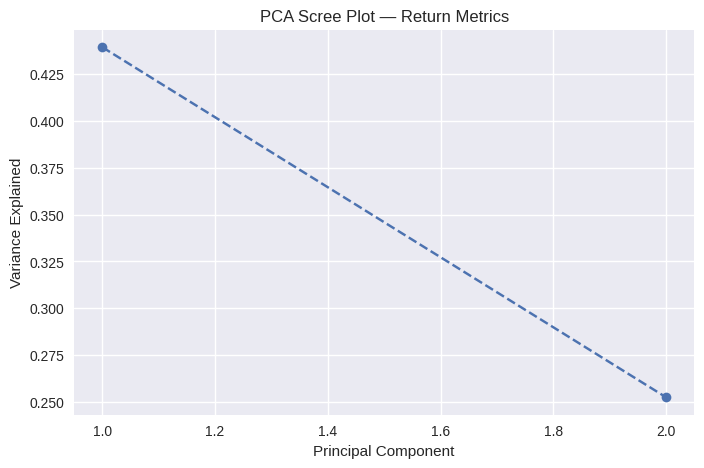

In [ ]:
# SCREE PLOT
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, 3),
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='--'
)
plt.title("PCA Scree Plot — Return Metrics")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


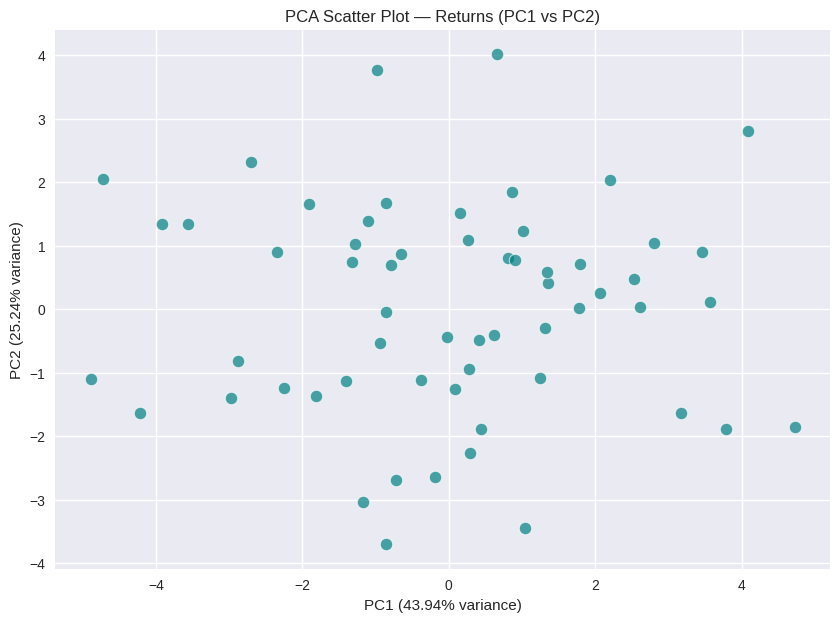

In [ ]:
# PCA SCATTER PLOT
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], s=80, alpha=0.7, color="teal")

plt.title("PCA Scatter Plot — Returns (PC1 vs PC2)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.grid(True)
plt.show()

The analysis proves that performance is structural, not random. A single dominant trend drives a fund's returns across all time horizons, with only minor deviations represented by the second component.

## Clustermap on Return Metrics

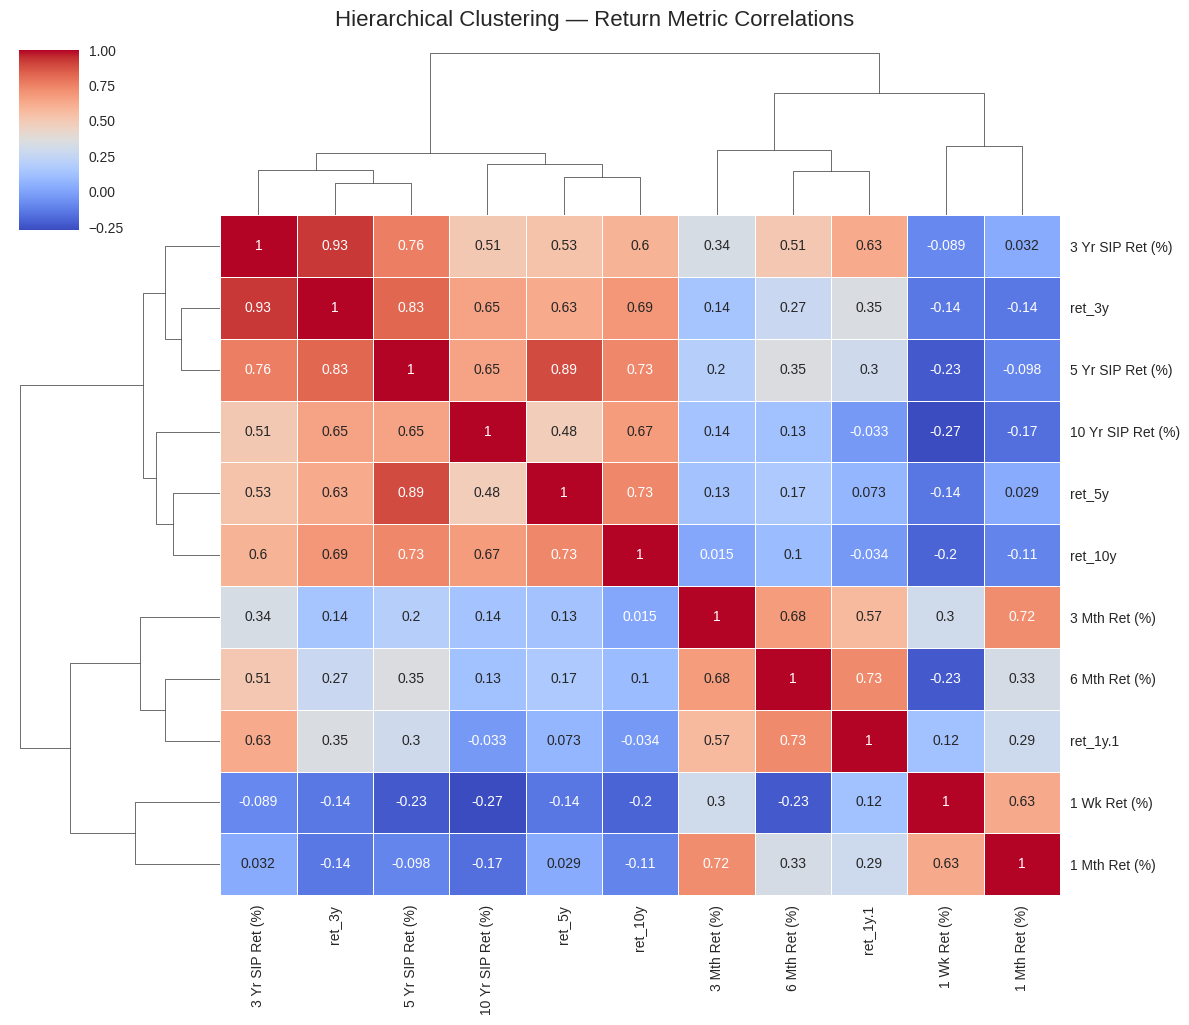

In [ ]:
# CLUSTERMAP (Hierarchical Clustering)
sns.clustermap(
    returns_df.corr(),
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,
    figsize=(12, 10)
)

plt.suptitle("Hierarchical Clustering — Return Metric Correlations", y=1.02, fontsize=16)
plt.show()

## Ternary plot (Equity / Debt / Cash)

In [ ]:
# ---------- Load ----------
df = pd.read_csv("p_assests_cleaned.csv")
df.replace(['-', ''], np.nan, inplace=True)

# ---------- Convert percentage columns ----------
pct_cols = ["equity_holding", "debt_holding", "cash_holding"]

for col in pct_cols:
    # strip % sign and convert to float
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# ---------- Keep only rows with at least 1 valid allocation ----------
df_alloc = df.dropna(subset=pct_cols, how="all").copy()

# Replace remaining NaNs with 0
df_alloc[pct_cols] = df_alloc[pct_cols].fillna(0)

# ---------- Normalize (convert to fractions that add to 1) ----------
def normalize(a, b, c):
    s = a + b + c
    if s == 0:
        return np.array([np.nan, np.nan, np.nan])
    return np.array([a/s, b/s, c/s])

norm_data = np.array([
    normalize(row["equity_holding"], row["debt_holding"], row["cash_holding"])
    for _, row in df_alloc.iterrows()
])

In [ ]:
# Filter valid rows
valid_mask = ~np.isnan(norm_data).any(axis=1)
df_alloc = df_alloc[valid_mask].copy()
norm_data = norm_data[valid_mask]

df_alloc["t_equity"], df_alloc["t_debt"], df_alloc["t_cash"] = \
    norm_data[:,0], norm_data[:,1], norm_data[:,2]

In [ ]:
# ---------- Ternary coordinate conversion ----------
sqrt3_over2 = math.sqrt(3) / 2
V_eq = np.array([0,0])              # Equity
V_de = np.array([1,0])              # Debt
V_ca = np.array([0.5, sqrt3_over2]) # Cash

def bary_to_cart(a, b, c):
    return a*V_eq + b*V_de + c*V_ca

coords = np.array([
    bary_to_cart(a,b,c)
    for a,b,c in zip(df_alloc["t_equity"], df_alloc["t_debt"], df_alloc["t_cash"])
])

df_alloc["x"] = coords[:,0]
df_alloc["y"] = coords[:,1]

In [ ]:
def bary_to_cart(a, b, c):
    return a*V_eq + b*V_de + c*V_ca

coords = np.array([
    bary_to_cart(a,b,c)
    for a,b,c in zip(df_alloc["t_equity"], df_alloc["t_debt"], df_alloc["t_cash"])
])

df_alloc["x"] = coords[:,0]
df_alloc["y"] = coords[:,1]

# ---------- Color and size ----------
# Color by CRISIL
if "crisil_rating" in df_alloc.columns:
    colors = pd.to_numeric(df_alloc["crisil_rating"], errors='coerce')
else:
    colors = df_alloc["t_equity"]

# Size by #stocks
if "no_of_stocks_in_portfolio" in df_alloc.columns:
    stocks = pd.to_numeric(df_alloc["no_of_stocks_in_portfolio"], errors='coerce').fillna(0)
    sizes = 40 + (stocks - stocks.min()) / (stocks.max() - stocks.min() + 1e-9) * 300
else:
    sizes = 80


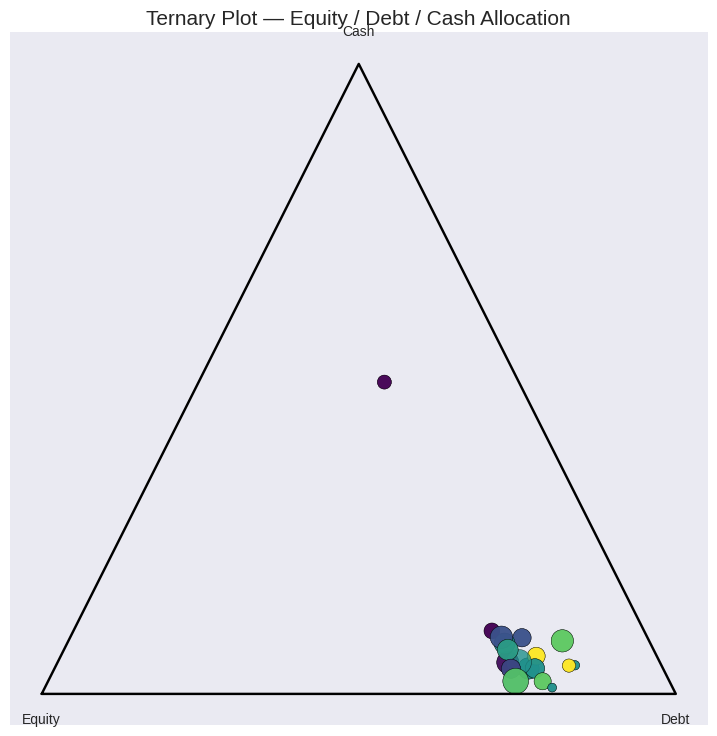

In [ ]:
# ---------- PLOT ----------
plt.figure(figsize=(9,9))

# Triangle
plt.plot([0,1,0.5,0], [0,0,sqrt3_over2,0], color='black')

# Labels on corners
plt.text(0, -0.04, "Equity", ha='center')
plt.text(1, -0.04, "Debt", ha='center')
plt.text(0.5, sqrt3_over2+0.04, "Cash", ha='center')

# Points
plt.scatter(
    df_alloc["x"], df_alloc["y"],
    c=colors, cmap="viridis",
    s=sizes,
    alpha=0.8, edgecolors='k'
)

plt.xticks([]); plt.yticks([])
plt.title("Ternary Plot — Equity / Debt / Cash Allocation", fontsize=15)
plt.show()

**What it Shows:**
* **Position:** Portfolio Allocation (Equity / Debt / Cash)
* **Color:** CRISIL Rating
* **Size:** Number of Stocks

###PCA on portfolio composition (Equity, Debt, Cash, stocks, debt_holdings)

PCA Mapping: Allocation + Diversification Patterns in CHF Schemes

In [ ]:
# LOAD DATA
df = pd.read_csv("p_assests_cleaned.csv")

# CONVERT % COLUMNS
pct_cols = ["equity_holding", "debt_holding", "cash_holding"]

for col in pct_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)


In [ ]:
# NORMALIZE ALLOCATION (sum to 1)
def normalize(a, b, c):
    s = a + b + c
    if s == 0:
        return [0, 0, 0]
    return [a/s, b/s, c/s]

norm = np.array([
    normalize(row["equity_holding"], row["debt_holding"], row["cash_holding"])
    for _, row in df.iterrows()
])

df["norm_equity"] = norm[:,0]
df["norm_debt"]   = norm[:,1]
df["norm_cash"]   = norm[:,2]

# CONVERT HOLDINGS COUNT
df["no_of_stocks_in_portfolio"] = df["no_of_stocks_in_portfolio"].astype(float)
df["no_of_debt_holdings"]       = df["no_of_debt_holdings"].astype(float)

In [ ]:
# SELECT FEATURES FOR PCA
feat_cols = [
    "norm_equity",
    "norm_debt",
    "norm_cash",
    "no_of_stocks_in_portfolio",
    "no_of_debt_holdings"
]

pca_df = df[feat_cols]

# STANDARDIZE
scaler = StandardScaler()
scaled = scaler.fit_transform(pca_df)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])

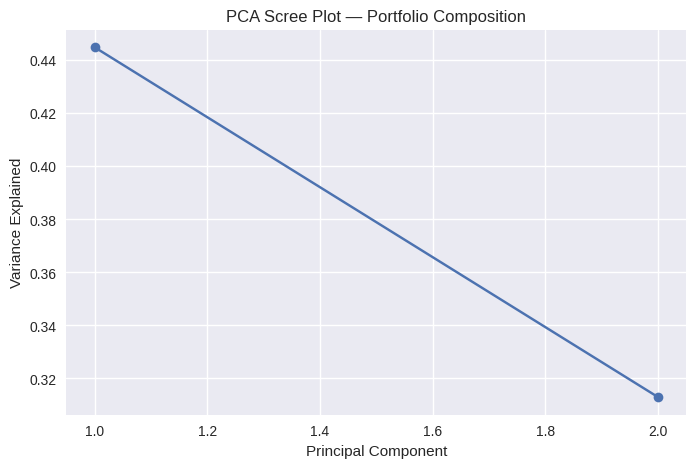

In [ ]:
# SCREE PLOT
plt.figure(figsize=(8,5))
plt.plot(range(1, 3), pca.explained_variance_ratio_, marker='o')
plt.title("PCA Scree Plot — Portfolio Composition")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


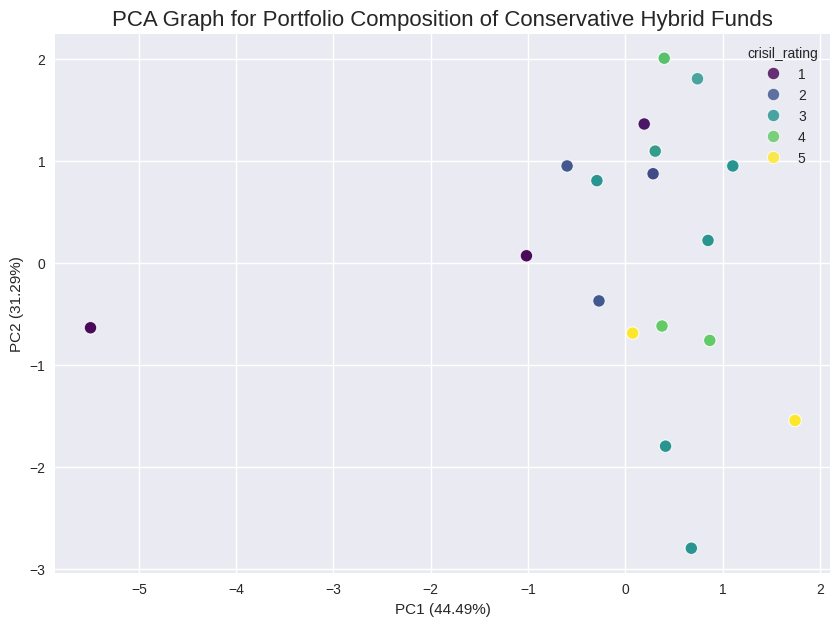

In [ ]:
# PCA SCATTER PLOT
plt.figure(figsize=(10,7))

# Color by CRISIL rating
if "crisil_rating" in df.columns:
    colors = pd.to_numeric(df["crisil_rating"], errors='coerce')
else:
    colors = df["norm_equity"]

sns.scatterplot(
    x=df_pca["PC1"],
    y=df_pca["PC2"],
    hue=colors,
    palette="viridis",
    s=80,
    alpha=0.8
)

plt.title("PCA Graph for Portfolio Composition of Conservative Hybrid Funds", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid(True)
plt.show()


**What it Shows:**
* **PC1 (44%):** Captures the **Equity vs. Debt balance**. Funds separate based on their asset mix.
* **PC2 (31%):** Reflects **diversification** (number of stock/debt holdings) and cash levels.

PCA confirms that while Conservative Hybrid Funds share a core profile, they differ significantly in asset balance and diversification depth.

## Hierarchical Clustering

In [ ]:
for col in pct_cols:
    df[col] = df[col].astype(str).str.replace("%","", regex=True).astype(float)

feat_cols = [
    "equity_holding",
    "debt_holding",
    "cash_holding",
    "no_of_stocks_in_portfolio",
    "no_of_debt_holdings"
]

# Drop NaNs just in case
df = df.dropna(subset=feat_cols).reset_index(drop=True)
X = df[feat_cols]

# -------- SCALE FEATURES --------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

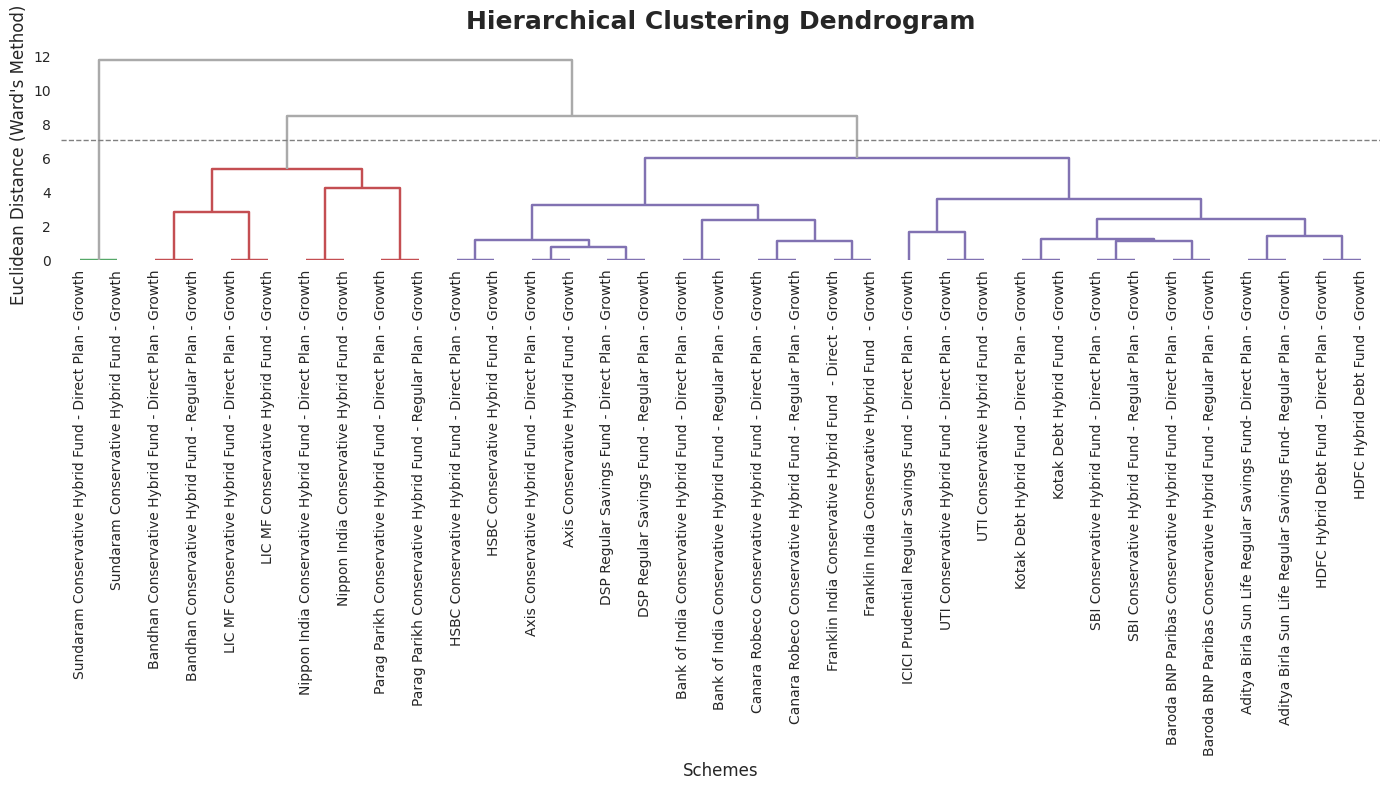

In [ ]:

# -------- HIERARCHICAL CLUSTERING --------
# "Ward" method minimizes variance within clusters
Z = linkage(X_scaled, method="ward")

# -------- PLOT 1: IMPROVED DENDROGRAM --------
sns.set_style("white")
plt.figure(figsize=(14, 8))

# Calculate a threshold to color the clusters (default is usually 70% of max distance)
color_thresh = np.max(Z[:, 2]) * 0.6

dendrogram(
    Z,
    labels=df["scheme_name"].values,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_thresh,
    above_threshold_color='#AAAAAA'  # Grey for the top-level links
)

plt.axhline(y=color_thresh, c='grey', lw=1, linestyle='--')
plt.title("Hierarchical Clustering Dendrogram", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Schemes", fontsize=12)
plt.ylabel("Euclidean Distance (Ward's Method)", fontsize=12)
plt.tight_layout()
plt.show()

# -------- ASSIGN CLUSTERS --------
# Cut the tree into k clusters (e.g., 4)
k = 4
df["cluster"] = fcluster(Z, t=k, criterion='maxclust')

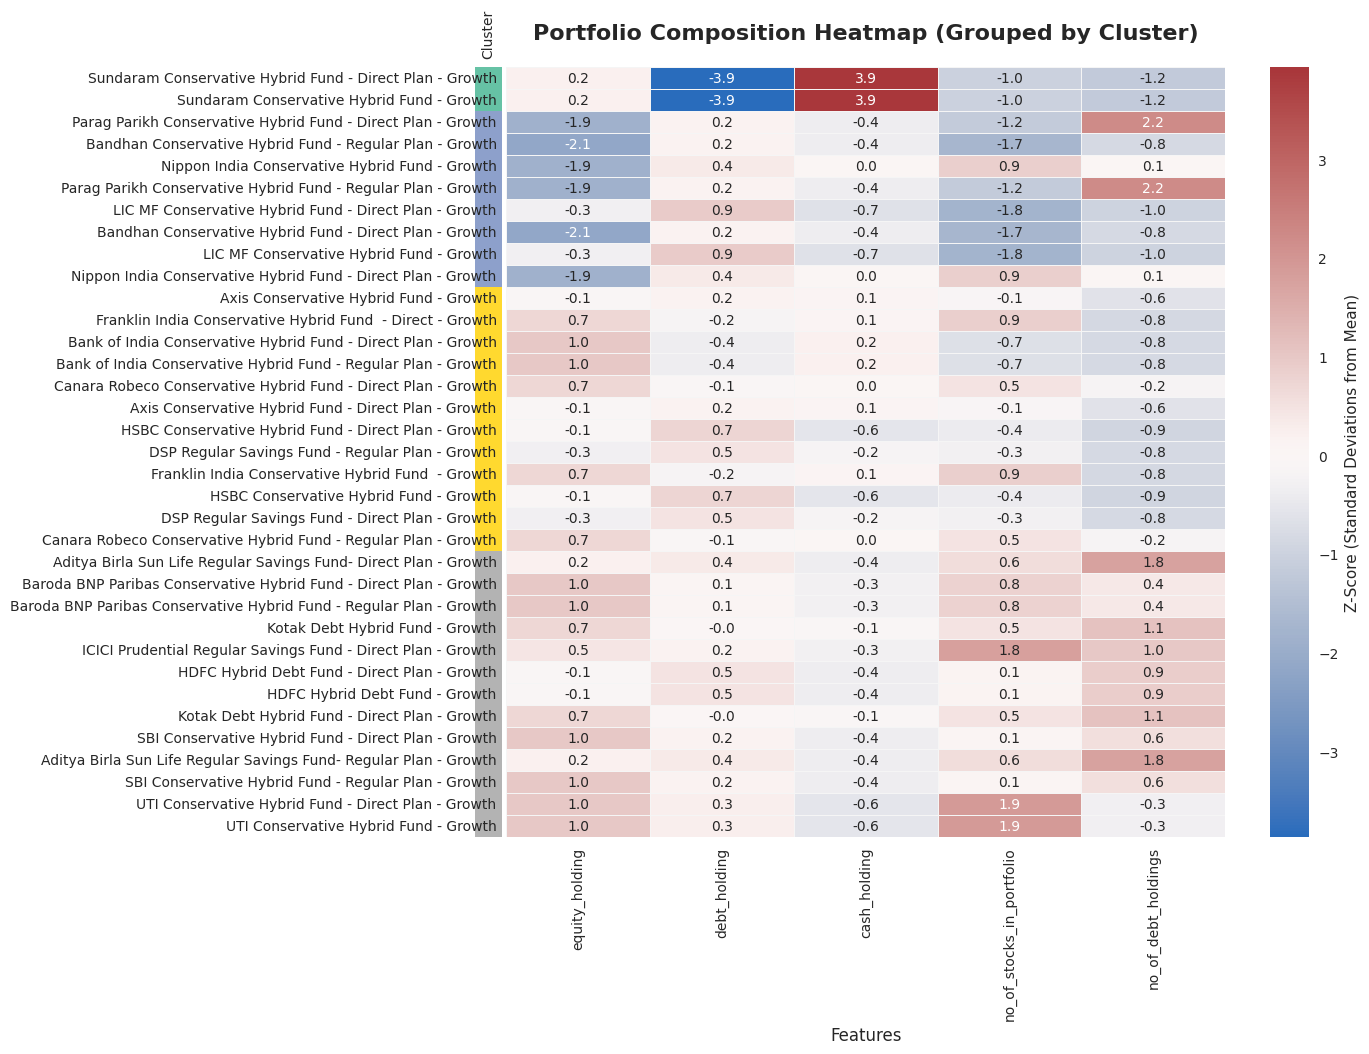

In [ ]:
# -------- PLOT 2: IMPROVED HEATMAP --------
# Prepare data: Use scaled values for the heatmap so patterns are visible
# (Raw values hide patterns because ranges differ too much)
heatmap_df = pd.DataFrame(X_scaled, columns=feat_cols)
heatmap_df["cluster"] = df["cluster"]
heatmap_df["scheme_name"] = df["scheme_name"]

# Sort by cluster to group similar funds
heatmap_df = heatmap_df.sort_values("cluster")
plot_data = heatmap_df.drop(columns=["cluster", "scheme_name"])
scheme_labels = heatmap_df["scheme_name"]
cluster_labels = heatmap_df["cluster"]

# Create figure with a side-bar for cluster ID
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.03, 1], wspace=0.01)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# 1. Cluster Side Bar
sns.heatmap(
    cluster_labels.values.reshape(-1, 1),
    ax=ax0,
    cmap="Set2",
    cbar=False,
    xticklabels=False,
    yticklabels=False
)
ax0.set_title("Cluster", fontsize=10, rotation=90, va='bottom')

# 2. Main Heatmap (Z-Scores)
# Red = Above Average, Blue = Below Average
sns.heatmap(
    plot_data,
    ax=ax1,
    cmap="vlag",   # Diverging palette (Blue-White-Red)
    center=0,      # Center at 0 (mean)
    annot=True,    # Show values
    fmt=".1f",
    linewidths=0.5,
    linecolor='whitesmoke',
    yticklabels=scheme_labels,
    cbar_kws={'label': 'Z-Score (Standard Deviations from Mean)'}
)

ax1.set_title("Portfolio Composition Heatmap (Grouped by Cluster)", fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel("Features", fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


When selecting a Conservative Hybrid Fund, you are choosing between three distinct styles:
1.  **Safety First:** Concentrated, debt-heavy portfolios (Cluster A).
2.  **Growth First:** Diversified, equity-heavy portfolios (Cluster B).
3.  **Tactical:** High-cash portfolios waiting for opportunities (Cluster C).

## Heatmap: Portfolio Composition Analysis

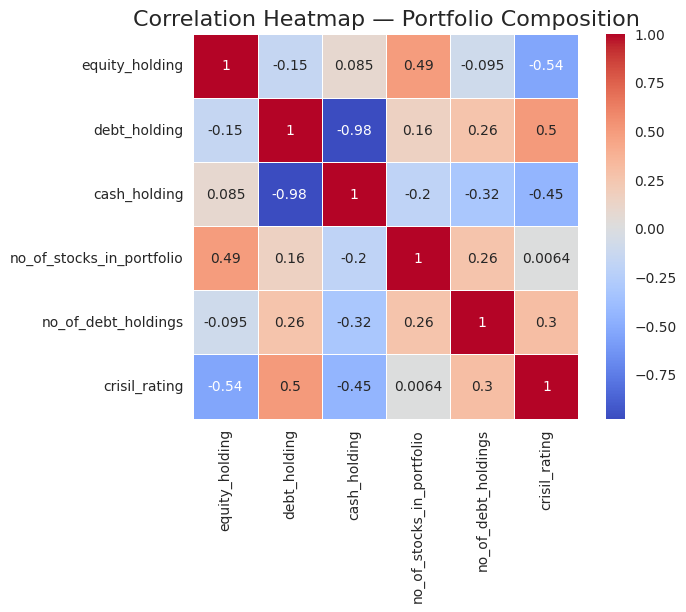

In [ ]:
# -------- SELECT FEATURES --------
heat_cols = [
    "equity_holding",
    "debt_holding",
    "cash_holding",
    "no_of_stocks_in_portfolio",
    "no_of_debt_holdings",
    "crisil_rating"
]

heat_df = df[heat_cols]

# -------- CORRELATION HEATMAP --------
plt.figure(figsize=(7,5))
sns.heatmap(
    heat_df.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap — Portfolio Composition", fontsize=16)
plt.show()

# Feature Engineering :

In this step, we performed feature engineering on the portfolio-level dataset to better capture the risk profile and diversification characteristics of each conservative hybrid fund scheme.



## Feature Extraction

In [ ]:
# LOAD DATA
df = pd.read_csv("p_assests_cleaned.csv")

print("Shape before FE:", df.shape)
print("Columns:", df.columns.tolist())

Shape before FE: (35, 9)
Columns: ['scheme_name', 'plan', 'category_name', 'crisil_rating', 'equity_holding', 'no_of_stocks_in_portfolio', 'debt_holding', 'no_of_debt_holdings', 'cash_holding']


In [ ]:
# CONVERT RELEVANT COLUMNS TO NUMERIC
num_cols = [
    "equity_holding",
    "debt_holding",
    "cash_holding",
    "no_of_stocks_in_portfolio",
    "no_of_debt_holdings"
]

for col in num_cols:
    # Convert to string, clean %, commas, spaces
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    # Convert to numeric (non-convertible -> NaN)
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("\nNumeric columns after conversion:")
print(df[num_cols].dtypes)


Numeric columns after conversion:
equity_holding               int64
debt_holding                 int64
cash_holding                 int64
no_of_stocks_in_portfolio    int64
no_of_debt_holdings          int64
dtype: object


In [ ]:
# Portfolio Mix Ratios
# Guard against division by 0 using replace(0, small_number)
df["Equity_Debt_Ratio"] = df["equity_holding"] / df["debt_holding"].replace(0, 0.0001)
df["Equity_Cash_Ratio"] = df["equity_holding"] / df["cash_holding"].replace(0, 0.0001)
df["Debt_Cash_Ratio"]   = df["debt_holding"]   / df["cash_holding"].replace(0, 0.0001)

# Total number of holdings
df["Total_Holdings"] = df["no_of_stocks_in_portfolio"] + df["no_of_debt_holdings"]

# Diversification Score (0–1 normalized)
min_h = df["Total_Holdings"].min()
max_h = df["Total_Holdings"].max()

if max_h != min_h:
    df["Diversification_Score"] = (df["Total_Holdings"] - min_h) / (max_h - min_h)
else:
    # All funds have same number of holdings → set score to 0.5 (neutral)
    df["Diversification_Score"] = 0.5

In [ ]:
# Portfolio Concentration Category based on equity %
def concentration(equity):
    if pd.isna(equity):
        return "Unknown"
    if equity >= 65:
        return "High Concentration"
    elif equity >= 40:
        return "Medium Concentration"
    else:
        return "Low Concentration"

df["Portfolio_Concentration"] = df["equity_holding"].apply(concentration)

In [ ]:
# SAVE RESULT AS A SEPARATE FILE


output_file = "p_assests_FE.csv"
df.to_csv(output_file, index=False)
print(f"\nFeature-engineered file saved as: {output_file}")
print("Shape after FE:", df.shape)

# Optional: quick preview
df.head()


Feature-engineered file saved as: p_assests_FE.csv
Shape after FE: (35, 15)


scheme_name         plan  \
0  Aditya Birla Sun Life Regular Savings Fund- Di...  Direct Plan   
1  Aditya Birla Sun Life Regular Savings Fund- Re...      Regular   
2  Axis Conservative Hybrid Fund - Direct Plan - ...  Direct Plan   
3             Axis Conservative Hybrid Fund - Growth      Regular   
4  Bandhan Conservative Hybrid Fund - Direct Plan...  Direct Plan   

              category_name  crisil_rating  equity_holding  \
0  Conservative Hybrid Fund              3              21   
1  Conservative Hybrid Fund              3              21   
2  Conservative Hybrid Fund              2              20   
3  Conservative Hybrid Fund              2              20   
4  Conservative Hybrid Fund              3              12   

   no_of_stocks_in_portfolio  debt_holding  no_of_debt_holdings  cash_holding  \
0                         44            74                   96             4   
1                         44            74                   96             4   
2                         33            72                   20             9   
3                         33            72                   20             9   
4                         10            72                   14             4   

   Equity_Debt_Ratio  Equity_Cash_Ratio  Debt_Cash_Ratio  Total_Holdings  \
0           0.283784           5.250000             18.5             140   
1           0.283784           5.250000             18.5             140   
2           0.277778           2.222222              8.0              53   
3           0.277778           2.222222              8.0              53   
4           0.166667           3.000000             18.0              24   

   Diversification_Score Portfolio_Concentration  
0               1.000000       Low Concentration  
1               1.000000       Low Concentration  
2               0.286885       Low Concentration  
3               0.286885       Low Concentration  
4               0.049180       Low Concentration

The feature-engineered dataset is saved separately as p_assests_FE.csv and is used later in the analysis without merging into other files, in line with our project design.

### Performance & Risk Data
We derived several new features from the fund’s return and risk metrics to better understand long-term performance and stability.

#### Engineered Features
- **Avg_LongTerm_Return**  
- **Std_LongTerm_Return**  
- **Return_Stability**  
- **Gap_1Y_5Y**, **Gap_1Y_3Y**  
- **Risk_Adjusted_1Y**  
- **Sharpe_Adjusted_3Y**  
- **Performance_Score**  

These features help evaluate performance consistency, risk-adjusted efficiency, and long-term trends.  
The final engineered dataset is saved as **`analytics_FE.csv`**.


In [ ]:
# Load Data
final_df = pd.read_csv("analytics_cleaned.csv")

# Your return columns
return_cols = [c for c in ["ret_1y", "ret_3y", "ret_5y", "ret_10y"] if c in final_df.columns]

# Risk columns (these names already exist in your list)
risk_cols = [
    c for c in [
        "Standard Deviation",
        "Sharpe Ratio",
        "Sortino Ratio",
        "Beta",
        "Alpha",
        "Information Ratio"
    ]
    if c in final_df.columns
]

print("Return columns used:", return_cols)
print("Risk columns used:", risk_cols)

# Clean them to numeric
for col in return_cols + risk_cols:
    final_df[col] = (
        final_df[col]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    final_df[col] = pd.to_numeric(final_df[col], errors="coerce")

Return columns used: ['ret_1y', 'ret_3y', 'ret_5y', 'ret_10y']
Risk columns used: ['Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio', 'Beta', 'Alpha', 'Information Ratio']


In [ ]:
# Average and std of long-term returns (3y, 5y, 10y)
lt_cols = [c for c in ["ret_3y", "ret_5y", "ret_10y"] if c in final_df.columns]
print("Long-term columns used:", lt_cols)

if lt_cols:
    final_df["Avg_LongTerm_Return"] = final_df[lt_cols].mean(axis=1)
    final_df["Std_LongTerm_Return"] = final_df[lt_cols].std(axis=1)
    final_df["Return_Stability"] = (
        final_df["Avg_LongTerm_Return"] - final_df["Std_LongTerm_Return"]
    )
else:
    final_df["Avg_LongTerm_Return"] = np.nan
    final_df["Std_LongTerm_Return"] = np.nan
    final_df["Return_Stability"] = np.nan


Long-term columns used: ['ret_3y', 'ret_5y', 'ret_10y']


In [ ]:
# Gaps between 1Y and 3Y/5Y if available
if ("ret_1y" in final_df.columns) and ("ret_5y" in final_df.columns):
    final_df["Gap_1Y_5Y"] = final_df["ret_1y"] - final_df["ret_5y"]

if ("ret_1y" in final_df.columns) and ("ret_3y" in final_df.columns):
    final_df["Gap_1Y_3Y"] = final_df["ret_1y"] - final_df["ret_3y"]

# Risk-adjusted 1-year return
if ("ret_1y" in final_df.columns) and ("Standard Deviation" in final_df.columns):
    final_df["Risk_Adjusted_1Y"] = final_df["ret_1y"] / final_df["Standard Deviation"]

# Sharpe-adjusted 3-year return
if ("ret_3y" in final_df.columns) and ("Sharpe Ratio" in final_df.columns):
    final_df["Sharpe_Adjusted_3Y"] = final_df["ret_3y"] * final_df["Sharpe Ratio"]

In [ ]:
# Performance Score: combine long-term return + Sharpe
score_parts = []

if "ret_3y" in final_df.columns:
    score_parts.append("ret_3y")
elif "ret_5y" in final_df.columns:
    score_parts.append("ret_5y")

if "Sharpe Ratio" in final_df.columns:
    score_parts.append("Sharpe Ratio")

if score_parts:
    for col in score_parts:
        col_norm = col + "_norm"
        col_min = final_df[col].min()
        col_max = final_df[col].max()
        if col_max != col_min:
            final_df[col_norm] = (final_df[col] - col_min) / (col_max - col_min)
        else:
            final_df[col_norm] = 0.5
    norm_cols = [c for c in final_df.columns if c.endswith("_norm")]
    final_df["Performance_Score"] = final_df[norm_cols].sum(axis=1)
else:
    final_df["Performance_Score"] = np.nan

### FEATURE ENGENEERING ON SIP

In [ ]:
# Identify SIP columns actually present
sip_cols = [c for c in [
    "3 Yr SIP Ret (%)",
    "5 Yr SIP Ret (%)",
    "10 Yr SIP Ret (%)"
] if c in final_df.columns]

print("SIP columns used:", sip_cols)

# Clean SIP columns (remove %, commas, text)
for col in sip_cols:
    final_df[col] = (
        final_df[col]
        .astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    final_df[col] = pd.to_numeric(final_df[col], errors="coerce")

SIP columns used: ['3 Yr SIP Ret (%)', '5 Yr SIP Ret (%)', '10 Yr SIP Ret (%)']


In [ ]:
# ---- SIP Average Return (across 3Y/5Y/10Y) ----
if sip_cols:
    final_df["SIP_Avg_Return"] = final_df[sip_cols].mean(axis=1)
    final_df["SIP_Std_Return"] = final_df[sip_cols].std(axis=1)
    final_df["SIP_Stability"] = (
        final_df["SIP_Avg_Return"] - final_df["SIP_Std_Return"]
    )
else:
    final_df["SIP_Avg_Return"] = np.nan
    final_df["SIP_Std_Return"] = np.nan
    final_df["SIP_Stability"] = np.nan

final_df[["SIP_Avg_Return","SIP_Std_Return","SIP_Stability"]].head()

SIP_Avg_Return  SIP_Std_Return  SIP_Stability
0       10.273333        0.427122       9.846211
1        9.033333        0.391067       8.642266
2        8.870000        1.921588       6.948412
3        7.140000        0.295466       6.844534
4        9.146667        1.668572       7.478094

### Feature Engineering — Lump-Sum vs SIP Consistency

To compare performance patterns between lump-sum and SIP investors, we generated additional features using long-term return metrics and SIP return metrics.

#### Engineered Features

- **LS_vs_SIP_Avg_Gap**  
- **LS_vs_SIP_Stability_Gap**  
- **Consistency_Type**  


These features reveal whether a fund is better suited for SIP investors or lump-sum investors, helping compare long-term return behaviour and consistency across investment styles.


In [ ]:
# 1) Difference in average returns: SIP vs Lump Sum
if ("SIP_Avg_Return" in final_df.columns) and ("Avg_LongTerm_Return" in final_df.columns):
    final_df["LS_vs_SIP_Avg_Gap"] = (
        final_df["Avg_LongTerm_Return"] - final_df["SIP_Avg_Return"]
    )
else:
    final_df["LS_vs_SIP_Avg_Gap"] = np.nan

In [ ]:
# 2) Difference in stability (higher = more stable)
if ("SIP_Stability" in final_df.columns) and ("Return_Stability" in final_df.columns):
    final_df["LS_vs_SIP_Stability_Gap"] = (
        final_df["Return_Stability"] - final_df["SIP_Stability"]
    )
else:
    final_df["LS_vs_SIP_Stability_Gap"] = np.nan

In [ ]:
# 3) Categorical label: who is more stable?
def classify_consistency(row):
    if pd.isna(row["LS_vs_SIP_Stability_Gap"]):
        return "Unknown"
    if row["LS_vs_SIP_Stability_Gap"] > 0:
        return "Lump-Sum More Stable"
    elif row["LS_vs_SIP_Stability_Gap"] < 0:
        return "SIP More Stable"
    else:
        return "Equal Stability"

final_df["Consistency_Type"] = final_df.apply(classify_consistency, axis=1)


In [ ]:
# 3) Categorical label: who is more stable?
def classify_consistency(row):
    if pd.isna(row["LS_vs_SIP_Stability_Gap"]):
        return "Unknown"
    if row["LS_vs_SIP_Stability_Gap"] > 0:
        return "Lump-Sum More Stable"
    elif row["LS_vs_SIP_Stability_Gap"] < 0:
        return "SIP More Stable"
    else:
        return "Equal Stability"

final_df["Consistency_Type"] = final_df.apply(classify_consistency, axis=1)
print(final_df.shape)
final_df.head()

(59, 104)


scheme_name Plan Type  Rating  \
0  Aditya Birla Sun Life Conservative Hybrid Acti...   Regular       3   
1  Aditya Birla Sun Life Regular Savings Fund - R...   Regular       4   
2  Aditya Birla Sun Life Retirement Fund - The 50...   Regular       2   
3       Axis Conservative Hybrid Fund - Regular Plan   Regular       2   
4  Axis Retirement Fund - Conservative Plan - Reg...   Regular       1   

   ret_1y       riskometer category  expense_ratio    Launch AUM(Cr)  \
0    7.11             High    HY-CH           0.97  09/05/11      16   
1    7.46  Moderately High    HY-CH           1.83  22/05/04   1,547   
2    5.93  Moderately High    HY-CH           1.93  11/03/19      27   
3    5.82  Moderately High    HY-CH           2.20  16/07/10     273   
4    3.58             High    HY-CH           2.15  20/12/19      55   

   1 Wk Ret (%)  1 Mth Ret (%)  3 Mth Ret (%)  6 Mth Ret (%)  ret_1y.1  \
0         -0.08           0.38           2.27           3.92      7.11   
1         -0.21           0.55           2.26           4.80      7.46   
2         -0.15           0.73           2.49           4.48      5.93   
3          0.20           0.83           1.94           2.80      5.82   
4          0.01           0.83           2.56           2.53      3.58   

   ret_3y  ret_5y  ret_10y  3 Yr SIP Ret (%)  5 Yr SIP Ret (%)  \
0   11.84   10.77     9.14             10.60             10.43   
1    9.28   10.38     8.77              9.44              9.00   
2    8.57    5.72     8.31              8.27              7.32   
3    7.42    7.35     6.91              7.47              6.90   
4    9.56    8.31     8.31              8.60              7.82   

   10 Yr SIP Ret (%)  ret_of_2015  ret_of_2016  ret_of_2017  ret_of_2018  \
0               9.79         4.62         8.11        11.00         3.09   
1               8.66         5.40        13.12        15.52        -2.15   
2              11.02         7.12        10.21        10.06         0.68   
3               7.05         6.27         4.19        12.10         3.18   
4              11.02         7.12        10.21        10.06         0.68   

   ret_of_2019  ret_of_2020  ret_of_2021  ret_of_2022  ret_of_2023  \
0         5.89        14.14        10.59         4.16        15.85   
1         5.83         9.23        13.36         5.33         9.64   
2         8.72         7.86         1.92         1.47         9.98   
3         1.93        13.81        10.59         0.48         8.45   
4         8.72        13.74        12.03        -4.25        13.71   

   ret_of_2024  quat_ret_Dec-22  quat_ret_Mar-23  quat_ret_Jun-23  \
0        11.74             2.61             0.94             4.74   
1        10.45             1.94            -0.10             4.32   
2         9.16             2.32            -0.30             3.94   
3         7.40             1.06            -0.39             4.34   
4        11.47             0.17            -1.06             6.45   

   quat_ret_Sep-23  quat_ret_Dec-23  quat_ret_Mar-24  quat_ret_Jun-24  \
0             3.95             5.42             2.70             6.04   
1             1.87             3.26             1.77             4.08   
2             2.87             3.17             1.75             3.71   
3             1.30             3.02             1.57             3.37   
4             2.35             5.48             5.26             3.16   

   quat_ret_Sep-24  quat_ret_Dec-24  quat_ret_Mar-25  quat_ret_Jun-25  \
0             4.91            -2.10             0.94             4.58   
1             4.06             0.21             0.90             4.01   
2             4.11            -0.64             0.00             3.58   
3             4.06            -1.64             1.99             2.98   
4             5.70            -2.80            -0.41             3.77   

   quat_ret_Sep-25  month_ret_Nov-24  quat_ret_Dec-24.1  month_ret_Jan-25  \
0            -0.18             -0.12               0.14             -0.37

In [ ]:
# Quick check
final_df[[
    "Avg_LongTerm_Return", "SIP_Avg_Return",
    "Return_Stability", "SIP_Stability",
    "LS_vs_SIP_Avg_Gap", "LS_vs_SIP_Stability_Gap",
    "Consistency_Type"
]].head()

final_df.to_csv("analytics_FE.csv", index=False)
print(f"\nFeature-engineered performance file saved as: analytics_FE.csv")
print(final_df.shape)


Feature-engineered performance file saved as: analytics_FE.csv
(59, 104)


## Feature Selection

In [ ]:
fs_final_df = pd.read_csv("analytics_FE.csv")      # performance + SIP + stability
fs_portfolio_df = pd.read_csv("p_assests_FE.csv")  # portfolio FE
# fs_nav_df = pd.read_csv("nav_features_FE.csv")     # max drawdown + rolling vol


### CORRELATION-BASED FEATURE SELECTION (Filter Method)


In [ ]:
# Correlation with long-term returns
target = "ret_5y"

corr_series = final_df.corr(numeric_only=True)[target].sort_values(ascending=False)



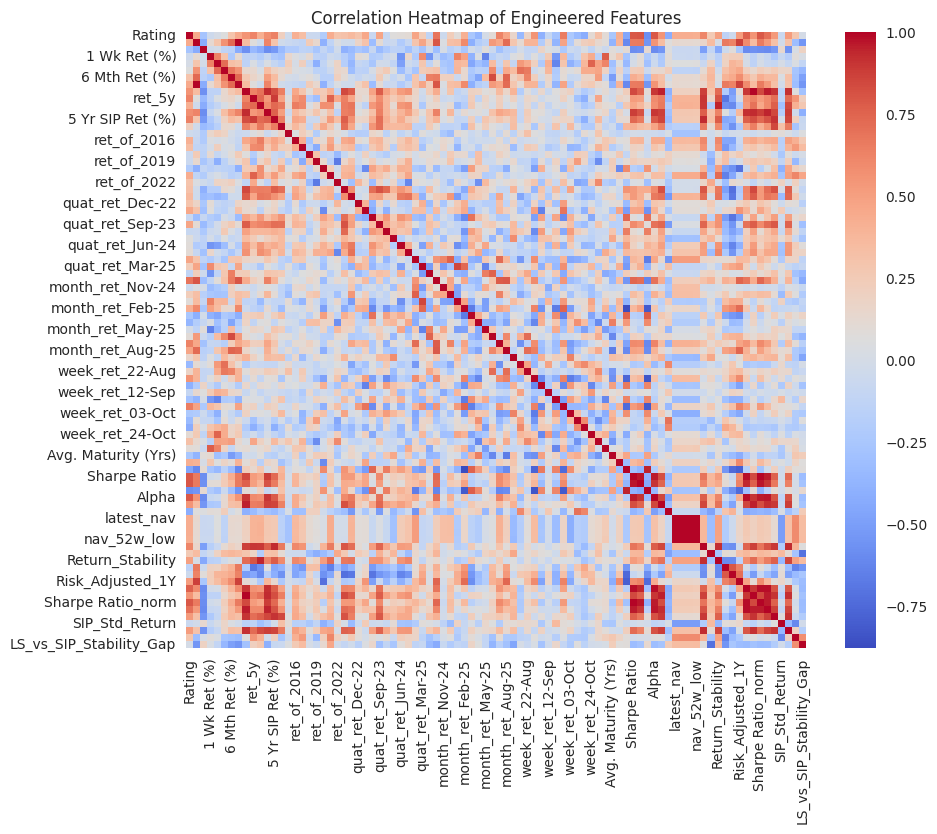

In [ ]:
# Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap of Engineered Features")
plt.show()


In [ ]:
# Automatically detect high-correlation pairs
corr = final_df.corr(numeric_only=True)
redundant = []

for col in corr.columns:
    for idx in corr.index:
        if col != idx and corr.loc[col, idx] > 0.90:
            redundant.append((col, idx, corr.loc[col, idx]))

redundant[:10]


[('ret_1y', 'ret_1y.1', np.float64(1.0)),
 ('ret_1y.1', 'ret_1y', np.float64(1.0)),
 ('ret_3y', '3 Yr SIP Ret (%)', np.float64(0.9301210005012309)),
 ('ret_3y', 'Information Ratio', np.float64(0.9507273680975362)),
 ('ret_3y', 'Sharpe_Adjusted_3Y', np.float64(0.9026819056003597)),
 ('ret_3y', 'ret_3y_norm', np.float64(0.9999999999999998)),
 ('ret_3y', 'Performance_Score', np.float64(0.9596441487319005)),
 ('ret_3y', 'SIP_Avg_Return', np.float64(0.9111488725197964)),
 ('ret_3y', 'SIP_Stability', np.float64(0.9186650174664183)),
 ('ret_5y', 'Avg_LongTerm_Return', np.float64(0.9014544239088019))]

In [ ]:
# Using a simple model (Random Forest) to rank features

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select numeric features only
X = final_df.select_dtypes(include=["float", "int"]).drop(columns=["ret_5y"], errors="ignore")
y = final_df["ret_5y"]

# Drop rows with missing target
X = X.loc[y.notna()]
y = y.loc[y.notna()]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create importance dataframe
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)


Feature  Importance
11     5 Yr SIP Ret (%)    0.596871
85    LS_vs_SIP_Avg_Gap    0.126136
72  Avg_LongTerm_Return    0.059582
74     Return_Stability    0.042206
19          ret_of_2021    0.030324
20          ret_of_2022    0.011082
15          ret_of_2017    0.010040
28      quat_ret_Mar-24    0.007067
75            Gap_1Y_5Y    0.006709
84        SIP_Stability    0.006501
53      week_ret_03-Oct    0.006225
50      week_ret_12-Sep    0.005023
82       SIP_Avg_Return    0.004177
46     month_ret_Oct-25    0.003976
17          ret_of_2019    0.003908

## Feature Visulization

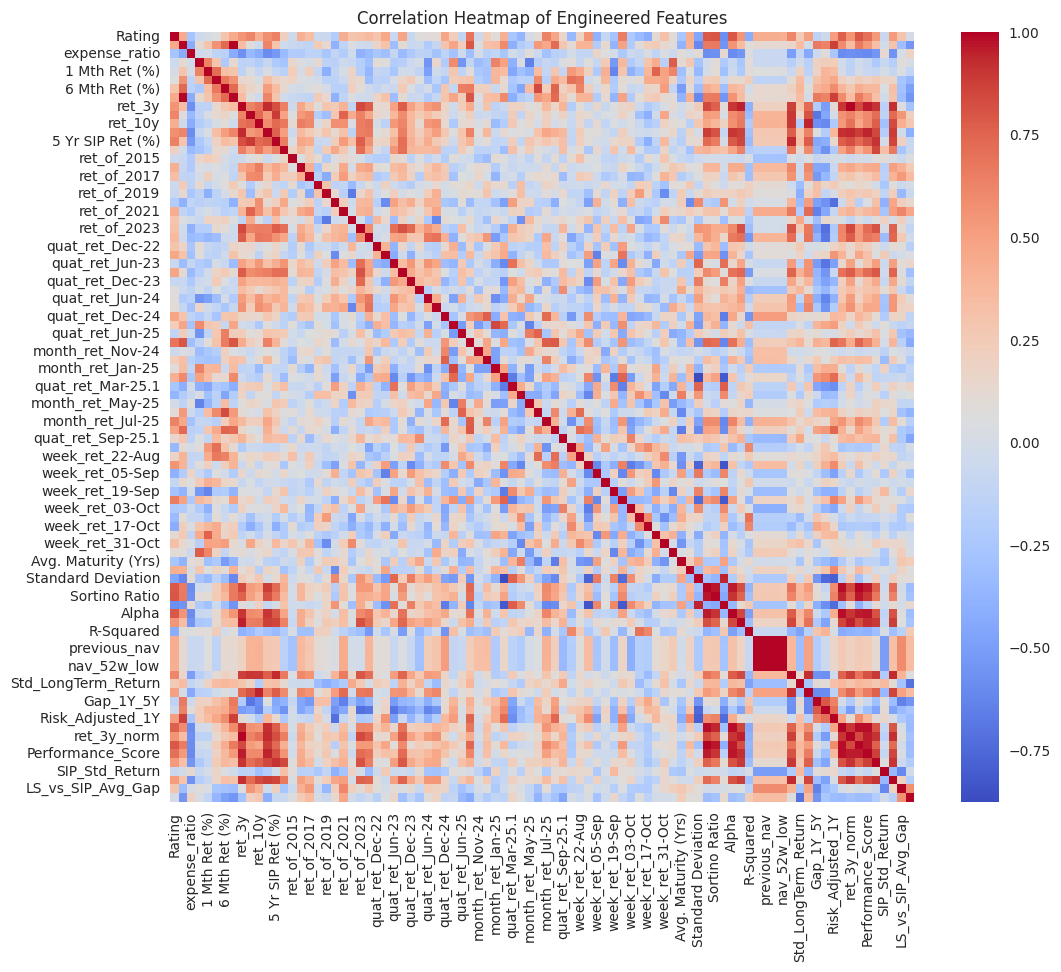

In [ ]:
df = final_df.copy("analytics_FE")

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Engineered Features")
plt.show()


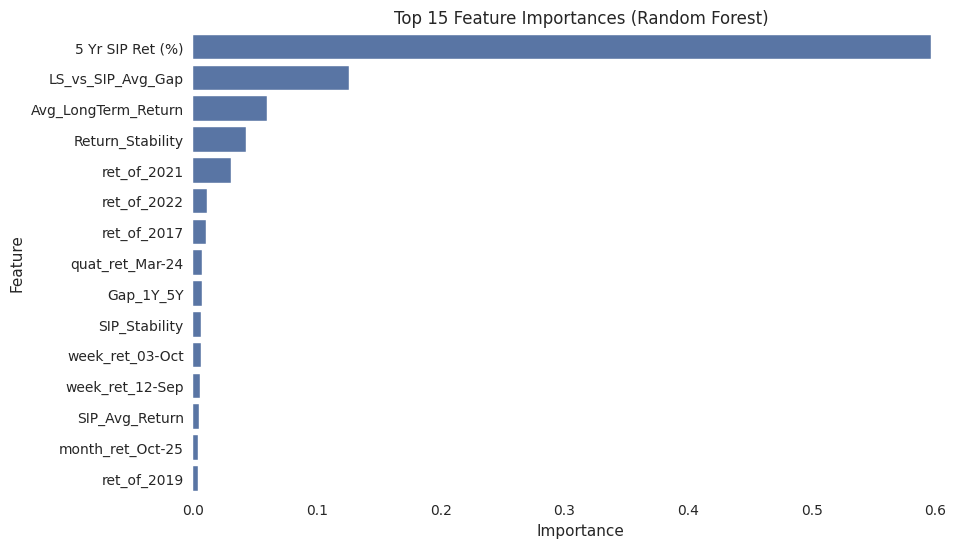

In [ ]:
# This belongs to Embedded Feature Selection.

df = final_df.copy()

# Select only numeric features
X = df.select_dtypes(include=['float', 'int']).drop(columns=["ret_5y"], errors="ignore")
y = df["ret_5y"]

# Drop rows where target is missing
X = X.loc[y.notna()]
y = y.loc[y.notna()]

# Fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


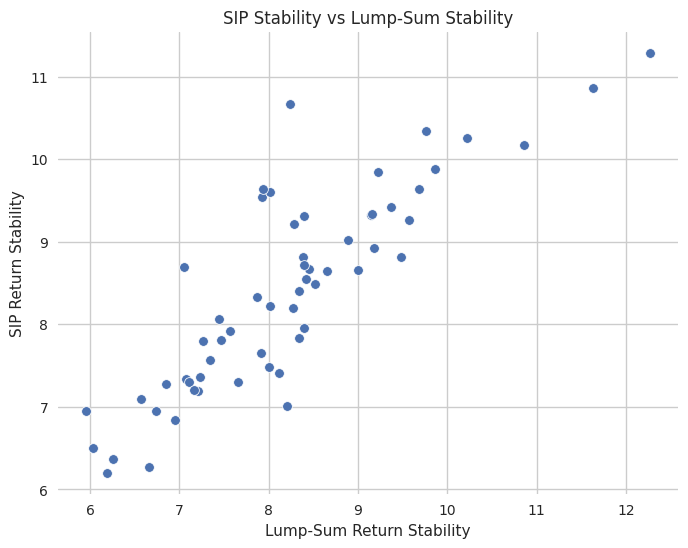

In [ ]:
# SIP Stability vs Lump-Sum Stability Scatter Plot

plt.figure(figsize=(8,6))
sns.scatterplot(data=final_df, x="Return_Stability", y="SIP_Stability")
plt.xlabel("Lump-Sum Return Stability")
plt.ylabel("SIP Return Stability")
plt.title("SIP Stability vs Lump-Sum Stability")
plt.grid(True)
plt.show()


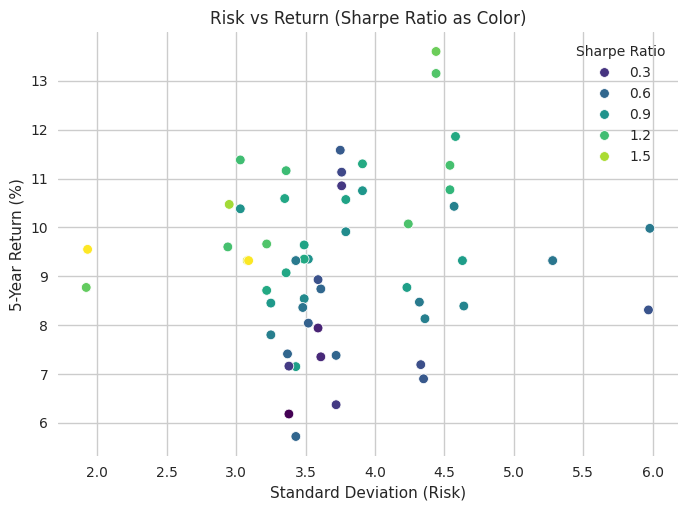

In [ ]:
# plt.figure(figsize=(8,6))
sns.scatterplot(data=final_df, x="Standard Deviation", y="ret_5y",
                hue="Sharpe Ratio", palette="viridis")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("5-Year Return (%)")
plt.title("Risk vs Return (Sharpe Ratio as Color)")
plt.grid(True)
plt.show()


# Model fitting :

##Lumpsum Return(1 yr) prediction using Random forest :



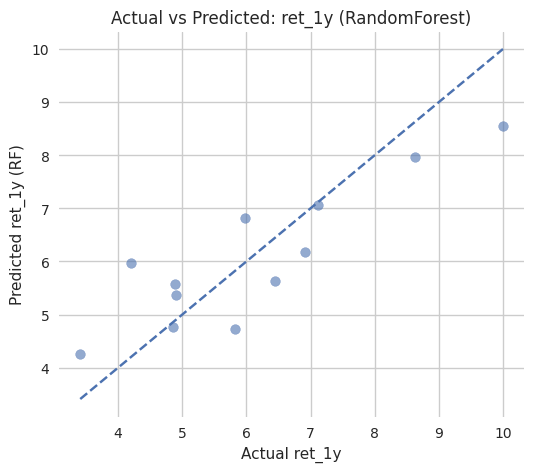

In [ ]:
# Code for two pipelines:
# 1) ret_1y regression using analytics.csv (tabular ML pipeline: preprocessing, LinearRegression, RandomForest)
# 2) NAV time-series forecasting using nav_values.csv (lag-feature ML approach using RandomForest)
#
# This code is written to run in one go. It:
# - Loads CSV files named 'analytics.csv' and 'nav_values.csv' from the working directory.
# - Does safe parsing and basic cleaning.
# - Trains models and prints evaluation metrics.
# - Plots simple diagnostic charts (matplotlib, no custom colors).
#
# If your CSV filenames or column names differ slightly, you may need to edit the filename or column names below.
# Run this cell. After it runs you'll see printed metrics and two plots.


# -----------------------------
# Part 1: ret_1y regression
# -----------------------------

# Load analytics.csv
analytics_path = "analytics_cleaned.csv"
try:
    df = pd.read_csv(analytics_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{analytics_path}' not found in working directory. Upload it or change path.")


# Quick look at columns and some cleaning helpers
# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Target column -- try to find 'ret_1y' exact or variants
target_candidates = [c for c in df.columns if c.lower().strip() in ("ret_1y","ret_1y.1","ret_1y ")]
if not target_candidates:
    # fallback: find column that contains 'ret' and '1y'
    for c in df.columns:
        if ('ret' in c.lower()) and ('1y' in c.lower()):
            target_candidates.append(c)
target_col = target_candidates[0] if target_candidates else None
if target_col is None:
    raise ValueError("Could not find a column for 1-year return (ret_1y). Please check analytics.csv column names.")

# Select a reasonable set of features based on earlier discussion.
# We'll attempt to pick numeric historical returns and risk/performance metrics and a few structural features.
candidate_features = [
    "1 Wk Ret (%)","1 Mth Ret (%)","3 Mth Ret (%)","6 Mth Ret (%)",
    "ret_3y","ret_5y","ret_10y",
    "Standard Deviation","Sharpe Ratio","Sortino Ratio","Beta","Alpha","Information Ratio","R-Squared",
    "AUM(Cr)","expense_ratio","Fund Manager (Tenure)","latest_nav","nav_52w_high","nav_52w_low",
    "Fund Risk Grade","Fund Return Grade","category","Plan Type","riskometer","Rating"
]

# Keep only features that actually exist in the dataframe
features = [f for f in candidate_features if f in df.columns]

# Create a working dataframe with target + features
work = df[features + [target_col]].copy()

# Function to coerce percent-like strings to numeric
def pct_to_float(series):
    # remove % and commas and convert to numeric
    return pd.to_numeric(series.astype(str).str.replace('%','').str.replace(',','').str.strip(), errors='coerce')

# Clean numeric-looking columns: try to convert columns that have % or commas
for col in work.columns:
    if work[col].dtype == object:
        # heuristic: if many values contain '%' or digits and '.' or ',' convert
        sample = work[col].dropna().astype(str).head(50).tolist()
        if any('%' in s for s in sample) or any(',' in s for s in sample) or all(any(ch.isdigit() for ch in s) for s in sample):
            work[col] = pct_to_float(work[col])

# Drop rows with missing target
work = work.dropna(subset=[target_col])

# Split into X and y
X = work.drop(columns=[target_col])
y = work[target_col].astype(float)

# Quick feature type classification
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# For simplicity drop columns with extremely high missingness (>60%)
missing_frac = X.isna().mean()
drop_cols = missing_frac[missing_frac > 0.6].index.tolist()
if drop_cols:
    X = X.drop(columns=drop_cols)
    numeric_cols = [c for c in numeric_cols if c not in drop_cols]
    categorical_cols = [c for c in categorical_cols if c not in drop_cols]

# Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
], remainder="drop")

# Split train/test (random split is OK here because ret_1y is static historical target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression pipeline
lr_pipeline = Pipeline(steps=[
    ("pre", preprocessor),
    ("lr", LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Model 2: Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ("pre", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate function
# def evaluate_regression(y_true, y_pred, label="Model"):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = mean_squared_error(y_true, y_pred, squared=False)
#     r2 = r2_score(y_true, y_pred)
#     spearman_corr = spearmanr(y_true, y_pred).correlation
#     print(f"{label} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Spearman: {spearman_corr:.4f}")

def evaluate_regression(y_true, y_pred, label="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    # compute RMSE in a version-compatible way
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    # spearmanr can return nan if constant inputs; guard it
    try:
        spearman_corr = spearmanr(y_true, y_pred).correlation
    except:
        spearman_corr = np.nan


evaluate_regression(y_test, y_pred_lr, label="LinearRegression")
evaluate_regression(y_test, y_pred_rf, label="RandomForest")

# Small diagnostic plot: predicted vs actual for RF
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], linestyle="--")
plt.xlabel("Actual ret_1y")
plt.ylabel("Predicted ret_1y (RF)")
plt.title("Actual vs Predicted: ret_1y (RandomForest)")
plt.grid(True)
plt.show()





##Lumpsum Return(1 yr) prediction using Ridge & Lasso :

Loaded analytics.csv with shape: (59, 88)


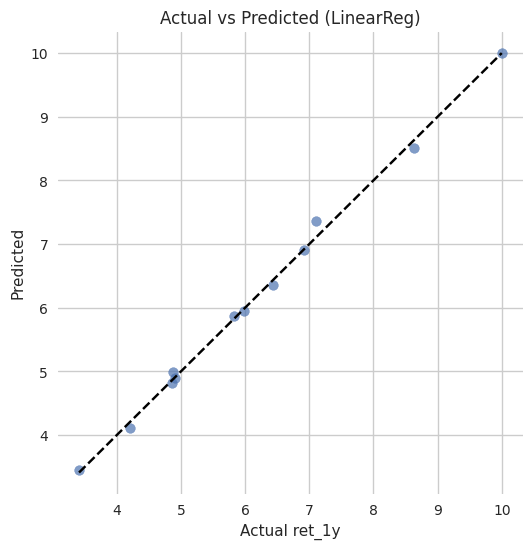

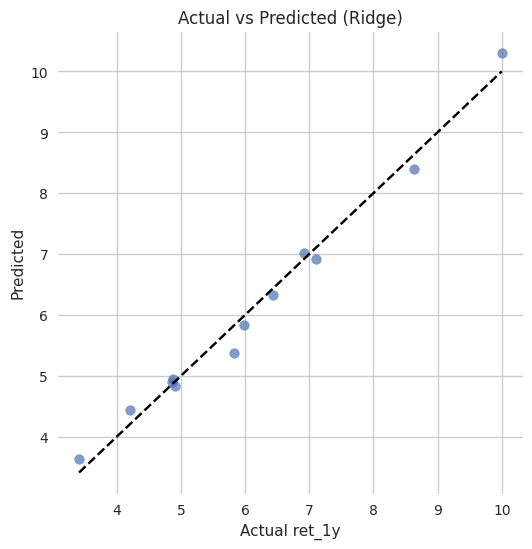

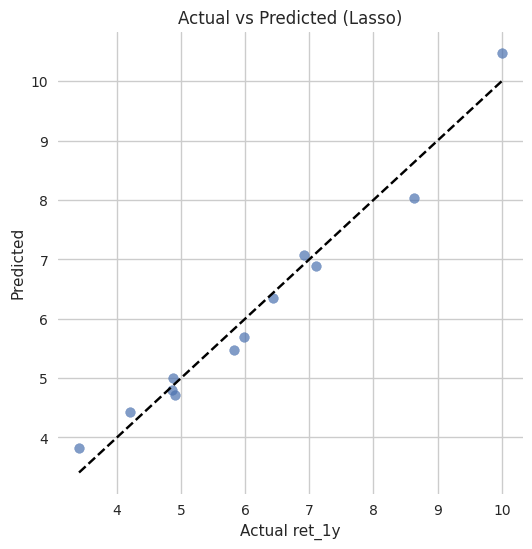

In [ ]:
# ============================================================
# RIDGE & LASSO REGRESSION PIPELINE for ret_1y prediction
# ============================================================

# ----------------------------------------------
# 1) Load analytics.csv
# ----------------------------------------------
file_path = "analytics_cleaned.csv"
df = pd.read_csv(file_path)

print("Loaded analytics.csv with shape:", df.shape)

# Clean column names
df.columns = [c.strip() for c in df.columns]

# ----------------------------------------------
# 2) Select target & useful features
# ----------------------------------------------
target = "ret_1y"

candidate_features = [
    "1 Wk Ret (%)","1 Mth Ret (%)","3 Mth Ret (%)","6 Mth Ret (%)",
    "ret_3y","ret_5y","ret_10y",
    "Standard Deviation","Sharpe Ratio","Sortino Ratio",
    "Beta","Alpha","Information Ratio","R-Squared",
    "AUM(Cr)","expense_ratio","latest_nav","nav_52w_high","nav_52w_low",
    "Fund Risk Grade","Fund Return Grade","category","Plan Type","riskometer","Rating"
]

df = df[[target] + candidate_features].dropna()

X = df[candidate_features]
y = df[target]

# ----------------------------------------------
# 3) Split
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------
# 4) Identify numeric/categorical columns
# ----------------------------------------------
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]


# ----------------------------------------------
# 5) Preprocessor
# ----------------------------------------------
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# ----------------------------------------------
# 6) Models
# ----------------------------------------------
models = {
    "LinearReg": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

# ----------------------------------------------
# 7) Evaluation function
# ----------------------------------------------
def evaluate(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    sp = spearmanr(y_true, y_pred).correlation
    return [name, mae, rmse, r2, sp]

results = []

# ----------------------------------------------
# 8) Train each model and evaluate
# ----------------------------------------------
for name, model in models.items():
    pipe = Pipeline(steps=[("pre", pre), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results.append(evaluate(y_test, y_pred, name))

    # scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
    plt.xlabel("Actual ret_1y")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted ({name})")
    plt.grid(True)
    plt.show()



## NAV prediction using random forest :

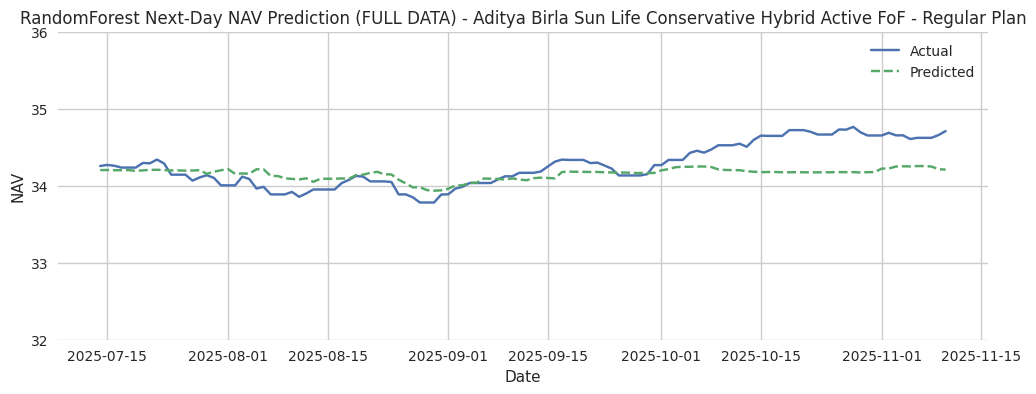

In [ ]:
# ==========================================
# PART 2: NAV time-series forecasting (RandomForest ML)
# Graph Only Version
# ==========================================



# ----------------------------------------------
# 1) Load NAV file
# ----------------------------------------------
nav_df = pd.read_csv("nav_values_cleaned.csv")
nav_df.columns = [c.strip() for c in nav_df.columns]

# ----------------------------------------------
# 2) Detect scheme name column
# ----------------------------------------------
scheme_candidates = [c for c in nav_df.columns if "scheme" in c.lower()]
scheme_col = scheme_candidates[0] if scheme_candidates else nav_df.columns[0]

# ----------------------------------------------
# 3) Detect date columns
# ----------------------------------------------
date_cols = []
for c in nav_df.columns:
    if c == scheme_col:
        continue
    try:
        pd.to_datetime(c, dayfirst=True)
        date_cols.append(c)
    except:
        try:
            pd.to_datetime(c)
            date_cols.append(c)
        except:
            pass

# ----------------------------------------------
# 4) Melt wide → long
# ----------------------------------------------
nav_long = nav_df.melt(
    id_vars=[scheme_col],
    value_vars=date_cols,
    var_name="date",
    value_name="nav"
)
nav_long["date"] = pd.to_datetime(nav_long["date"], dayfirst=True, errors="coerce")
nav_long["nav"] = pd.to_numeric(nav_long["nav"], errors="coerce")
nav_long = nav_long.dropna()

# ----------------------------------------------
# 5) Pick one scheme
# ----------------------------------------------
scheme_name = nav_long[scheme_col].unique()[0]
ts = nav_long[nav_long[scheme_col] == scheme_name].sort_values("date")
ts = ts.set_index("date").asfreq("D").fillna(method="ffill")
ts = ts.reset_index()[["date", "nav"]]

# ----------------------------------------------
# 6) Lag Features
# ----------------------------------------------
def create_lag_features(df, target="nav", lags=(1,3,7,14,30,60)):
    d = df.copy()
    for l in lags:
        d[f"lag_{l}"] = d[target].shift(l)
    d["roll_mean_7"] = d[target].shift(1).rolling(7).mean()
    d["roll_std_7"] = d[target].shift(1).rolling(7).std()
    d["roll_mean_30"] = d[target].shift(1).rolling(30).mean()
    d["roll_std_30"] = d[target].shift(1).rolling(30).std()
    d["dayofweek"] = d["date"].dt.dayofweek
    d["dayofmonth"] = d["date"].dt.day
    return d.dropna().reset_index(drop=True)

df_lag = create_lag_features(ts)

# ----------------------------------------------
# 7) Train / Test split
# ----------------------------------------------
df_lag["target_next"] = df_lag["nav"].shift(-1)
df_lag = df_lag.dropna().reset_index(drop=True)

test_days = 120 if len(df_lag) > 250 else max(30, int(0.15 * len(df_lag)))
train = df_lag.iloc[:-test_days]
test = df_lag.iloc[-test_days:]

feature_cols = [c for c in df_lag.columns if c not in ["date", "nav", "target_next"]]
X_train = train[feature_cols]
y_train = train["target_next"]
X_test = test[feature_cols]
y_test = test["target_next"]

# ----------------------------------------------
# 8) Train RandomForest
# ----------------------------------------------
imp = SimpleImputer(strategy="median")
X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train_imp, y_train)
y_pred = rf.predict(X_test_imp)

# ----------------------------------------------
# 9) Plot ONLY the graph (Your custom Y-axis settings)
# ----------------------------------------------
plt.figure(figsize=(12,4))
plt.plot(test["date"], y_test, label="Actual")
plt.plot(test["date"], y_pred, label="Predicted", linestyle="--")
plt.title(f"RandomForest Next-Day NAV Prediction (FULL DATA) - {scheme_name}")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.legend()
plt.grid(True)

# Y-axis: Exactly 5 ticks, spacing = 1 unit
y_min = int(np.floor(min(y_test.min(), y_pred.min())))
y_max = int(np.ceil(max(y_test.max(), y_pred.max())))

while (y_max - y_min) < 4:
    y_min -= 1
    y_max += 1

ticks = np.arange(y_min, y_max + 1, 1)
idx = np.round(np.linspace(0, len(ticks)-1, 5)).astype(int)
plt.yticks(ticks[idx])

plt.show()


##Nav Prediction Using Ridge and Lasso

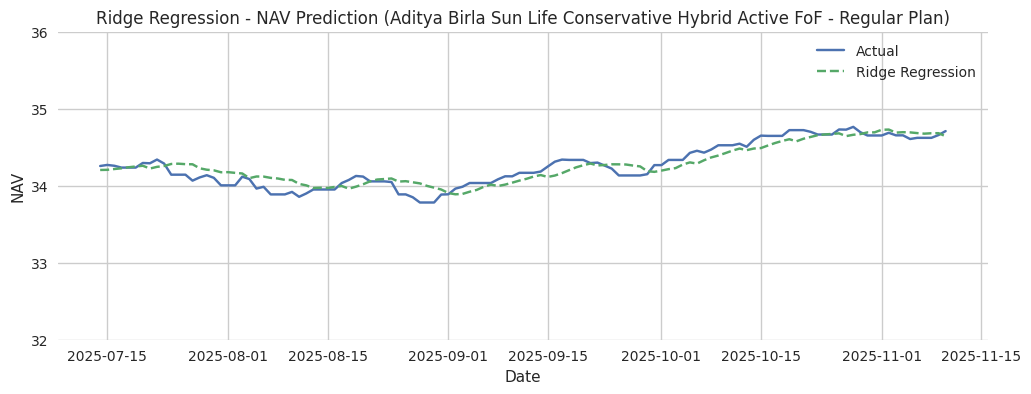

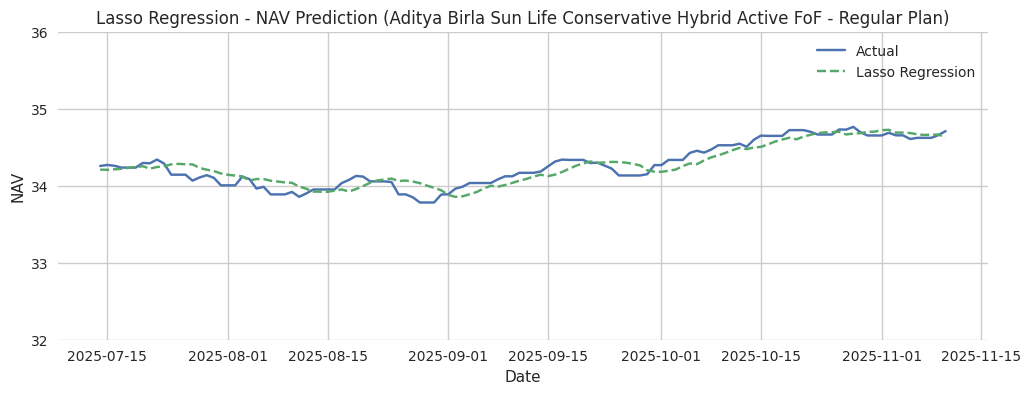

In [ ]:
# ======================================================
# NAV Forecasting using Ridge & Lasso (Graph only output)
# ======================================================

# -----------------------------
# Load NAV data
# -----------------------------
nav_df = pd.read_csv("nav_values_cleaned.csv")
nav_df.columns = [c.strip() for c in nav_df.columns]

scheme_candidates = [c for c in nav_df.columns if "scheme" in c.lower()]
scheme_col = scheme_candidates[0] if scheme_candidates else nav_df.columns[0]

# Detect date columns
date_cols = []
for c in nav_df.columns:
    if c == scheme_col:
        continue
    try:
        pd.to_datetime(c, dayfirst=True)
        date_cols.append(c)
    except:
        try:
            pd.to_datetime(c)
            date_cols.append(c)
        except:
            pass

# Melt to long
nav_long = nav_df.melt(
    id_vars=[scheme_col],
    value_vars=date_cols,
    var_name="date",
    value_name="nav"
)

nav_long["date"] = pd.to_datetime(nav_long["date"], dayfirst=True, errors="coerce")
nav_long["nav"] = pd.to_numeric(nav_long["nav"], errors="coerce")
nav_long = nav_long.dropna()

# Pick a scheme
scheme_name = nav_long[scheme_col].unique()[0]
ts = nav_long[nav_long[scheme_col] == scheme_name].sort_values("date")
ts = ts.set_index("date").asfreq("D").fillna(method="ffill")
ts = ts.reset_index()[["date", "nav"]]

# -----------------------------
# Lag features
# -----------------------------
def create_lags(df, target="nav", lags=(1,3,7,14,30,60)):
    d = df.copy()
    for l in lags:
        d[f"lag_{l}"] = d[target].shift(l)
    d["roll_mean_7"] = d[target].shift(1).rolling(7).mean()
    d["roll_std_7"] = d[target].shift(1).rolling(7).std()
    d["roll_mean_30"] = d[target].shift(1).rolling(30).mean()
    d["roll_std_30"] = d[target].shift(1).rolling(30).std()
    d["dow"] = d["date"].dt.dayofweek
    d["dom"] = d["date"].dt.day
    return d.dropna().reset_index(drop=True)

df_lag = create_lags(ts)

df_lag["target"] = df_lag["nav"].shift(-1)
df_lag = df_lag.dropna().reset_index(drop=True)

# Train-test split
test_days = 120 if len(df_lag) > 250 else max(30, int(0.15 * len(df_lag)))
train = df_lag.iloc[:-test_days]
test = df_lag.iloc[-test_days:]

feature_cols = [c for c in df_lag.columns if c not in ["date", "nav", "target"]]

X_train = train[feature_cols]
y_train = train["target"]
X_test = test[feature_cols]
y_test = test["target"]

# -----------------------------
# Models (Ridge & Lasso)
# -----------------------------
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001)
}

# -----------------------------
# Helper to plot
# -----------------------------
def plot_result(model_name, predictions):
    plt.figure(figsize=(12,4))
    plt.plot(test["date"], y_test, label="Actual")
    plt.plot(test["date"], predictions, label=model_name, linestyle="--")

    plt.title(f"{model_name} - NAV Prediction ({scheme_name})")
    plt.xlabel("Date")
    plt.ylabel("NAV")
    plt.grid(True)
    plt.legend()

    # ---- Y-axis: exactly 5 ticks, spacing = 1 unit ----
    y_min = int(np.floor(min(y_test.min(), predictions.min())))
    y_max = int(np.ceil(max(y_test.max(), predictions.max())))

    while (y_max - y_min) < 4:
        y_min -= 1
        y_max += 1

    ticks = np.arange(y_min, y_max + 1, 1)
    idx = np.round(np.linspace(0, len(ticks)-1, 5)).astype(int)
    plt.yticks(ticks[idx])

    plt.show()

# -----------------------------
# Fit & plot each model
# -----------------------------
for name, model in models.items():
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    plot_result(name, preds)


# Problem Statement

The objective of this project is to identify the **Top 3 Conservative Hybrid Fund schemes** that deliver the **highest returns with the lowest level of risk**, using **risk-adjusted performance metrics**.

To achieve this, we evaluate each scheme using the **Sharpe Ratio**, a widely accepted measure that indicates how much return a fund generates per unit of risk taken.

### Metrics Used
- **Fund Return** – Average return of the scheme over time  
- **Risk-Free Rate** – Return on a zero-risk investment  
- **Volatility** – Standard deviation of returns

### Sharpe Ratio Formula
Sharpe Ratio = (Fund Return - Risk-Free Rate)/Volatility


### Interpretation
Funds with a **higher Sharpe Ratio** offer better **risk-adjusted performance**.  
Therefore, we ranked all Conservative Hybrid Fund schemes by their Sharpe Ratio and selected the **Top 3 schemes** that maximize return while minimizing risk.

This analysis helps investors choose the most efficient and stable investment options.


In [ ]:
df = pd.read_csv("analytics_cleaned.csv")
df.sort_values("Sharpe Ratio", ascending=False).head(3)

scheme_name Plan Type  Rating  \
49  Nippon India Conservative Hybrid Fund - Direct...    Direct       5   
51  Parag Parikh Conservative Hybrid Fund - Direct...    Direct       5   
22  Parag Parikh Conservative Hybrid Fund - Regula...   Regular       5   

    ret_1y       riskometer category  expense_ratio    Launch AUM(Cr)  \
49   10.00             High    HY-CH           1.09  01/01/13     918   
51    7.84  Moderately High    HY-CH           0.34  26/05/21   3,097   
22    7.52  Moderately High    HY-CH           0.64  26/05/21   3,097   

    1 Wk Ret (%)  1 Mth Ret (%)  3 Mth Ret (%)  6 Mth Ret (%)  ret_1y.1  \
49          0.24           1.00           2.92           5.63     10.00   
51          0.00           0.50           1.92           3.52      7.84   
22         -0.01           0.48           1.84           3.36      7.52   

    ret_3y  ret_5y  ret_10y  3 Yr SIP Ret (%)  5 Yr SIP Ret (%)  \
49    9.98    9.55     6.58              9.99              9.50   
51   12.15    9.32     8.31             10.95              9.51   
22   11.82    9.32     8.31             10.62              9.51   

    10 Yr SIP Ret (%)  ret_of_2015  ret_of_2016  ret_of_2017  ret_of_2018  \
49               7.05         7.15        10.21        10.27         4.94   
51              11.02         7.12        10.21        10.06         0.68   
22              11.02         7.12        10.21        10.06         0.68   

    ret_of_2019  ret_of_2020  ret_of_2021  ret_of_2022  ret_of_2023  \
49         3.60        -7.95        10.74         5.44        11.14   
51         8.72        10.51        10.59         7.87        14.03   
22         8.72        10.51        10.59         7.55        13.69   

    ret_of_2024  quat_ret_Dec-22  quat_ret_Mar-23  quat_ret_Jun-23  \
49         8.43             2.23             2.67             3.26   
51        12.72             2.90             1.47             2.99   
22        12.38             2.82             1.39             2.91   

    quat_ret_Sep-23  quat_ret_Dec-23  quat_ret_Mar-24  quat_ret_Jun-24  \
49             1.94             2.82             2.29             2.56   
51             4.98             3.94             4.44             3.59   
22             4.90             3.87             4.36             3.52   

    quat_ret_Sep-24  quat_ret_Dec-24  quat_ret_Mar-25  quat_ret_Jun-25  \
49             2.96             0.45             2.03             3.84   
51             4.24             0.04             1.95             3.36   
22             4.16            -0.04             1.87             3.28   

    quat_ret_Sep-25  month_ret_Nov-24  quat_ret_Dec-24.1  month_ret_Jan-25  \
49             1.62              0.44               0.24              0.68   
51             1.08              0.19               0.03              0.92   
22             1.01              0.17               0.00              0.89   

    month_ret_Feb-25  quat_ret_Mar-25.1  month_ret_Apr-25  month_ret_May-25  \
49             -0.26               1.60              1.57              1.16   
51             -0.62               1.66              1.83              1.30   
22             -0.65               1.63              1.81              1.28   

    quat_ret_Jun-25.1  month_ret_Jul-25  month_ret_Aug-25  quat_ret_Sep-25.1  \
49               1.07              0.32              0.30               0.99   
51               0.19              0.36             -0.76               1.49   
22               0.16              0.34             -0.79               1.46   

    month_ret_Oct-25  week_ret_22-Aug  week_ret_29-Aug  week_ret_05-Sep  \
49              1.33             0.36            -0.18             0.19   
51              0.90            -0.05            -0.54             0.37   
22              0.88            -0.05            -0.55             0.37   

    week_ret_12-Sep  week_ret_19-Sep  week_ret_26-Sep  week_ret_03-Oct  \
49             0.37             0.38             0.02             0.29   
51       